# Phân tích, trực quan hoá, đưa ra insight
- Ở bước này chúng ta sẽ cùng nhau tìm hiểu câu chuyện phía sau dữ liệu của chúng ta có những gì, đồng thời cũng rút ra những insight quan trọng từ dữ liệu.
- Chúng ta sẽ thực hiện phân tích dữ liệu qua các bước sau:
    - Thống kê mô tả dữ liệu: tập trung vào các đặc trưng (fatalities, injuries, landslide_category, landslide_trigger, ...) để hiểu rõ hơn về phân phối và các đặc điểm chính của chúng.
    - Phân tích địa lý: sử dụng các biểu đồ bản đồ để trực quan hóa phân bố địa lý của các sự kiện lở đất, từ đó nhận diện các khu vực có nguy cơ cao.
    - Phân tích theo thời gian: khám phá xu hướng theo thời gian của các sự kiện lở đất, bao gồm sự thay đổi theo năm, mùa và các yếu tố thời tiết
    - Phân tích mối quan hệ giữa các biến: sử dụng các biểu đồ tương quan để tìm hiểu mối quan hệ giữa các biến khác nhau trong dữ liệu.
    - Cuối cùng, chúng ta sẽ tổng hợp các phát hiện quan trọng và đưa ra các kết luận từ phân tích dữ liệu.
- Trong các bước trên, chúng ta cũng tích hợp trả lời các câu hỏi có ý nghĩa.


In [31]:
import pandas as pd
import numpy as np
import re # Thư viện xử lý biểu thức chính quy (Regex) cho văn bản
import matplotlib.pyplot as plt
import seaborn as sns



import sys
import os
sys.path.append(os.path.abspath(r"..\src"))

import config as cf
import data_processing as dp 
import utils as ut 

### Load dữ liệu đã được làm sạch từ bước trước

In [32]:
df = pd.read_csv(cf.PROCESSED_DATA)
print(f"Dữ liệu có kích thước: {df.shape}")
df.head(3)

Dữ liệu có kích thước: (11033, 21)


source_name           event_date  \
0         AGU  2008-08-01 00:00:00   
1   Oregonian  2009-01-02 02:00:00   
2    CBS News  2007-01-19 00:00:00   

                                         event_title  \
0        sigou village loufan county shanxi province   
1                                 lake oswego oregon   
2  san ramon district 195 miles northeast of the ...   

                                   event_description  \
0  occurred early in morning 11 villagers buried ...   
1  hours of heavy rain are to blame for an overni...   
2  cbs ap at least 10 people died and as many as ...   

                                location_description location_accuracy  \
0        sigou village loufan county shanxi province           unknown   
1                                 lake oswego oregon               5km   
2  san ramon district 195 miles northeast of the ...              10km   

  landslide_category landslide_trigger landslide_size landslide_setting  ...  \
0          landslide              rain          large              mine  ...   
1           mudslide          downpour          small           unknown  ...   
2          landslide          downpour          large           unknown  ...   

   injury_count   country_name admin_division_name admin_division_population  \
0             0          china             shaanxi                  127225.0   
1             0  united states              oregon                   36619.0   
2             0           peru               junín                   14708.0   

   gazeteer_closest_point gazeteer_distance  longitude  latitude  \
0                Jingyang          41.02145   107.4500   32.5625   
1             Lake Oswego           0.60342  -122.6630   45.4200   
2               San Ramón           0.85548   -75.3587  -11.1295   

   fatality_imputed  injury_imputed  
0             False           False  
1             False           False  
2             False           False  

[3 rows x 21 columns]

## Thống kê mô tả dữ liệu (đã làm)

### Fatality Count

#### Nhận xét
- Biểu đồ phân phối số người chết (fatality_count) cho thấy rằng phần lớn các sự kiện lở đất dẫn đến số người chết rất thấp.
- Tuy nhiên, có một số sự kiện hiếm hoi dẫn đến số người chết rất cao, điều này làm cho phân phối bị lệch về phía bên phải.
- Nhóm đã đưa ra quyết định phân loại mức độ thương vong dựa trên số người chết như sau:
    - Không có thương vong (0 người chết)
    - Thấp (1-10 người chết)
    - Trung bình (11-100 người chết)
    - Cao (101-1000 người chết)
    - Rất cao (>1000 người chết)


Phân phối số vụ theo mức độ nghiêm trọng:
fatality_class
no_fatalities        8556
minor_incident       2064
moderate_incident     381
serious_disaster       29
major_catastrophe       3
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\215811195.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




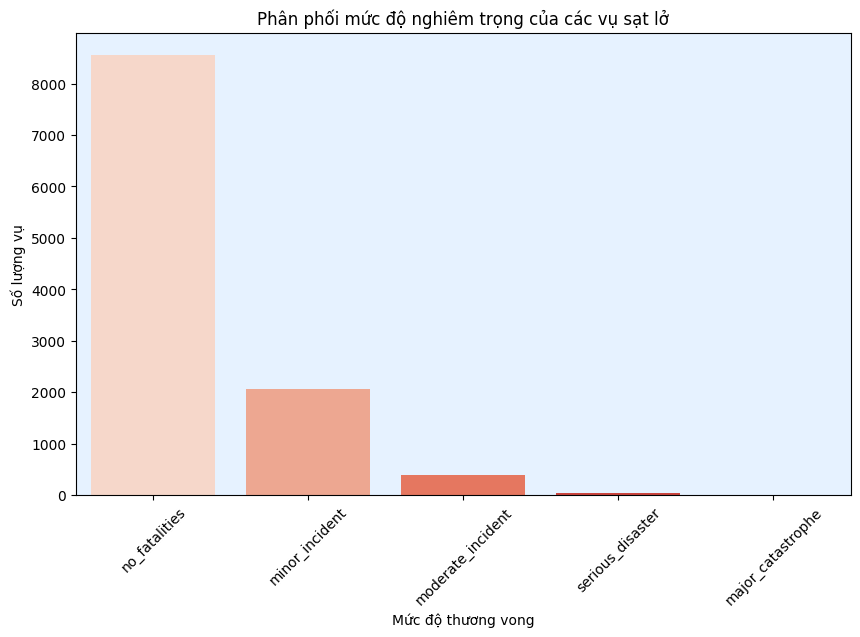

In [34]:
# 1. Áp dụng hàm phân loại
df['fatality_class'] = df['fatality_count'].apply(dp.categorize_fatality)

# 2. Chuyển sang kiểu dữ liệu Category có thứ tự (Ordinal) để vẽ biểu đồ cho đúng thứ tự
# Định nghĩa thứ tự
fatality_order = [
    'no_fatalities', 
    'minor_incident', 
    'moderate_incident', 
    'serious_disaster', 
    'major_catastrophe'
]

# Ép kiểu category
df['fatality_class'] = pd.Categorical(df['fatality_class'], categories=fatality_order, ordered=True)

# 3. Kiểm tra kết quả phân phối
print("\nPhân phối số vụ theo mức độ nghiêm trọng:")
print(df['fatality_class'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fatality_class', palette='Reds')
plt.title('Phân phối mức độ nghiêm trọng của các vụ sạt lở')
plt.xlabel('Mức độ thương vong')
plt.ylabel('Số lượng vụ')
plt.xticks(rotation=45)
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\1842999838.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




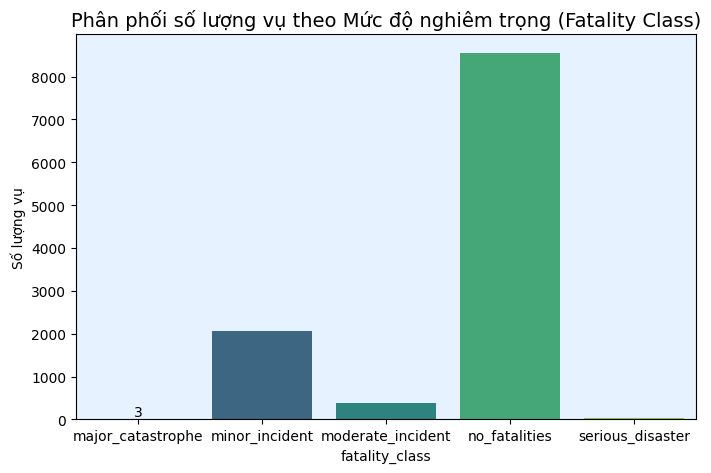

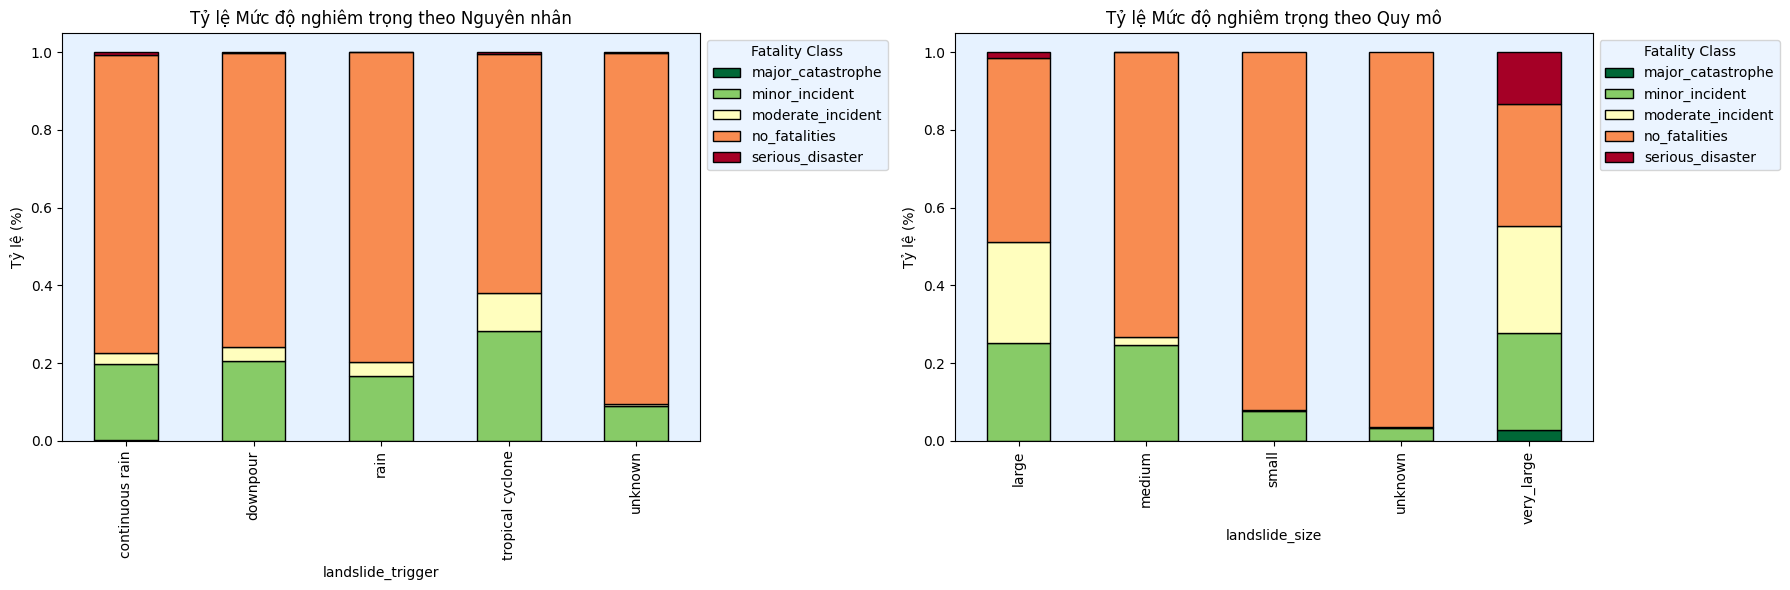

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\1842999838.py:60: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




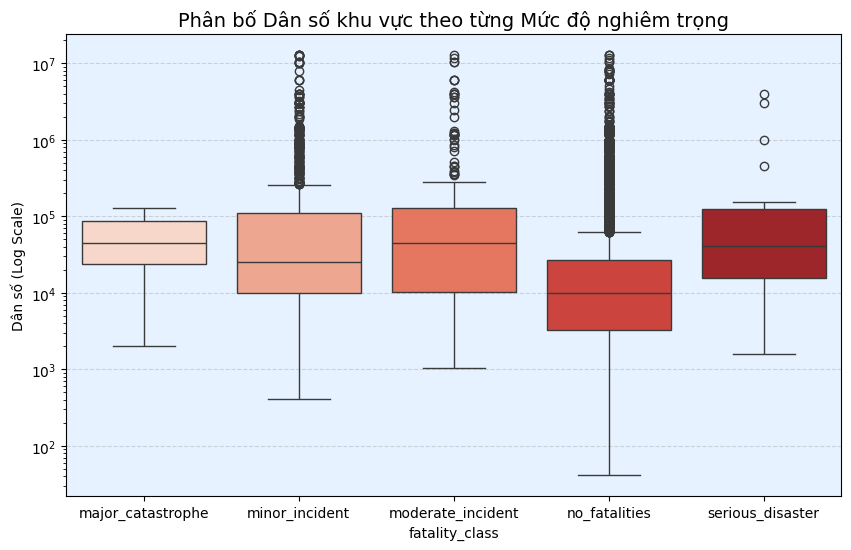

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# === CẤU HÌNH ===
# ĐỊNH NGHĨA THỨ TỰ LỚP CỦA BẠN Ở ĐÂY (Sửa lại cho đúng tên bạn đặt)
# Ví dụ: class_order = ['Low', 'Medium', 'High', 'Catastrophic']
# Nếu bạn chưa biết tên lớp, chạy dòng này để xem: print(df['fatality_class'].unique())
class_order = sorted(df['fatality_class'].unique()) # Tạm thời sort theo alphabet

# === BIỂU ĐỒ 1: PHÂN PHỐI CÁC LỚP (Baseline) ===
plt.figure(figsize=(8, 5))
sns.countplot(x='fatality_class', data=df, order=class_order, palette='viridis')
plt.title('Phân phối số lượng vụ theo Mức độ nghiêm trọng (Fatality Class)', fontsize=14)
plt.ylabel('Số lượng vụ')
plt.bar_label(plt.gca().containers[0])
plt.show()

# === BIỂU ĐỒ 2: NGUYÊN NHÂN & QUY MÔ ẢNH HƯỞNG THẾ NÀO? (Normalized Stacked Bar) ===
# Biểu đồ này cực quan trọng: Nó cho biết TỶ LỆ % rủi ro cao của từng nguyên nhân
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Hàm vẽ biểu đồ chồng tỉ lệ 100%
def plot_stacked_100(col, ax, title):
    # Lấy top 5 giá trị phổ biến để đỡ rối
    top_vals = df[col].value_counts().head(5).index
    df_temp = df[df[col].isin(top_vals)]
    
    # Tạo bảng chéo và chuẩn hóa theo hàng (normalize='index')
    ct = pd.crosstab(df_temp[col], df_temp['fatality_class'])
    
    # Sắp xếp cột theo thứ tự class
    available_cols = [c for c in class_order if c in ct.columns]
    ct = ct[available_cols]
    
    # Chuẩn hóa về 100%
    ct_100 = ct.div(ct.sum(1), axis=0)
    
    ct_100.plot(kind='bar', stacked=True, ax=ax, colormap='RdYlGn_r', edgecolor='black')
    ax.set_title(title, fontsize=12)
    ax.set_ylabel('Tỷ lệ (%)')
    ax.legend(title='Fatality Class', bbox_to_anchor=(1, 1))

# Vẽ Trigger vs Class
plot_stacked_100('landslide_trigger', axes[0], 'Tỷ lệ Mức độ nghiêm trọng theo Nguyên nhân')

# Vẽ Size vs Class
plot_stacked_100('landslide_size', axes[1], 'Tỷ lệ Mức độ nghiêm trọng theo Quy mô')

plt.tight_layout()
plt.show()

# === BIỂU ĐỒ 3: DÂN SỐ ẢNH HƯỞNG THẾ NÀO? (Boxplot) ===
# Xem phân bố dân số của từng nhóm Fatality Class
plt.figure(figsize=(10, 6))
# Lọc bỏ dân số = 0 hoặc NaN để vẽ log scale cho đẹp
df_pop = df[df['admin_division_population'] > 0].copy()

sns.boxplot(
    data=df_pop, 
    x='fatality_class', 
    y='admin_division_population', 
    order=class_order,
    palette='Reds'
)
plt.yscale('log') # Dùng Log scale vì dân số chênh lệch rất lớn
plt.title('Phân bố Dân số khu vực theo từng Mức độ nghiêm trọng', fontsize=14)
plt.ylabel('Dân số (Log Scale)')
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.show()

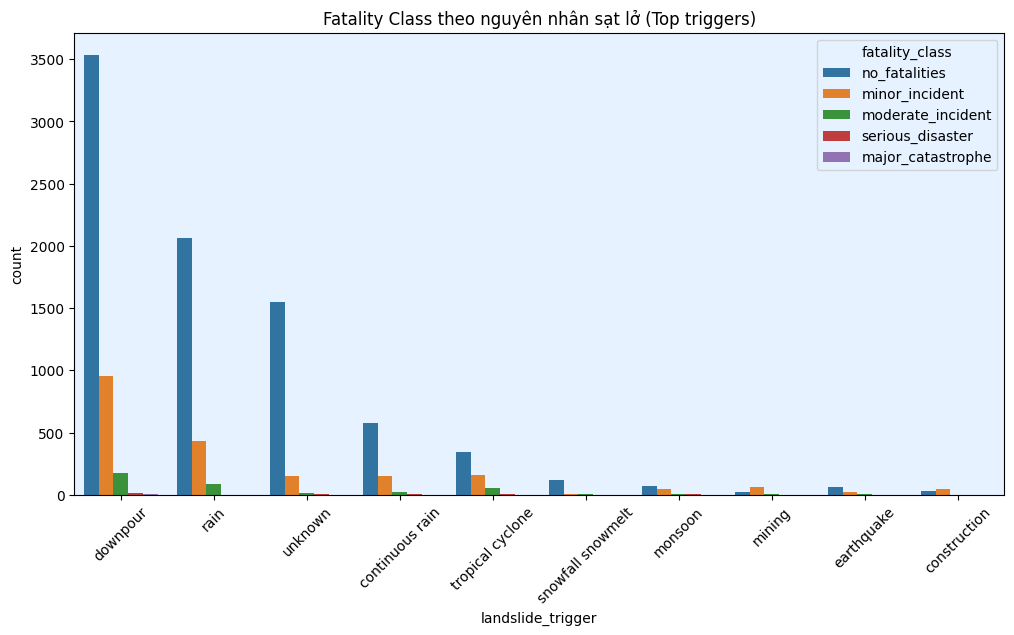

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='landslide_trigger',
    hue='fatality_class',
    order=df['landslide_trigger'].value_counts().head(10).index,
    hue_order=fatality_order
)
plt.xticks(rotation=45)
plt.title('Fatality Class theo nguyên nhân sạt lở (Top triggers)')
plt.show()


### injuries

=== THỐNG KÊ MÔ TẢ: INJURY_COUNT ===
count    11033.000000
mean         0.668812
std         12.049420
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        824.000000
Name: injury_count, dtype: float64

- Số vụ KHÔNG có người bị thương: 10340 vụ (93.72%)
- Ngưỡng 1% các vụ nghiêm trọng nhất (99th percentile): > 9 người bị thương
- Vụ cao nhất lịch sử trong dataset: 824 người bị thương


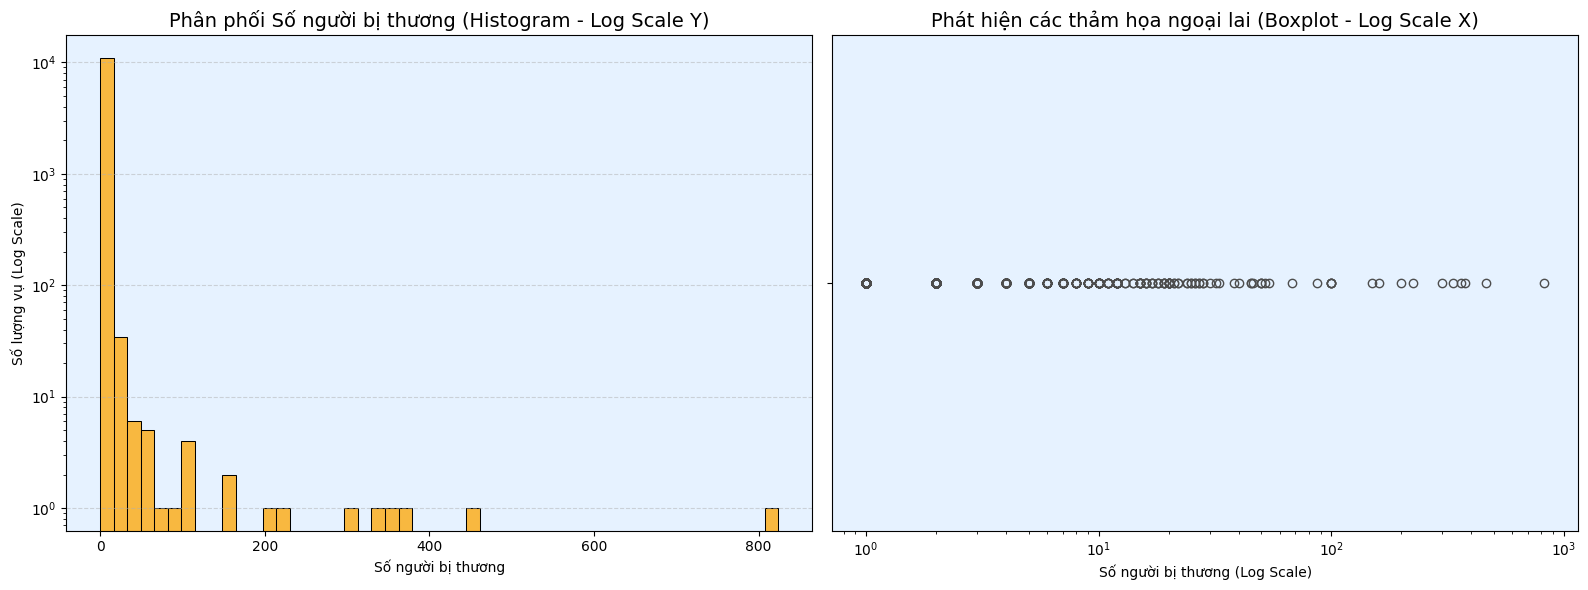


--- PHÂN PHỐI THEO NHÓM (CLASS) ---
injury_count
No Injury    10340
Minor          598
Moderate        77
Severe          18
Name: count, dtype: int64


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- BƯỚC 1: XỬ LÝ DỮ LIỆU (PREPROCESSING) ---
# Đảm bảo cột là dạng số, ép các giá trị lỗi thành NaN rồi điền 0
df['injury_count'] = pd.to_numeric(df['injury_count'], errors='coerce').fillna(0)

# --- BƯỚC 2: THỐNG KÊ SỐ LIỆU (STATISTICS) ---
print("=== THỐNG KÊ MÔ TẢ: INJURY_COUNT ===")
print(df['injury_count'].describe())

# Tính các chỉ số quan trọng
zero_injury = sum(df['injury_count'] == 0)
percent_zero = (zero_injury / len(df)) * 100
p99 = df['injury_count'].quantile(0.99)
max_injury = df['injury_count'].max()

print(f"\n- Số vụ KHÔNG có người bị thương: {zero_injury} vụ ({percent_zero:.2f}%)")
print(f"- Ngưỡng 1% các vụ nghiêm trọng nhất (99th percentile): > {p99:.0f} người bị thương")
print(f"- Vụ cao nhất lịch sử trong dataset: {max_injury:.0f} người bị thương")

# --- BƯỚC 3: TRỰC QUAN HÓA (VISUALIZATION) ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ 1: Histogram (Phân phối tần suất)
# Dùng log_scale=True cho trục Y vì cột giá trị 0 quá cao
sns.histplot(df['injury_count'], bins=50, kde=False, color='orange', ax=axes[0])
axes[0].set_yscale('log') 
axes[0].set_title('Phân phối Số người bị thương (Histogram - Log Scale Y)', fontsize=14)
axes[0].set_xlabel('Số người bị thương')
axes[0].set_ylabel('Số lượng vụ (Log Scale)')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 2: Boxplot (Phát hiện ngoại lai)
# Dùng log_scale cho trục X để nhìn rõ các điểm outlier xa tít tắp
sns.boxplot(x=df['injury_count'], color='cyan', ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Phát hiện các thảm họa ngoại lai (Boxplot - Log Scale X)', fontsize=14)
axes[1].set_xlabel('Số người bị thương (Log Scale)')

plt.tight_layout()
plt.show()

# --- BƯỚC 4: (TÙY CHỌN) PHÂN LỚP INJURY ---
# Nếu bạn muốn tạo nhóm để dễ phân tích như Fatality
def categorize_injury(count):
    if count == 0: return 'No Injury'
    if count <= 10: return 'Minor'        # 1-10
    if count <= 50: return 'Moderate'     # 11-50
    return 'Severe'                       # > 50

print("\n--- PHÂN PHỐI THEO NHÓM (CLASS) ---")
print(df['injury_count'].apply(categorize_injury).value_counts())

### Landslide Trigger

In [36]:
trigger_counts = df['landslide_trigger'].value_counts()
print(trigger_counts)

landslide_trigger
downpour                   4680
rain                       2592
unknown                    1714
continuous rain             748
tropical cyclone            561
snowfall snowmelt           135
monsoon                     129
mining                       93
earthquake                   89
construction                 82
flooding                     75
no apparent trigger          44
freeze thaw                  41
other                        26
dam embankment collapse      12
leaking pipe                 10
volcano                       1
vibration                     1
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\1421182660.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Số lượng vụ')

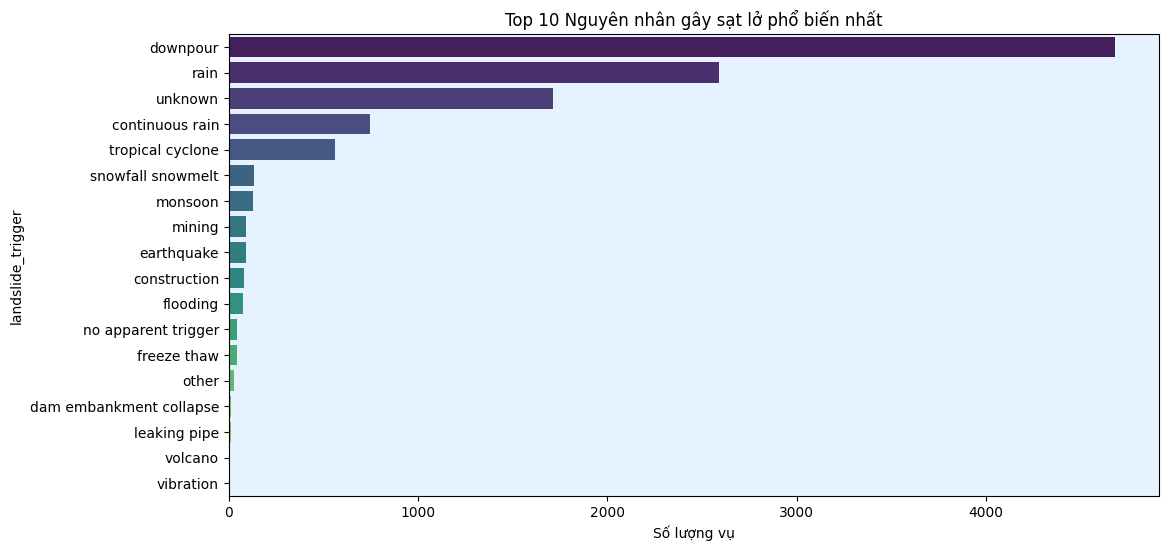

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=trigger_counts.values, y=trigger_counts.index, palette='viridis')
plt.title('Top 10 Nguyên nhân gây sạt lở phổ biến nhất')
plt.xlabel('Số lượng vụ')
# plt.savefig('eda_trigger_counts.png')

#### Nhận xét
- Mưa là nguyên nhân gây ra sạt lở phổ biến nhất, chiếm tỷ lệ lớn trong tổng số sự kiện (downpur, rain,  continuous rain, tropical cyclone, monsoon).
- Khai thác mỏ cũng là một nguyên nhân quan trọng, đứng thứ hai trong danh sách. Điều này cho thấy hoạt động con người có ảnh hưởng đáng kể đến nguy cơ sạt lở đất.
    -> Con người cần có các biện pháp quản lý và giám sát chặt chẽ hơn đối với các hoạt động khai thác mỏ để giảm thiểu nguy cơ sạt lở đất.
- Động đất là nguyên nhân đứng thứ ba, cho thấy các sự kiện địa chấn có thể kích hoạt sạt lở đất đáng kể.
- Và các nguyên nhân khác như hoạt động núi lửa, tuyết lở,... cũng đóng góp một phần không nhỏ vào tổng số sự kiện sạt lở.
- Ngoài ra, nguyên nhân "unknown" chiếm một tỷ lệ khá lớn, cho thấy vẫn còn nhiều sự kiện sạt lở mà nguyên nhân chưa được xác định rõ ràng (có thể là do nguyên nhân không rõ ràng, chưa được xác định hoặc bị thiếu trong quá trình nhập liệu). (cần nghiên cứu thêm để hiểu rõ hơn)



### Thống kê Loại sạt lở (Landslide Category)

In [38]:
category_counts = df['landslide_category'].value_counts()
print(category_counts)

landslide_category
landslide              7648
mudslide               2100
rock fall               671
complex                 232
debris flow             194
other                    68
unknown                  39
riverbank collapse       37
snow avalanche           15
translational slide       9
lahar                     7
earth flow                7
creep                     5
topple                    1
Name: count, dtype: int64


landslide_category
landslide              7648
mudslide               2100
rock fall               671
complex                 232
debris flow             194
other                    68
unknown                  39
riverbank collapse       37
snow avalanche           15
translational slide       9
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\406696662.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Số lượng vụ')

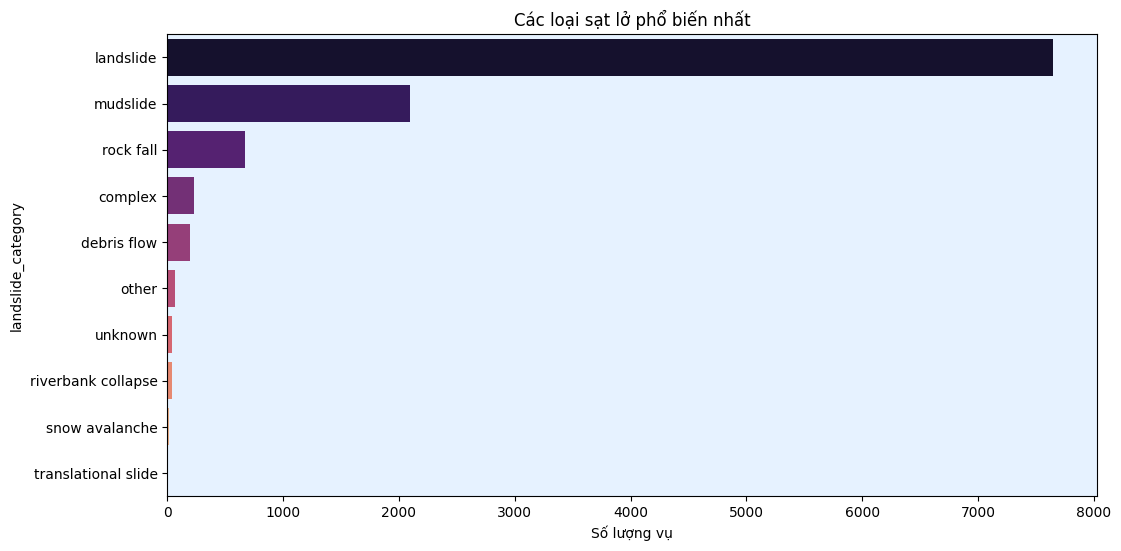

In [39]:
category_counts = df['landslide_category'].value_counts().head(10)
print(category_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='magma')
plt.title('Các loại sạt lở phổ biến nhất')
plt.xlabel('Số lượng vụ')
# plt.savefig('eda_category_counts.png')

#### Nhận xét
- Sạt lỡ đất chiếm ưu thế.
- mudslide và rockfall là hai loại phổ biến tiếp theo.
    + mudslide: do mưa lớn kéo dài làm đất bão hòa nước, mất ổn định và trượt xuống, thường xảy ra ở các khu vực đồi núi với đất sét và đất phù sa.
    + rockfall: xảy ra khi các mảng đá lớn bị nứt vỡ và rơi xuống từ các vách đá hoặc sườn núi, thường do quá trình phong hóa, động đất hoặc tác động của con người. thường xảy ra ở các khu vực núi đá vôi hoặc đá granit, sườn núi dốc đứng.
- Các loại đặc thù chỉ xuất hiện ở điều kiện địa lý riêng như snow avalanche (tuyết lở) chỉ xảy ra ở vùng núi cao có tuyết phủ quanh năm, lahar (dòng bùn núi lửa) chỉ xảy ra gần các núi lửa hoạt động.
- Còn lại các loại khác như debris flow, earthflow, subsidence,... có tần suất xuất hiện thấp hơn nhiều so với các loại chính trên, cho thấy chúng ít phổ biến hơn trong dữ liệu sạt lở đất toàn cầu.

### (Country Name)

### event_date 

In [42]:
df['event_date'] = pd.to_datetime(
    df['event_date'],
    errors='coerce'
)


In [ ]:

df['year'] = df['event_date'].dt.year
df['month'] = df['event_date'].dt.month


=== THỐNG KÊ THỜI GIAN ===
Dữ liệu từ ngày: 1988-11-07 đến 2017-09-28
Tổng khoảng thời gian: 10552 ngày
Năm có nhiều sạt lở nhất: 2010 (1536 vụ)
Tháng 'đen tối' nhất trong năm: Tháng 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\241204088.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




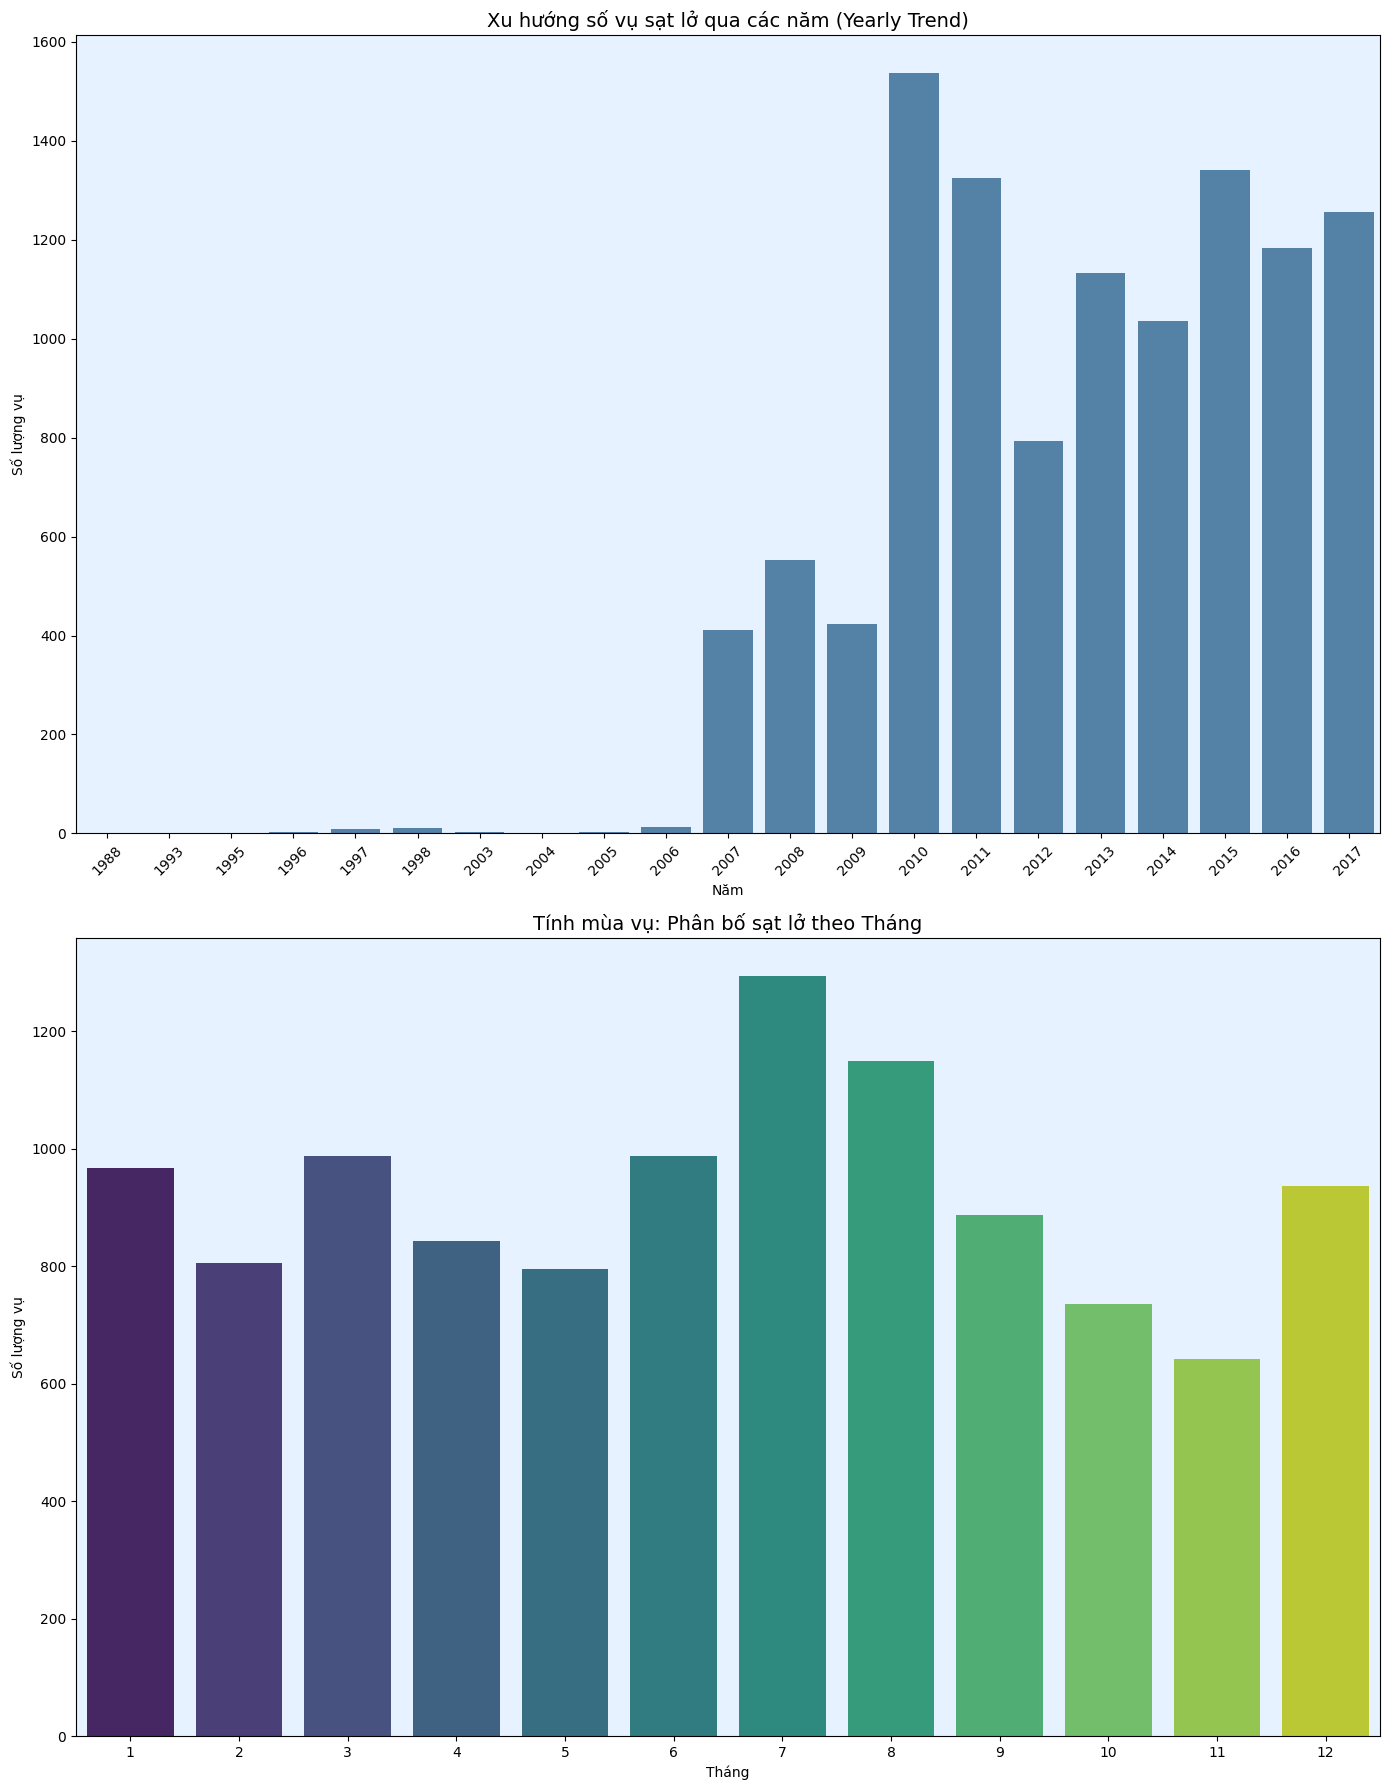

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- A. THỐNG KÊ CƠ BẢN ---
print("=== THỐNG KÊ THỜI GIAN ===")
print(f"Dữ liệu từ ngày: {df['event_date'].min().date()} đến {df['event_date'].max().date()}")
print(f"Tổng khoảng thời gian: {(df['event_date'].max() - df['event_date'].min()).days} ngày")
print(f"Năm có nhiều sạt lở nhất: {df['year'].mode()[0]} ({df['year'].value_counts().max()} vụ)")
print(f"Tháng 'đen tối' nhất trong năm: Tháng {df['month'].mode()[0]}")

# --- B. TRỰC QUAN HÓA ---
fig, axes = plt.subplots(2, 1, figsize=(14, 18))

# Biểu đồ 1: Xu hướng theo Năm (Yearly Trend)
sns.countplot(data=df, x='year', color='steelblue', ax=axes[0])
axes[0].set_title('Xu hướng số vụ sạt lở qua các năm (Yearly Trend)', fontsize=14)
axes[0].set_ylabel('Số lượng vụ')
axes[0].set_xlabel('Năm')
axes[0].tick_params(axis='x', rotation=45) # Xoay nhãn năm cho dễ đọc

# Biểu đồ 2: Tính mùa vụ (Monthly Seasonality)
sns.countplot(data=df, x='month', palette='viridis', ax=axes[1])
axes[1].set_title('Tính mùa vụ: Phân bố sạt lở theo Tháng', fontsize=14)
axes[1].set_ylabel('Số lượng vụ')
axes[1].set_xlabel('Tháng')

# # Biểu đồ 3: Heatmap (Năm vs Tháng) - Để nhìn mật độ
# # Tạo bảng Pivot: Hàng là Năm, Cột là Tháng, Giá trị là Số vụ
# pivot_table = df.groupby(['year', 'month']).size().unstack(fill_value=0)

# sns.heatmap(pivot_table, cmap='YlOrRd', linewidths=0.1, ax=axes[2])
# axes[2].set_title('Bản đồ nhiệt (Heatmap): Tần suất sạt lở theo Năm và Tháng', fontsize=14)
# axes[2].set_xlabel('Tháng')
# axes[2].set_ylabel('Năm')

plt.tight_layout()
plt.show()

#### Số vụ sạt lở ở bán cầu Bắc và Nam có sự khác biệt không? Tập trung vào tháng nào trong năm?

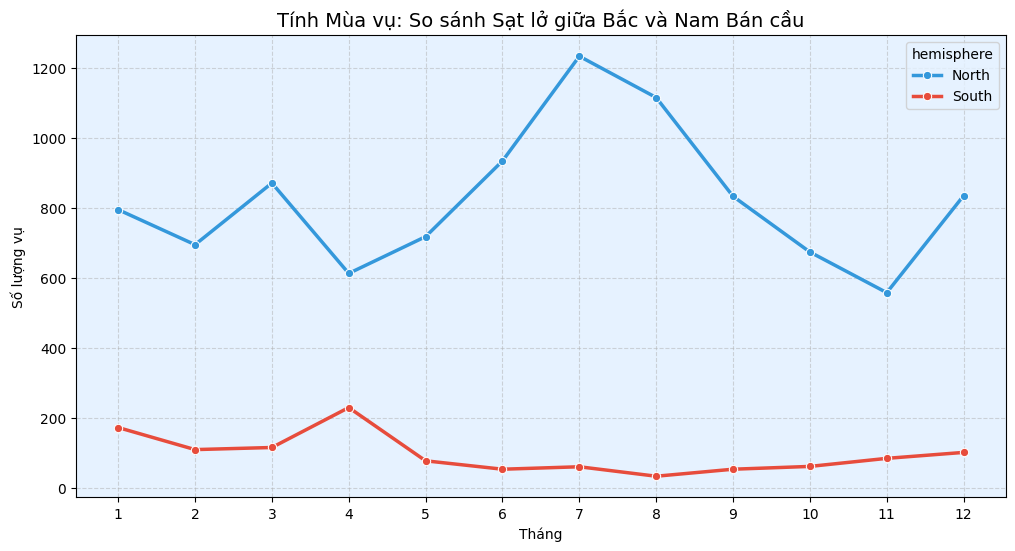

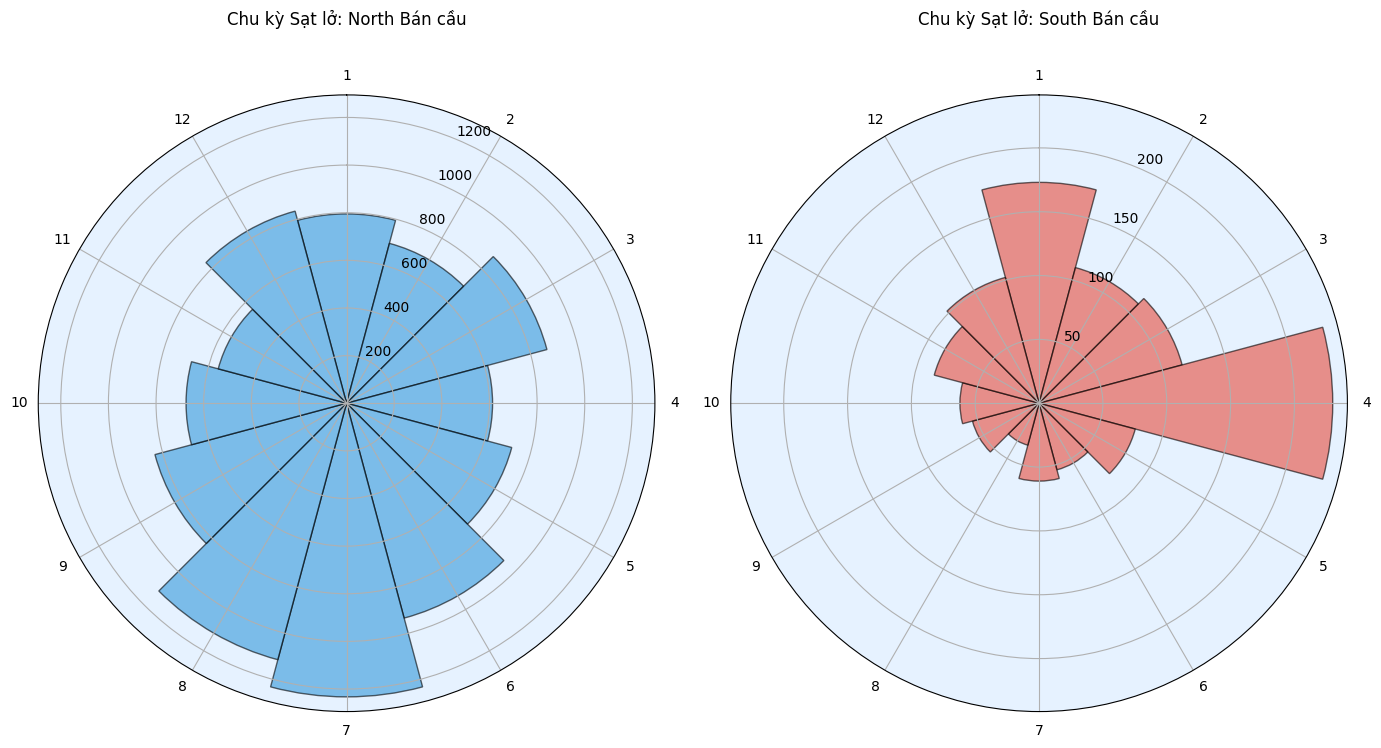

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === BƯỚC 1: TẠO CỘT BÁN CẦU (HEMISPHERE) ===
# Lat > 0 là Bắc, Lat < 0 là Nam
def get_hemisphere(lat):
    if pd.isna(lat) or lat == 0: return 'Unknown'
    return 'North' if lat > 0 else 'South'

df['hemisphere'] = df['latitude'].apply(get_hemisphere)

# Lọc bỏ Unknown để vẽ cho sạch
df_season = df[df['hemisphere'].isin(['North', 'South'])].copy()

# === BƯỚC 2: VẼ BIỂU ĐỒ SO SÁNH (LINE PLOT) ===
plt.figure(figsize=(12, 6))

# Đếm số vụ theo Tháng và Bán cầu
seasonal_data = df_season.groupby(['month', 'hemisphere']).size().reset_index(name='count')

sns.lineplot(
    data=seasonal_data, 
    x='month', 
    y='count', 
    hue='hemisphere', 
    marker='o',
    linewidth=2.5,
    palette={'North': '#3498db', 'South': '#e74c3c'} # Xanh cho Bắc, Đỏ cho Nam
)

plt.title('Tính Mùa vụ: So sánh Sạt lở giữa Bắc và Nam Bán cầu', fontsize=14)
plt.xlabel('Tháng')
plt.ylabel('Số lượng vụ')
plt.xticks(range(1, 13)) # Đảm bảo hiện đủ 12 tháng
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# === BƯỚC 3: BIỂU ĐỒ HOA HỒNG (POLAR CHART) - CỰC NGẦU ===
# Biểu đồ này giúp thấy rõ tính chu kỳ
def plot_polar_season(data, hemisphere_name, ax, color):
    # Đếm số vụ theo tháng (đảm bảo đủ 12 tháng kể cả tháng 0 vụ)
    counts = data[data['hemisphere'] == hemisphere_name]['month'].value_counts().sort_index()
    counts = counts.reindex(range(1, 13), fill_value=0)
    
    # Thiết lập góc (chia vòng tròn thành 12 phần)
    N = 12
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    radii = counts.values
    width = 2 * np.pi / N
    
    # Cần xoay trục để tháng 1 nằm ở trên cùng (theo chiều kim đồng hồ)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    
    bars = ax.bar(theta, radii, width=width, bottom=0.0, color=color, alpha=0.6, edgecolor='black')
    ax.set_title(f'Chu kỳ Sạt lở: {hemisphere_name} Bán cầu', y=1.1, fontsize=12)
    ax.set_xticks(theta)
    ax.set_xticklabels([str(i) for i in range(1, 13)]) # Nhãn tháng 1-12

# Vẽ 2 biểu đồ Polar cạnh nhau
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(121, projection='polar')
ax2 = fig.add_subplot(122, projection='polar')

plot_polar_season(df_season, 'North', ax1, '#3498db') # Bắc màu Xanh
plot_polar_season(df_season, 'South', ax2, '#e74c3c') # Nam màu Đỏ

plt.tight_layout()
plt.show()

In [80]:
df['hemisphere'].value_counts()


hemisphere
North    9874
South    1159
Name: count, dtype: int64

#### Số vụ sạt lở đất ở bán cầu Đông và Tây có sự khác biệt không? Tập trung vào tháng nào trong năm?

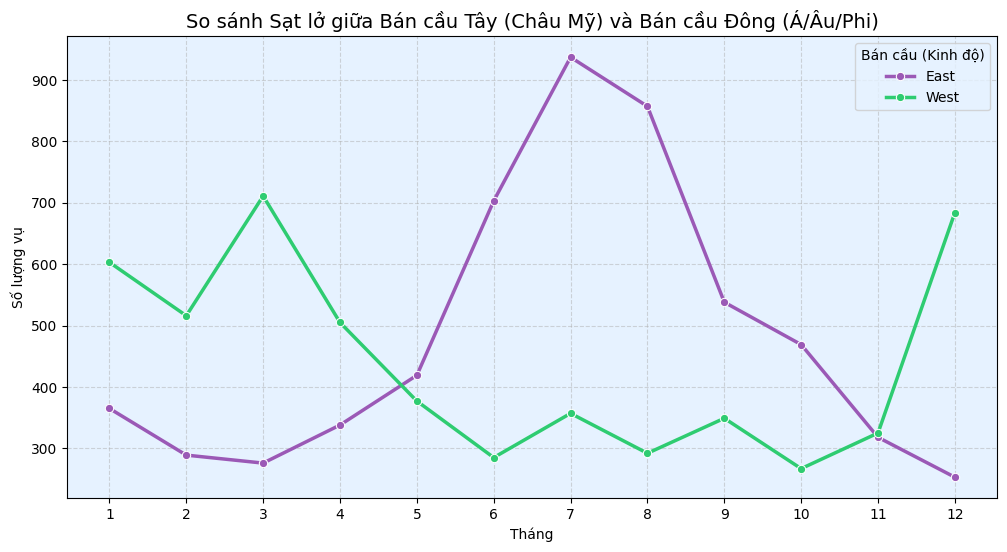

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Tạo cột Bán cầu Đông/Tây
def get_hemisphere_ew(lon):
    if pd.isna(lon): return 'Unknown'
    # Kinh độ < 0 là Tây (Mỹ...), Kinh độ > 0 là Đông (Á, Âu...)
    return 'West' if lon < 0 else 'East'

df['hemisphere_ew'] = df['longitude'].apply(get_hemisphere_ew)

# Lọc dữ liệu sạch
df_ew = df[df['hemisphere_ew'].isin(['West', 'East'])].copy()

# 2. Vẽ biểu đồ so sánh theo Tháng
plt.figure(figsize=(12, 6))

# Đếm số vụ
seasonal_ew = df_ew.groupby(['month', 'hemisphere_ew']).size().reset_index(name='count')

sns.lineplot(
    data=seasonal_ew, 
    x='month', 
    y='count', 
    hue='hemisphere_ew', 
    marker='o',
    linewidth=2.5,
    palette={'West': '#2ecc71', 'East': '#9b59b6'} # Tây xanh, Đông tím
)

plt.title('So sánh Sạt lở giữa Bán cầu Tây (Châu Mỹ) và Bán cầu Đông (Á/Âu/Phi)', fontsize=14)
plt.xlabel('Tháng')
plt.ylabel('Số lượng vụ')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Bán cầu (Kinh độ)')
plt.show()

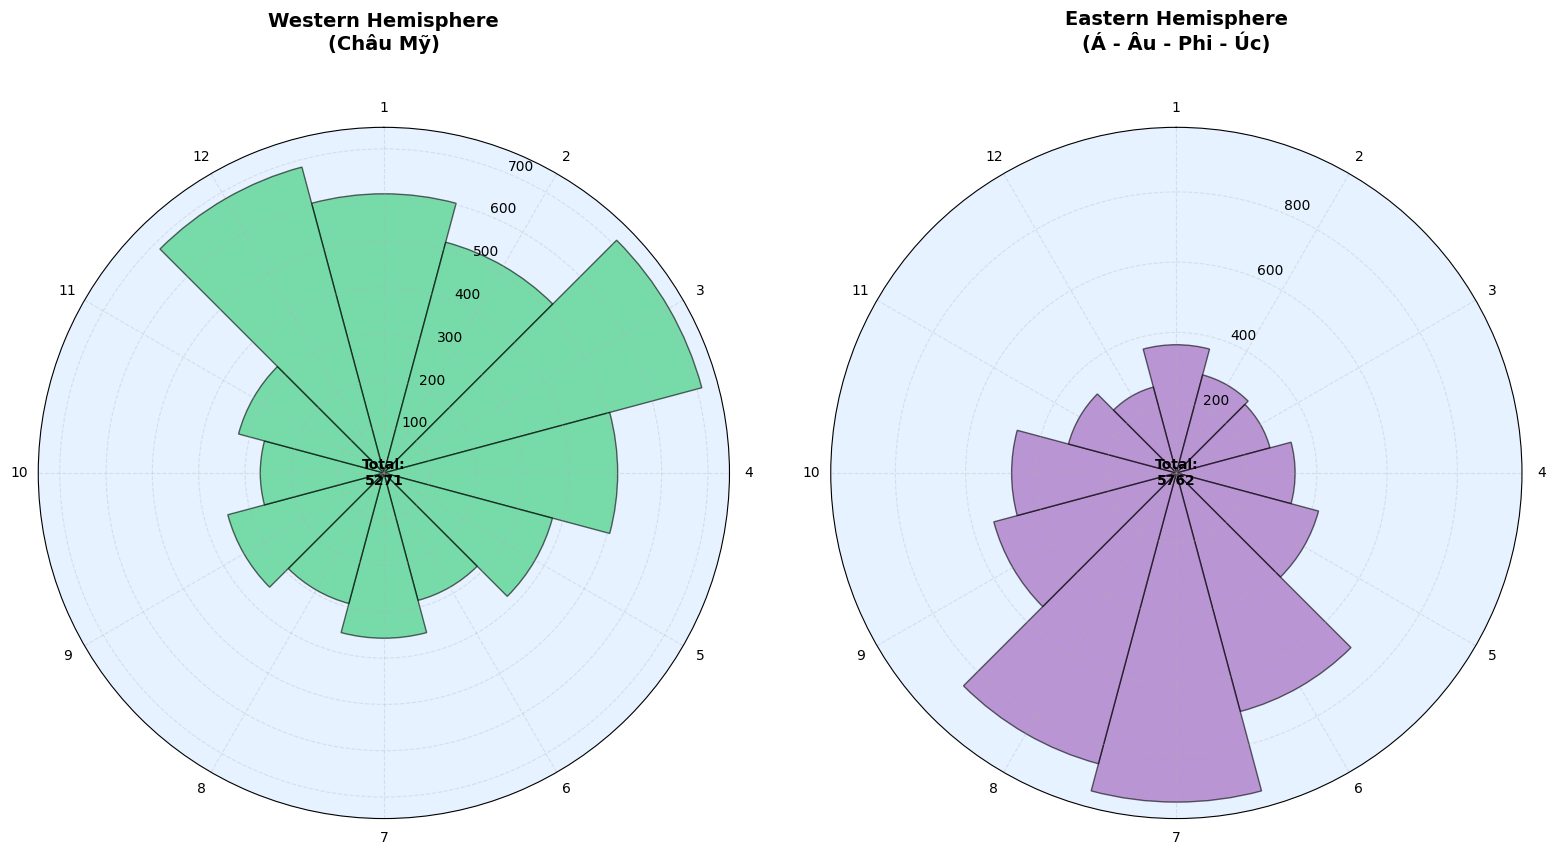

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. CHUẨN BỊ DỮ LIỆU
# Tạo cột Bán cầu Đông/Tây (nếu chưa có)
def get_hemisphere_ew(lon):
    if pd.isna(lon): return 'Unknown'
    return 'West' if lon < 0 else 'East'

df['hemisphere_ew'] = df['longitude'].apply(get_hemisphere_ew)

# Lọc dữ liệu sạch
df_polar_ew = df[df['hemisphere_ew'].isin(['West', 'East'])].copy()

# Đảm bảo có cột month
if 'month' not in df_polar_ew.columns:
    df_polar_ew['event_date'] = pd.to_datetime(df_polar_ew['event_date'], errors='coerce')
    df_polar_ew['month'] = df_polar_ew['event_date'].dt.month

# 2. HÀM VẼ BIỂU ĐỒ (Tái sử dụng form cũ nhưng chỉnh màu)
def plot_rose_chart_custom(data, hem_val, ax, color_fill, title_text):
    # Đếm số vụ
    counts = data[data['hemisphere_ew'] == hem_val]['month'].value_counts()
    counts = counts.reindex(range(1, 13), fill_value=0).sort_index()
    
    # Setup khung tròn
    N = 12
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    radii = counts.values
    width = 2 * np.pi / N
    
    # Xoay để tháng 1 lên đỉnh
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    
    # Vẽ
    ax.bar(theta, radii, width=width, bottom=0.0, color=color_fill, alpha=0.6, edgecolor='black')
    
    # Trang trí
    ax.set_title(title_text, y=1.1, fontsize=14, fontweight='bold')
    ax.set_xticks(theta)
    ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # Thêm text tổng số vụ ở giữa để so sánh quy mô
    total_events = counts.sum()
    ax.text(0, 0, f"Total:\n{total_events}", ha='center', va='center', fontweight='bold', fontsize=10)

# 3. VẼ SIDE-BY-SIDE
fig = plt.figure(figsize=(16, 8))

# Bán cầu Tây (Châu Mỹ) - Màu Xanh Lá
ax1 = fig.add_subplot(121, projection='polar')
plot_rose_chart_custom(df_polar_ew, 'West', ax1, '#2ecc71', 'Western Hemisphere\n(Châu Mỹ)')

# Bán cầu Đông (Á, Âu, Phi, Úc) - Màu Tím
ax2 = fig.add_subplot(122, projection='polar')
plot_rose_chart_custom(df_polar_ew, 'East', ax2, '#9b59b6', 'Eastern Hemisphere\n(Á - Âu - Phi - Úc)')

plt.tight_layout()
plt.show()

#### Phân bố các landslide_category theo các tháng ở Bắc bán cầu và Nam bán cầu ntn?

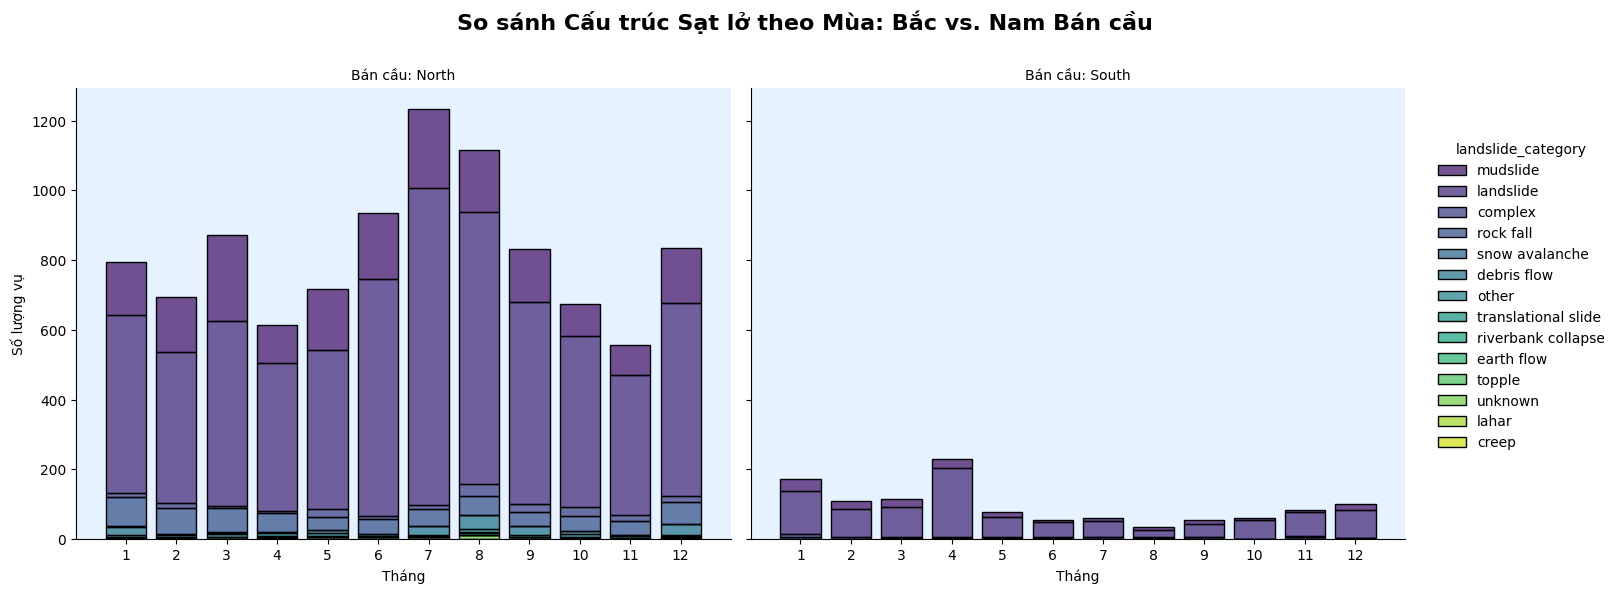

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. CHUẨN BỊ DỮ LIỆU
# Lấy Top 5 loại hình để biểu đồ không bị "nát" màu
top_cats = df['landslide_category'].value_counts().index
df_plot = df[
    (df['hemisphere'].isin(['North', 'South'])) & 
    (df['landslide_category'].isin(top_cats)) &
    (df['month'].notna())
].copy()

# Sắp xếp lại tháng cho đúng thứ tự
df_plot = df_plot.sort_values('month')

# 2. VẼ BIỂU ĐỒ (Dùng displot của Seaborn)
# kind='hist': Vẽ biểu đồ đếm tần suất
# multiple='stack': Chồng các cột lên nhau
# col='hemisphere': Chia làm 2 biểu đồ (Bắc/Nam) cạnh nhau
g = sns.displot(
    data=df_plot, 
    x='month', 
    hue='landslide_category', 
    col='hemisphere', 
    kind='hist', 
    multiple='stack',
    palette='viridis',
    height=6, 
    aspect=1.2,
    bins=12,         # Đảm bảo chia đủ 12 cột tháng
    discrete=True,    # Để cột nằm đúng vào số nguyên (tháng 1, 2...)
    shrink=0.8        # Thu nhỏ bề ngang cột cho thoáng
)

# 3. TRANG TRÍ LẠI CHO ĐẸP
g.set_axis_labels("Tháng", "Số lượng vụ")
g.set_titles("Bán cầu: {col_name}") # Đổi tên tiêu đề từng hình
g.set(xticks=range(1, 13)) # Đảm bảo hiện đủ số 1-12

# Thêm tiêu đề tổng
plt.subplots_adjust(top=0.85) # Đẩy hình xuống để chừa chỗ cho title
g.fig.suptitle('So sánh Cấu trúc Sạt lở theo Mùa: Bắc vs. Nam Bán cầu', fontsize=16, fontweight='bold')

plt.show()

 #### Phân bố các landslide_category theo các tháng ở Tây bán cầu và Đong bán cầu ntn?

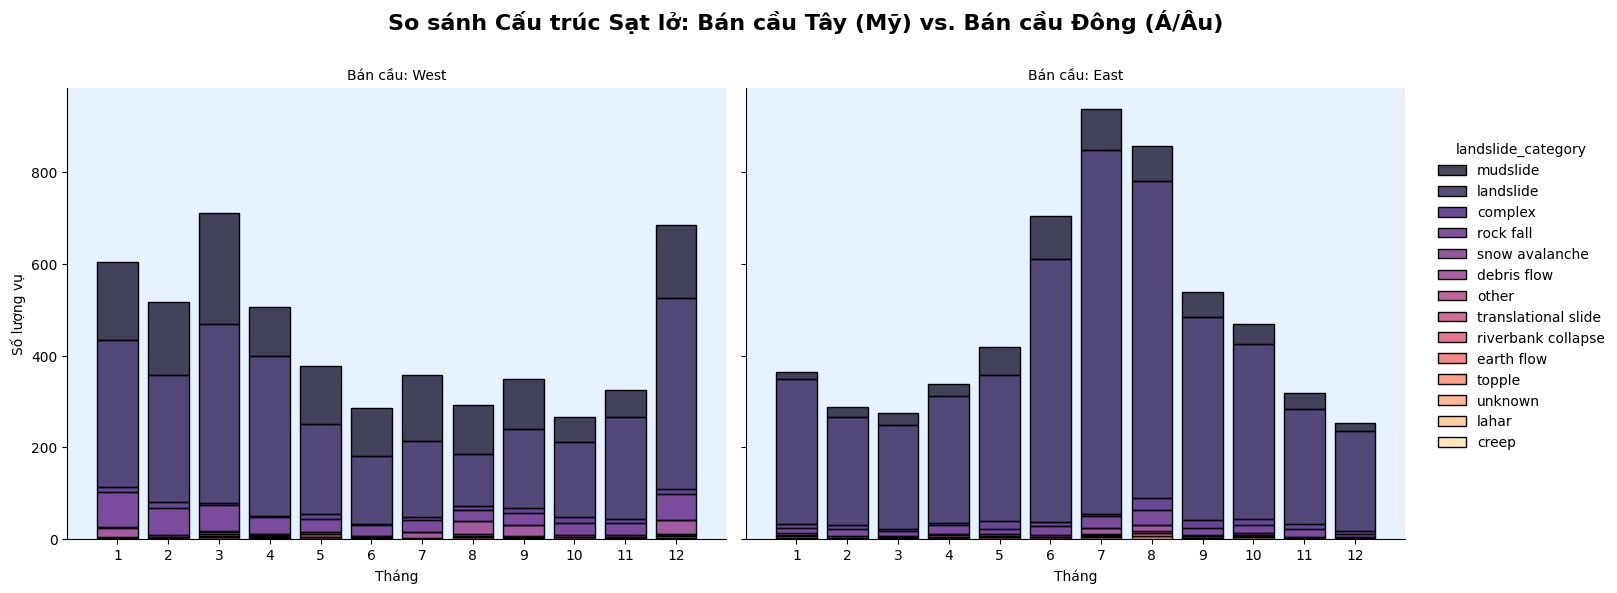

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. CHUẨN BỊ DỮ LIỆU
# Tạo cột Bán cầu Đông/Tây (nếu chưa chạy cell trước đó)
def get_hemisphere_ew(lon):
    if pd.isna(lon): return 'Unknown'
    return 'West' if lon < 0 else 'East'

df['hemisphere_ew'] = df['longitude'].apply(get_hemisphere_ew)

# Lấy Top 5 loại hình phổ biến nhất
top_cats = df['landslide_category'].value_counts().index

# Lọc dữ liệu: Chỉ lấy Đông/Tây, thuộc top loại hình, và có thông tin tháng
df_plot_ew = df[
    (df['hemisphere_ew'].isin(['West', 'East'])) & 
    (df['landslide_category'].isin(top_cats)) &
    (df['month'].notna())
].copy()

# Sắp xếp dữ liệu theo tháng để biểu đồ chạy từ 1 -> 12
df_plot_ew = df_plot_ew.sort_values('month')

# 2. VẼ BIỂU ĐỒ
# col='hemisphere_ew': Chia làm 2 hình dựa trên Đông/Tây
# col_order=['West', 'East']: Để Tây (Châu Mỹ) bên trái, Đông (Châu Á) bên phải cho thuận mắt
g = sns.displot(
    data=df_plot_ew, 
    x='month', 
    hue='landslide_category', 
    col='hemisphere_ew', 
    col_order=['West', 'East'],
    kind='hist', 
    multiple='stack',
    palette='magma',  # Đổi bảng màu sang 'magma' cho khác biệt chút với hình trước
    height=6, 
    aspect=1.2,
    bins=12,
    discrete=True,
    shrink=0.8
)

# 3. TRANG TRÍ
g.set_axis_labels("Tháng", "Số lượng vụ")
g.set_titles("Bán cầu: {col_name}") 
g.set(xticks=range(1, 13))

# Thêm tiêu đề tổng
plt.subplots_adjust(top=0.85)
g.fig.suptitle('So sánh Cấu trúc Sạt lở: Bán cầu Tây (Mỹ) vs. Bán cầu Đông (Á/Âu)', fontsize=16, fontweight='bold')

plt.show()

#### landslide_category theo các tháng 

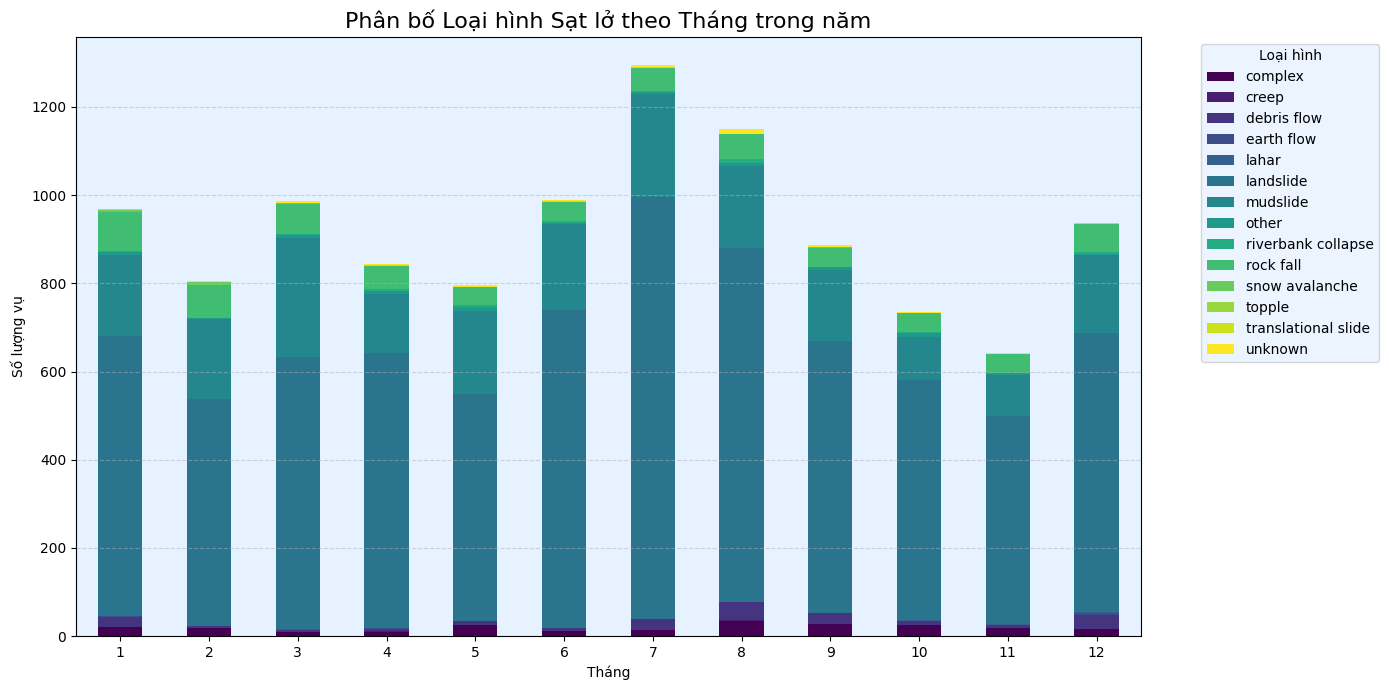

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === BƯỚC 1: CHUẨN BỊ DỮ LIỆU ===
# Lấy Top 5 loại sạt lở phổ biến nhất
top_cats = df['landslide_category'].value_counts().index

# Lọc dữ liệu
df_cat_month = df[df['landslide_category'].isin(top_cats)].copy()

# Tạo bảng chéo: Hàng là Tháng (1-12), Cột là Loại hình
ct_cat_month = pd.crosstab(df_cat_month['month'], df_cat_month['landslide_category'])

# === BƯỚC 2: VẼ BIỂU ĐỒ ===
# Vẽ Stacked Bar Chart
ax = ct_cat_month.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')

plt.title('Phân bố Loại hình Sạt lở theo Tháng trong năm', fontsize=16)
plt.xlabel('Tháng')
plt.ylabel('Số lượng vụ')
plt.xticks(rotation=0) # Để số tháng nằm ngang cho dễ đọc
plt.legend(title='Loại hình', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

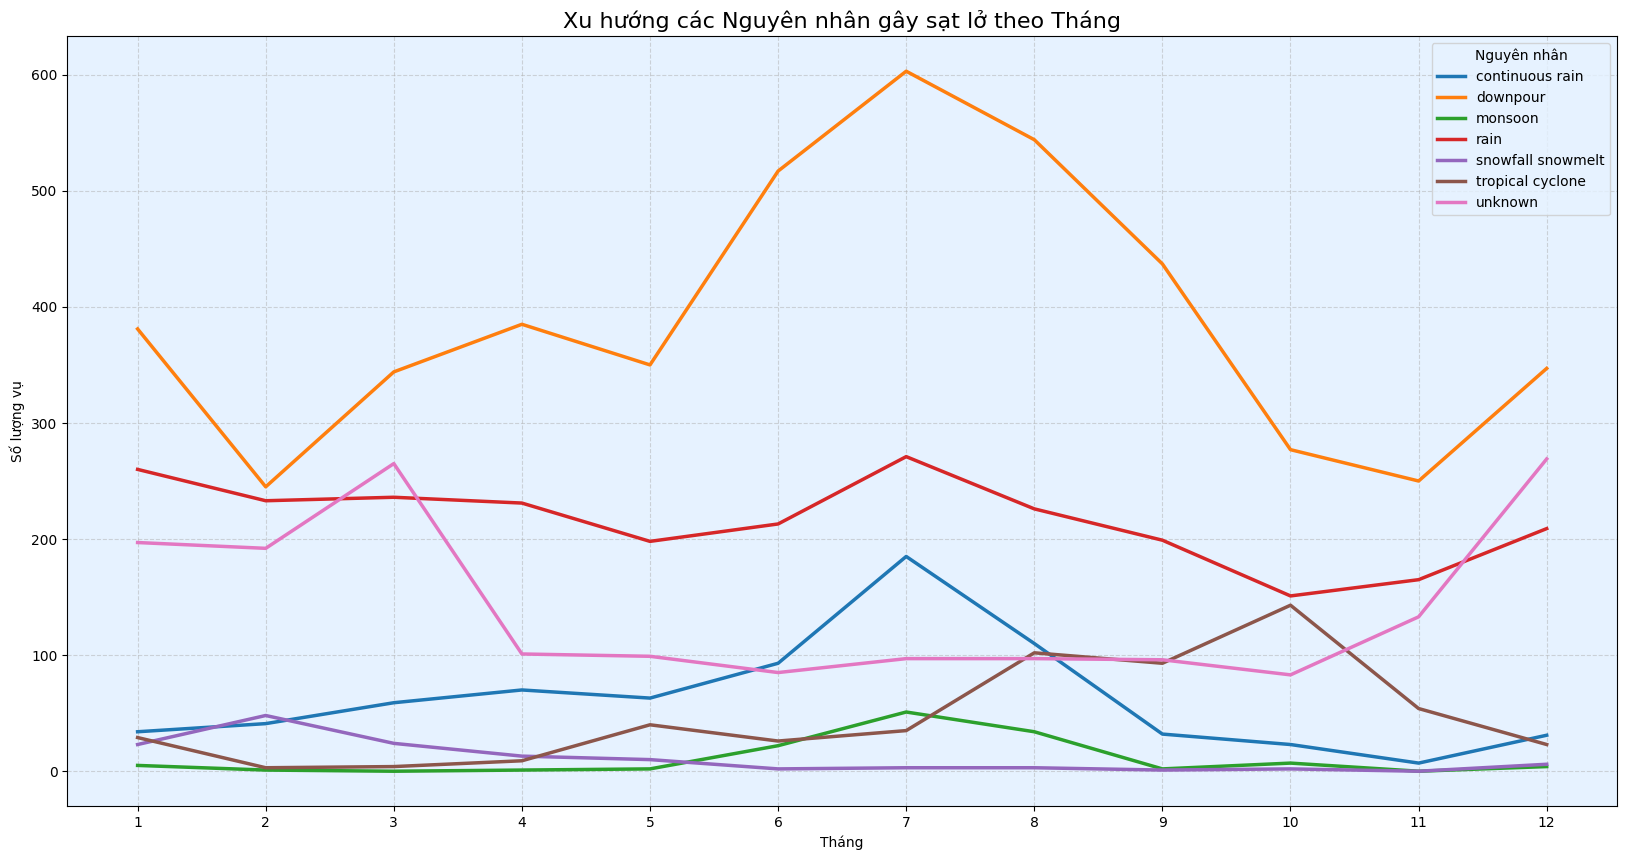

In [101]:
# === PHÂN TÍCH TRIGGER THEO THÁNG ===
# Lấy Top 5 nguyên nhân
top_triggers = df['landslide_trigger'].value_counts().head(7).index
df_trig_month = df[df['landslide_trigger'].isin(top_triggers)].copy()

# Tạo bảng chéo
ct_trig_month = pd.crosstab(df_trig_month['month'], df_trig_month['landslide_trigger'])

# Vẽ biểu đồ Line Plot (Dễ nhìn xu hướng hơn Bar)
plt.figure(figsize=(20, 10))
sns.lineplot(data=ct_trig_month, dashes=False, linewidth=2.5)

plt.title('Xu hướng các Nguyên nhân gây sạt lở theo Tháng', fontsize=16)
plt.xlabel('Tháng')
plt.ylabel('Số lượng vụ')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Nguyên nhân')

plt.show()

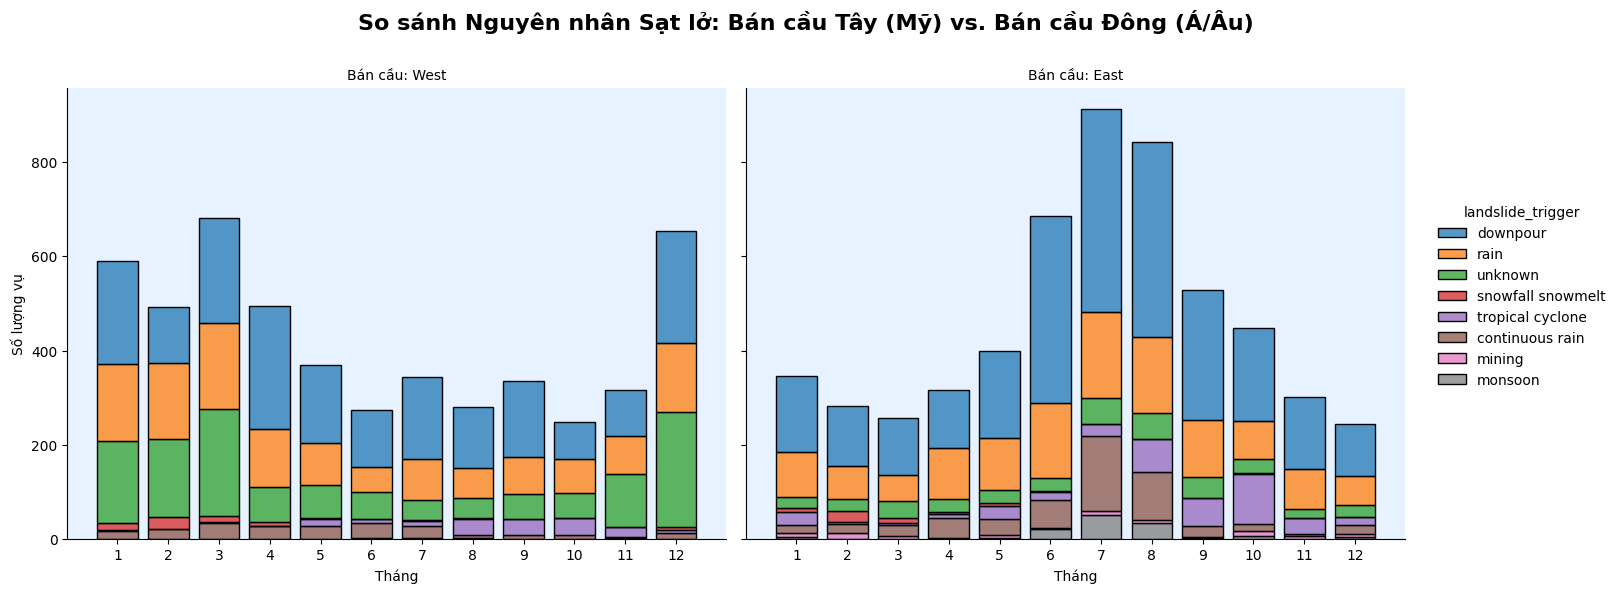

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. CHUẨN BỊ DỮ LIỆU
# Tạo cột Bán cầu Đông/Tây (nếu chưa có)
def get_hemisphere_ew(lon):
    if pd.isna(lon): return 'Unknown'
    return 'West' if lon < 0 else 'East'

df['hemisphere_ew'] = df['longitude'].apply(get_hemisphere_ew)

# Lọc Top 5 Nguyên nhân phổ biến nhất (để biểu đồ không bị rối màu)
top_triggers = df['landslide_trigger'].value_counts().head(8).index

# Lọc dữ liệu sạch
df_trig_ew = df[
    (df['hemisphere_ew'].isin(['West', 'East'])) & 
    (df['landslide_trigger'].isin(top_triggers)) &
    (df['month'].notna())
].copy()

# Sắp xếp theo tháng
df_trig_ew = df_trig_ew.sort_values('month')

# 2. VẼ BIỂU ĐỒ (Small Multiples)
g = sns.displot(
    data=df_trig_ew, 
    x='month', 
    hue='landslide_trigger', # Màu sắc là Nguyên nhân
    col='hemisphere_ew',     # Chia 2 hình theo Bán cầu
    col_order=['West', 'East'],
    kind='hist', 
    multiple='stack',
    palette='tab10',         # Dùng bảng màu tương phản mạnh
    height=6, 
    aspect=1.2,
    bins=12,
    discrete=True,
    shrink=0.8
)

# 3. TRANG TRÍ
g.set_axis_labels("Tháng", "Số lượng vụ")
g.set_titles("Bán cầu: {col_name}") 
g.set(xticks=range(1, 13))

plt.subplots_adjust(top=0.85)
g.fig.suptitle('So sánh Nguyên nhân Sạt lở: Bán cầu Tây (Mỹ) vs. Bán cầu Đông (Á/Âu)', fontsize=16, fontweight='bold')

plt.show()

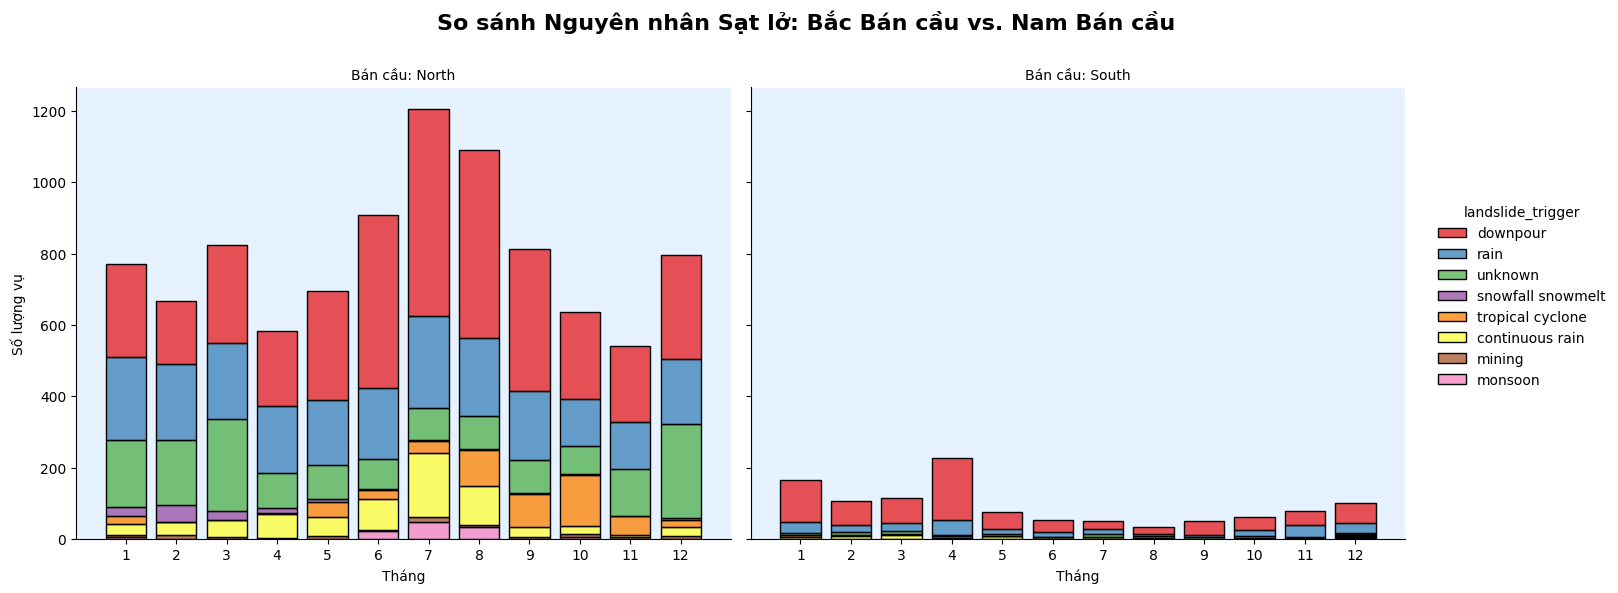

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. CHUẨN BỊ DỮ LIỆU
# Tạo cột Bán cầu Bắc/Nam (nếu chưa có)
def get_hemisphere(lat):
    if pd.isna(lat): return 'Unknown'
    return 'North' if lat > 0 else 'South'

df['hemisphere'] = df['latitude'].apply(get_hemisphere)

# Lấy Top 5 Nguyên nhân phổ biến nhất
top_triggers = df['landslide_trigger'].value_counts().head(8).index

# Lọc dữ liệu sạch
df_trig_ns = df[
    (df['hemisphere'].isin(['North', 'South'])) & 
    (df['landslide_trigger'].isin(top_triggers)) &
    (df['month'].notna())
].copy()

# Sắp xếp theo tháng
df_trig_ns = df_trig_ns.sort_values('month')

# 2. VẼ BIỂU ĐỒ
g = sns.displot(
    data=df_trig_ns, 
    x='month', 
    hue='landslide_trigger', # Màu sắc là Nguyên nhân
    col='hemisphere',        # Chia 2 hình theo Bắc/Nam
    col_order=['North', 'South'],
    kind='hist', 
    multiple='stack',
    palette='Set1',          # Dùng bảng màu rực rỡ để dễ phân biệt
    height=6, 
    aspect=1.2,
    bins=12,
    discrete=True,
    shrink=0.8
)

# 3. TRANG TRÍ
g.set_axis_labels("Tháng", "Số lượng vụ")
g.set_titles("Bán cầu: {col_name}") 
g.set(xticks=range(1, 13))

plt.subplots_adjust(top=0.85)
g.fig.suptitle('So sánh Nguyên nhân Sạt lở: Bắc Bán cầu vs. Nam Bán cầu', fontsize=16, fontweight='bold')

plt.show()

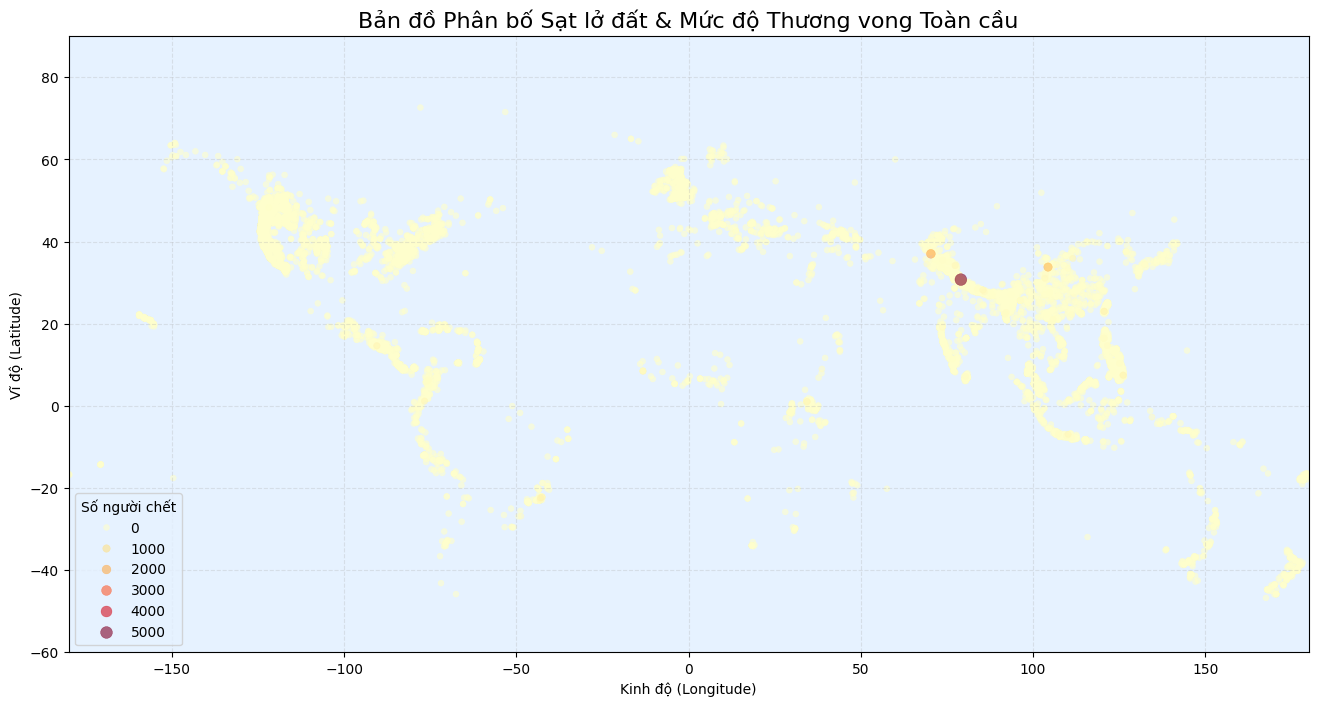

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chuẩn bị dữ liệu: Lọc bỏ toạ độ 0,0 và NaN
geo_df = df[(df['latitude'] != 0) & (df['longitude'] != 0) & 
            df['latitude'].notna() & df['longitude'].notna()].copy()

# Sắp xếp để các điểm màu đỏ (nguy hiểm) nằm đè lên trên các điểm màu nhạt
geo_df = geo_df.sort_values('fatality_count')

# 2. Vẽ Bản đồ Scatter Plot
plt.figure(figsize=(16, 8))

# Vẽ các điểm
sns.scatterplot(
    data=geo_df,
    x='longitude', 
    y='latitude',
    hue='fatality_count',      # Màu sắc theo số người chết
    size='fatality_count',     # Kích thước theo số người chết
    # sizes=(10, 300),           # Kích thước điểm từ nhỏ đến lớn
    palette='YlOrRd',          # Dải màu từ Vàng (nhẹ) sang Đỏ (nguy hiểm)
    alpha=0.6,                 # Độ trong suốt để nhìn thấy mật độ chồng lấn
    edgecolor=None
)

# Trang trí
plt.title('Bản đồ Phân bố Sạt lở đất & Mức độ Thương vong Toàn cầu', fontsize=16)
plt.xlabel('Kinh độ (Longitude)')
plt.ylabel('Vĩ độ (Latitude)')
plt.grid(True, linestyle='--', alpha=0.3) # Lưới mờ để dễ định vị
plt.legend(title='Số người chết', loc='lower left')

# Giới hạn trục để loại bỏ các điểm nhiễu quá xa (nếu có)
plt.xlim(-180, 180)
plt.ylim(-60, 90)

plt.show()

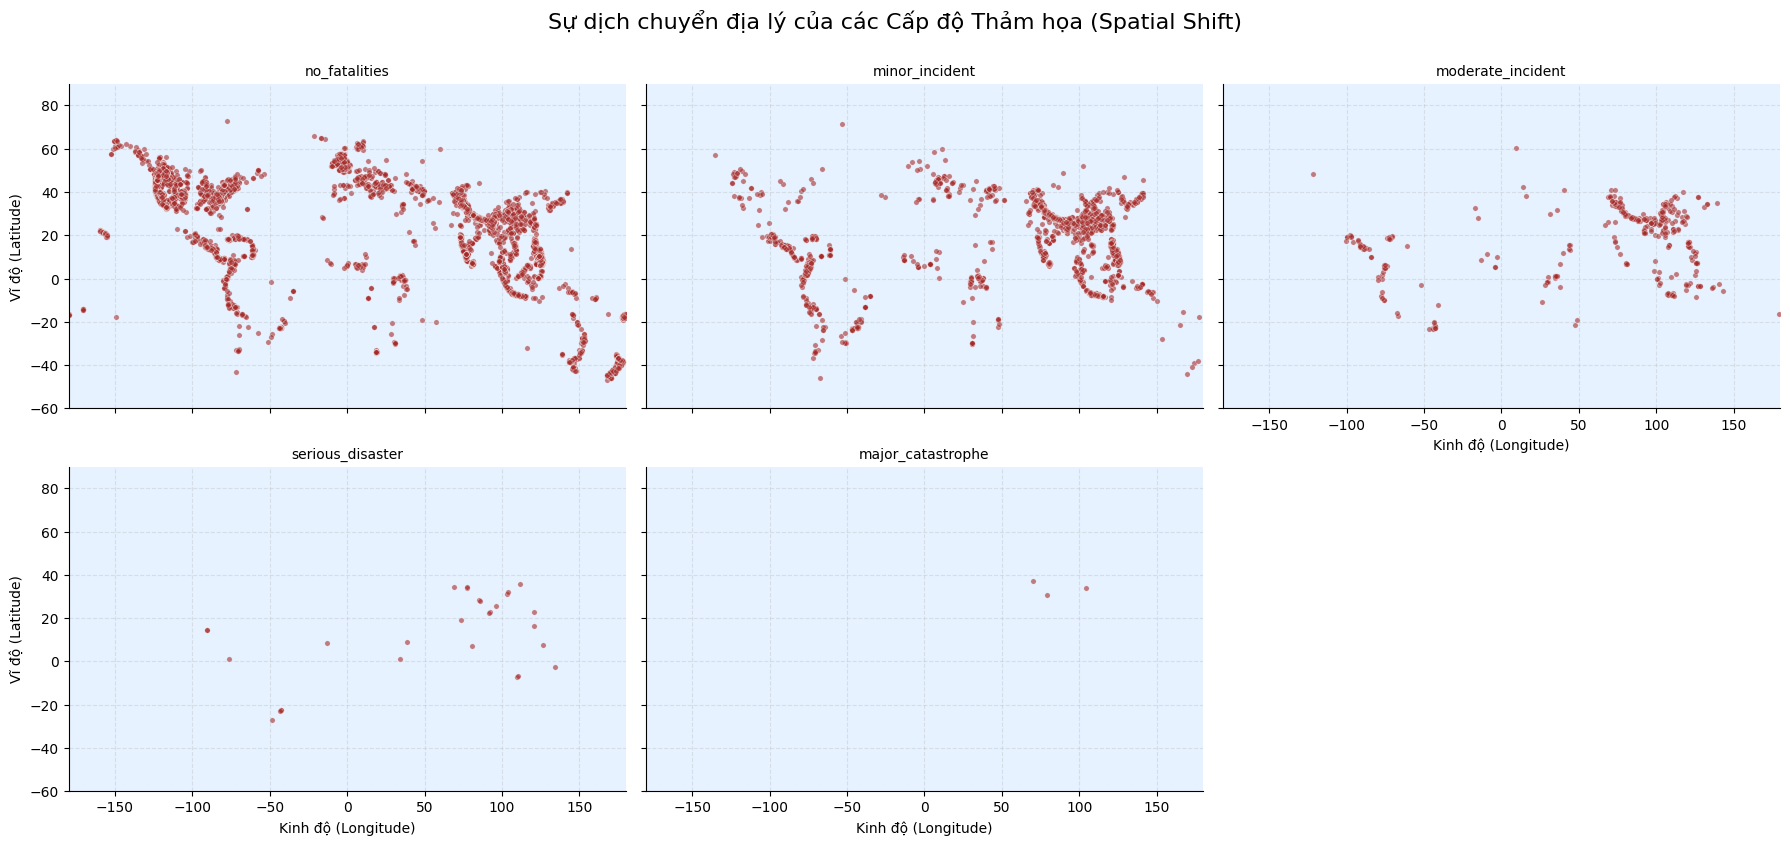

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Chuẩn bị dữ liệu
# Lọc toạ độ rác và đảm bảo thứ tự của Class
geo_df = df[(df['latitude'] != 0) & (df['longitude'] != 0)].copy()

# Định nghĩa thứ tự để vẽ từ Nhẹ -> Nặng
class_order = [
    'no_fatalities', 
    'minor_incident', 
    'moderate_incident', 
    'serious_disaster', 
    'major_catastrophe'
]

# 2. Vẽ FacetGrid (Lưới biểu đồ)
g = sns.FacetGrid(
    geo_df, 
    col='fatality_class',      # Tách cột theo Class
    col_order=class_order,     # Theo thứ tự mức độ
    col_wrap=3,                # Ngắt dòng sau mỗi 3 biểu đồ
    height=4, aspect=1.5,      # Kích thước mỗi biểu đồ con
    sharex=True, sharey=True   # Dùng chung trục toạ độ để dễ so sánh
)

# Vẽ điểm lên từng biểu đồ con
g.map(sns.scatterplot, 'longitude', 'latitude', alpha=0.6, s=15, color='brown')

# 3. Trang trí
g.fig.suptitle('Sự dịch chuyển địa lý của các Cấp độ Thảm họa (Spatial Shift)', fontsize=16, y=1.05)
g.set_axis_labels("Kinh độ (Longitude)", "Vĩ độ (Latitude)")
g.set_titles(col_template="{col_name}") # Đặt tên tiêu đề cho từng ô

# Vẽ đường nền biên giới thế giới (đơn giản hoá bằng grid) để dễ hình dung
for ax in g.axes.flat:
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_ylim(-60, 90)
    ax.set_xlim(-180, 180)

plt.show()

landslide_size


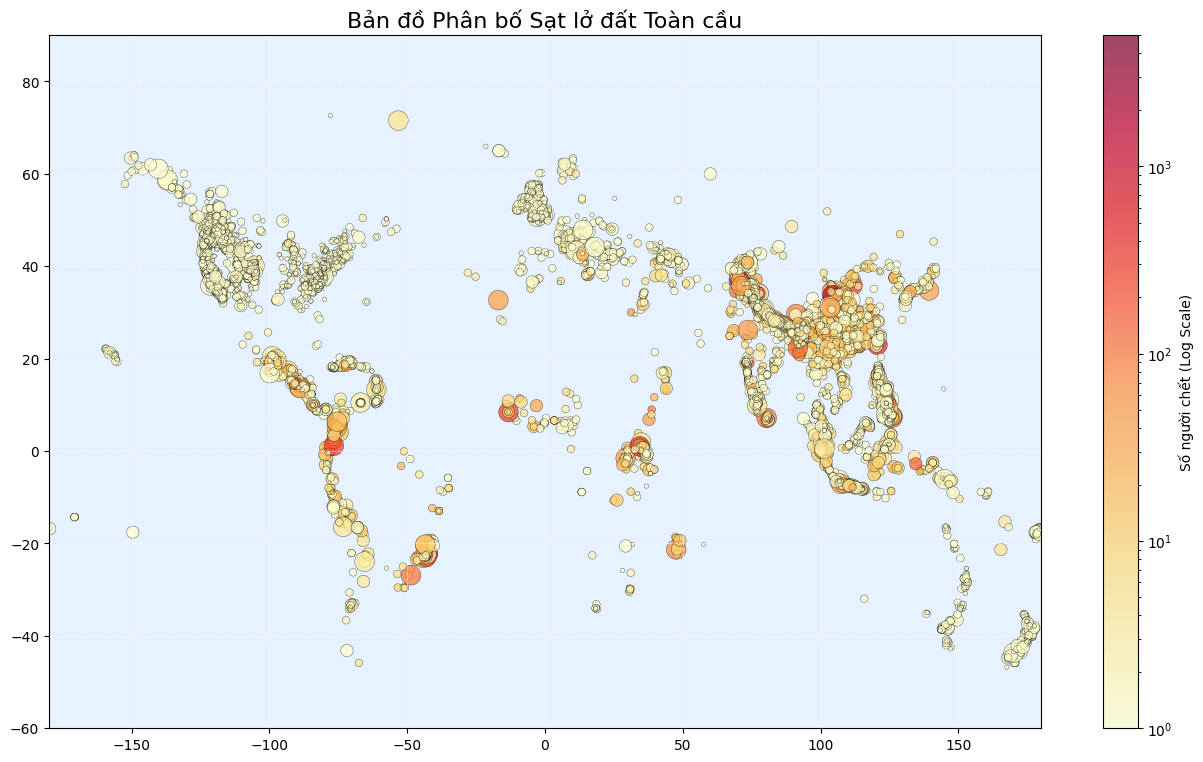

In [50]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Chuẩn bị dữ liệu kích thước điểm (Size)
size_mapping = {'small': 10, 'medium': 30, 'large': 80, 'very_large': 200}
df['plot_size'] = df['landslide_size'].map(size_mapping).fillna(10)
df['fatality_count'] = df['fatality_count'].fillna(0)

# Vẽ biểu đồ
plt.figure(figsize=(16, 9))
plt.rcParams['axes.facecolor'] = '#e6f2ff' # Màu xanh nhạt giả lập đại dương

scatter = plt.scatter(
    x=df['longitude'], 
    y=df['latitude'],
    c=df['fatality_count'] + 1, # Cộng 1 để tránh log(0)
    s=df['plot_size'],          # Kích thước theo quy mô
    cmap='YlOrRd',              # Màu từ Vàng -> Đỏ
    norm=LogNorm(),             # Dùng Log Scale cho màu sắc
    alpha=0.7,                  # Độ trong suốt
    edgecolors='k', linewidth=0.3
)

plt.colorbar(scatter, label='Số người chết (Log Scale)')
plt.title('Bản đồ Phân bố Sạt lở đất Toàn cầu', fontsize=16)
plt.xlim(-180, 180)
plt.ylim(-60, 90)
plt.grid(True, color='white', linestyle='--', alpha=0.5)
plt.show()

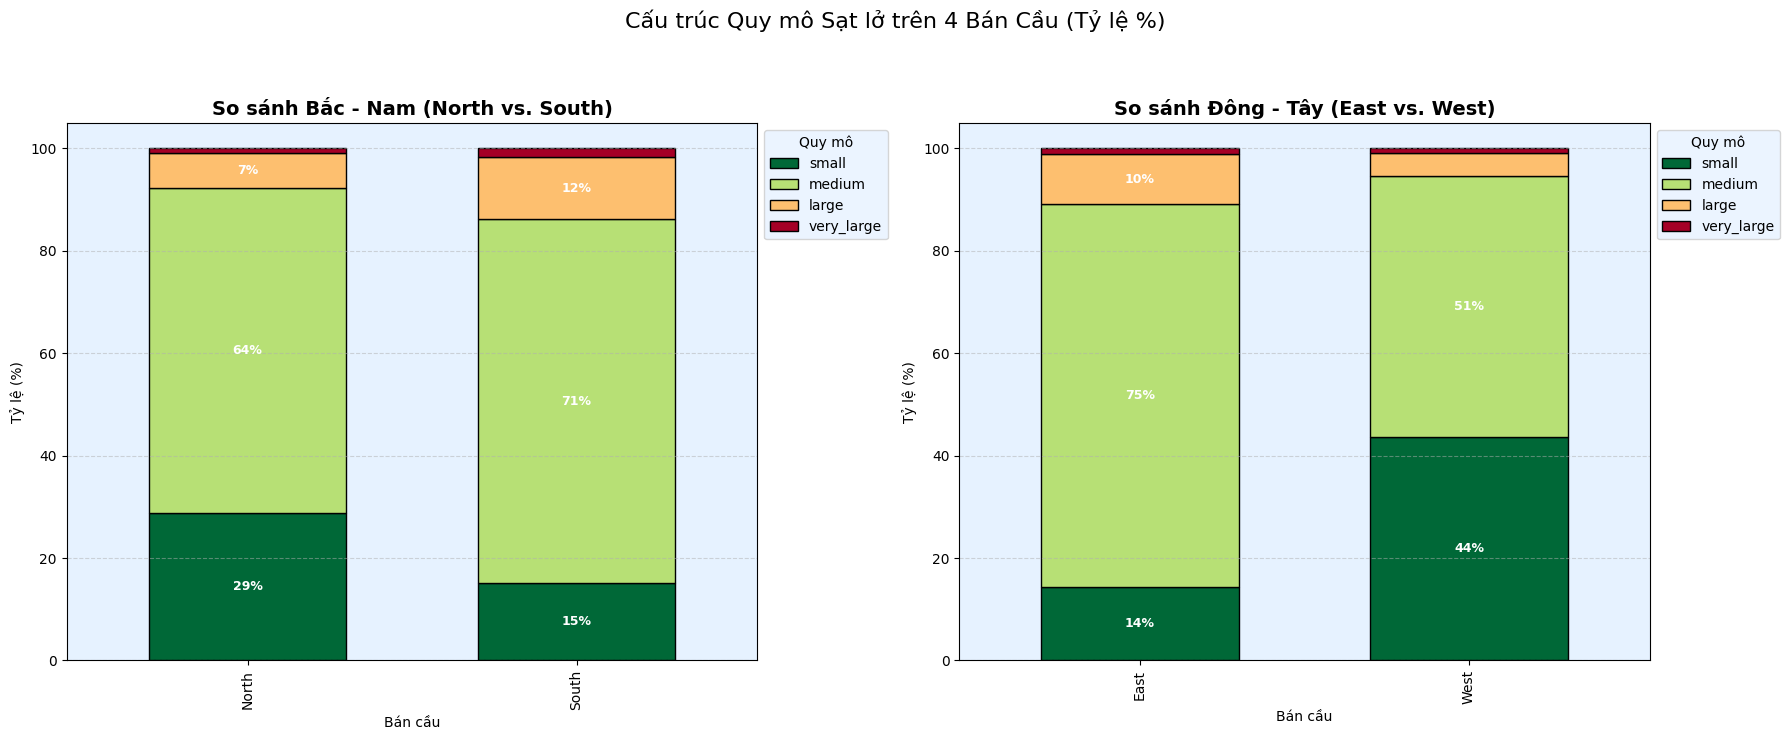

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. CHUẨN BỊ DỮ LIỆU
# Định nghĩa thứ tự quy mô (Rất quan trọng để biểu đồ không bị lộn xộn)
size_order = ['small', 'medium', 'large', 'very_large']

# Tạo cột Bán cầu (nếu chưa có)
def get_hemisphere_ns(lat):
    if pd.isna(lat): return 'Unknown'
    return 'North' if lat > 0 else 'South'

def get_hemisphere_ew(lon):
    if pd.isna(lon): return 'Unknown'
    return 'West' if lon < 0 else 'East'

df['hemisphere_ns'] = df['latitude'].apply(get_hemisphere_ns)
df['hemisphere_ew'] = df['longitude'].apply(get_hemisphere_ew)

# Lọc dữ liệu sạch
df_size = df[
    (df['landslide_size'].isin(size_order)) & 
    (df['hemisphere_ns'] != 'Unknown') & 
    (df['hemisphere_ew'] != 'Unknown')
].copy()

# 2. HÀM VẼ BIỂU ĐỒ CHỒNG 100%
def plot_normalized_size(data, col_hemisphere, ax, title):
    # Tạo bảng chéo: Hàng = Bán cầu, Cột = Size
    ct = pd.crosstab(data[col_hemisphere], data['landslide_size'])
    
    # Sắp xếp lại cột theo đúng thứ tự Small -> Catastrophic
    ct = ct[size_order]
    
    # Chuẩn hóa theo hàng (để tổng mỗi hàng = 100%)
    ct_norm = ct.div(ct.sum(1), axis=0) * 100
    
    # Vẽ biểu đồ
    # Dùng colormap 'RdYlGn_r': Xanh (Small) -> Đỏ (Catastrophic)
    ct_norm.plot(kind='bar', stacked=True, ax=ax, colormap='RdYlGn_r', edgecolor='black', width=0.6)
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel('Tỷ lệ (%)')
    ax.set_xlabel('Bán cầu')
    ax.legend(title='Quy mô', bbox_to_anchor=(1, 1))
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Thêm số % vào giữa cột cho dễ đọc
    for c in ax.containers:
        # Chỉ hiện số nếu thanh đủ lớn (> 5%)
        labels = [f'{v.get_height():.0f}%' if v.get_height() > 5 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize=9, color='white', fontweight='bold')

# 3. VẼ SIDE-BY-SIDE
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Hình 1: Bắc vs. Nam
plot_normalized_size(df_size, 'hemisphere_ns', axes[0], 'So sánh Bắc - Nam (North vs. South)')

# Hình 2: Đông vs. Tây
plot_normalized_size(df_size, 'hemisphere_ew', axes[1], 'So sánh Đông - Tây (East vs. West)')

plt.suptitle('Cấu trúc Quy mô Sạt lở trên 4 Bán Cầu (Tỷ lệ %)', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

In [112]:
import plotly.express as px
import pandas as pd

# 1. CHUẨN BỊ DỮ LIỆU
df['fatality_count'] = pd.to_numeric(df['fatality_count'], errors='coerce').fillna(0)
# Chỉ lấy nơi có người chết
df_fatal_only = df[df['fatality_count'] > 0].copy()

# 2. VẼ BIỂU ĐỒ VỚI MÀU MỚI
fig = px.scatter_geo(
    df_fatal_only,
    lat='latitude',
    lon='longitude',
    
    # --- THAY ĐỔI Ở ĐÂY: Dải màu Turbo ---
    # Turbo đi từ Xanh đậm -> Đỏ rực, rất dễ thấy trên nền trắng
    color="fatality_count",
    color_continuous_scale="Turbo", 
    
    size="fatality_count",
    
    # Thông tin hiển thị
    hover_name="event_title",
    hover_data={
        "latitude": False,
        "longitude": False,
        "landslide_category": True,
        "country_name": True,
        'admin_division_name': True,
        "fatality_count": True
    },
    
    projection="natural earth",
    title=f"Phân bố các vụ Sạt lở gây chết người (Màu Turbo tương phản cao)",
    size_max=50,
    
    labels={"fatality_count": "Số người chết", "landslide_size": "Quy mô"}
)

# Tinh chỉnh nền bản đồ
fig.update_layout(
    geo=dict(
        showland=True, landcolor="#f5f5f5", # Nền đất xám nhạt
        showocean=True, oceancolor="#e6f2ff",
        showcountries=True, countrycolor="white",
        showcoastlines=True, coastlinecolor="#cccccc"
    ),
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

In [122]:
import plotly.express as px
import pandas as pd

# 1. CHUẨN BỊ DỮ LIỆU
# Lấy tất cả dữ liệu, không lọc gì cả
df_all = df.copy()

# 2. VẼ BIỂU ĐỒ
fig = px.scatter_geo(
    df_all,
    lat='latitude',
    lon='longitude',
    
    # --- MÀU SẮC ---
    color="landslide_category",   # Phân biệt bằng màu
    color_discrete_sequence=px.colors.qualitative.Bold, # Bảng màu rõ nét
    
    # --- KÍCH THƯỚC ---
    # Bỏ tham số 'size="fatality_count"' để tránh việc điểm = 0 bị mất
    # Ta sẽ set size cố định ở bước update_traces bên dưới
    
    # Thông tin hiển thị khi rê chuột
    hover_name="event_title",
    hover_data={
        "latitude": False,
        "longitude": False,
        "landslide_size": True,
        "landslide_category": True,
        "country_name": True,
        "fatality_count": True, # Vẫn hiện số người chết để tham khảo
        "gazeteer_closest_point": True
    },
    
    projection="natural earth",
    title=f"Phân bố Địa lý Tất cả các vụ Sạt lở (Tổng số: {len(df_all)})",
    
    # Đổi tên nhãn
    labels={
        "landslide_category": "Loại hình", 
        "fatality_count": "Số người chết", 
        "landslide_size": "Quy mô"
    }
)

# 3. TINH CHỈNH GIAO DIỆN & KÍCH THƯỚC
fig.update_traces(
    marker=dict(
        size=5,             # --- QUAN TRỌNG: Set kích thước cố định cho tất cả ---
        opacity=0.7,        # Độ trong suốt để thấy các điểm chồng lên nhau
        line=dict(width=0)  # Bỏ viền cho đỡ rối mắt
    )
)

fig.update_layout(
    geo=dict(
        showland=True, landcolor="#f5f5f5",
        showocean=True, oceancolor="#e6f2ff",
        showcountries=True, countrycolor="black",
        showcoastlines=True, coastlinecolor="#cccccc"
    ),
    legend=dict(
        title="Các loại sạt lở",
        itemsizing='constant', # Icon trong chú thích to rõ ràng
        yanchor="top", y=0.99,
        xanchor="left", x=0.01,
        bgcolor="rgba(255,255,255,0.8)"
    ),
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\1093612474.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\1093612474.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




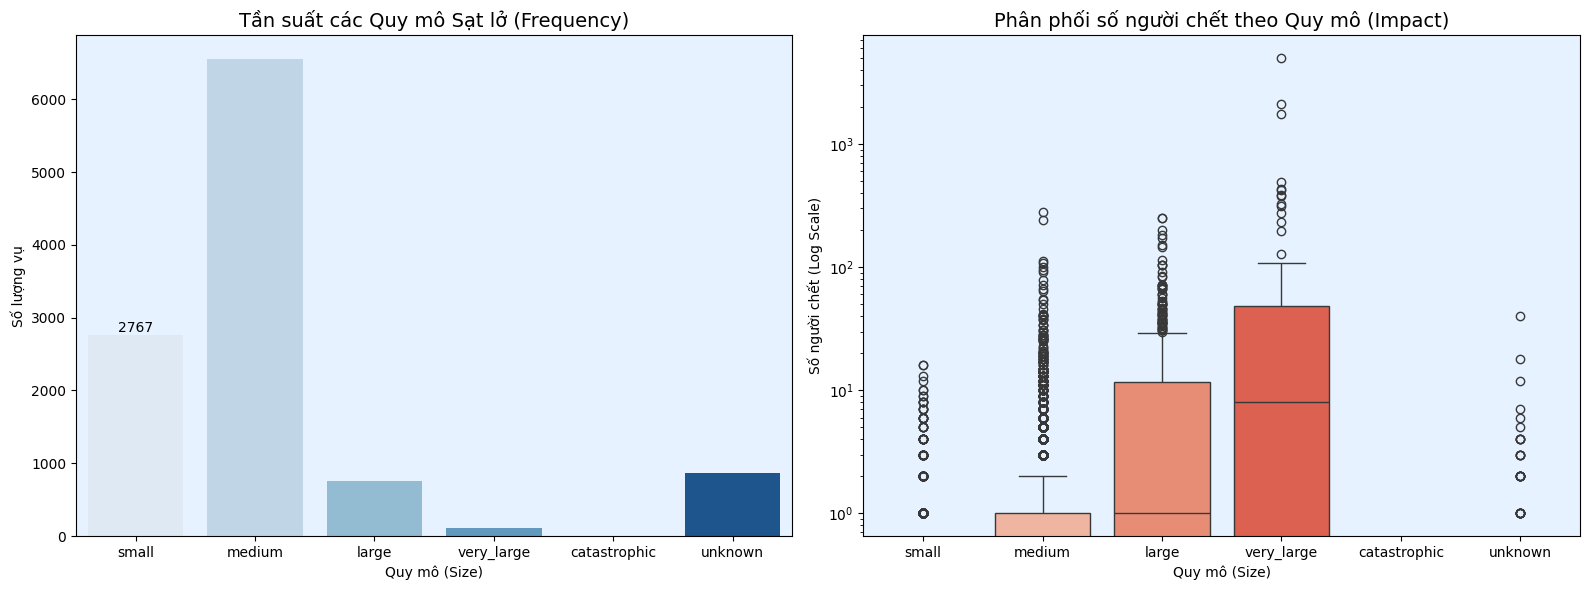

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Chuẩn bị dữ liệu và Sắp xếp thứ tự (Mapping Order)
# Định nghĩa thứ tự từ bé đến lớn
size_order = ['small', 'medium', 'large', 'very_large', 'catastrophic', 'unknown']

# Lọc dữ liệu chỉ lấy các giá trị nằm trong danh sách trên (bỏ rác nếu có)
# Chuyển về lowercase để đồng nhất
df['landslide_size'] = df['landslide_size'].astype(str).str.lower().str.strip()
df_size = df[df['landslide_size'].isin(size_order)].copy()

# 2. Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Biểu đồ 1: Tần suất xuất hiện (Count Plot) ---
sns.countplot(
    data=df_size, 
    x='landslide_size', 
    order=size_order, 
    palette='Blues', 
    ax=axes[0]
)
axes[0].set_title('Tần suất các Quy mô Sạt lở (Frequency)', fontsize=14)
axes[0].set_xlabel('Quy mô (Size)')
axes[0].set_ylabel('Số lượng vụ')
axes[0].bar_label(axes[0].containers[0]) # Hiển thị số trên cột

# --- Biểu đồ 2: Tác động đến Thương vong (Box Plot) ---
# Dùng log scale trục Y vì số người chết chênh lệch lớn
sns.boxplot(
    data=df_size, 
    x='landslide_size', 
    y='fatality_count', 
    order=size_order, 
    palette='Reds', 
    ax=axes[1]
)
axes[1].set_yscale('log') # Quan trọng: Log scale để nhìn rõ sự khác biệt
axes[1].set_title('Phân phối số người chết theo Quy mô (Impact)', fontsize=14)
axes[1].set_xlabel('Quy mô (Size)')
axes[1].set_ylabel('Số người chết (Log Scale)')

plt.tight_layout()
plt.show()

landslide_setting

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\931088712.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




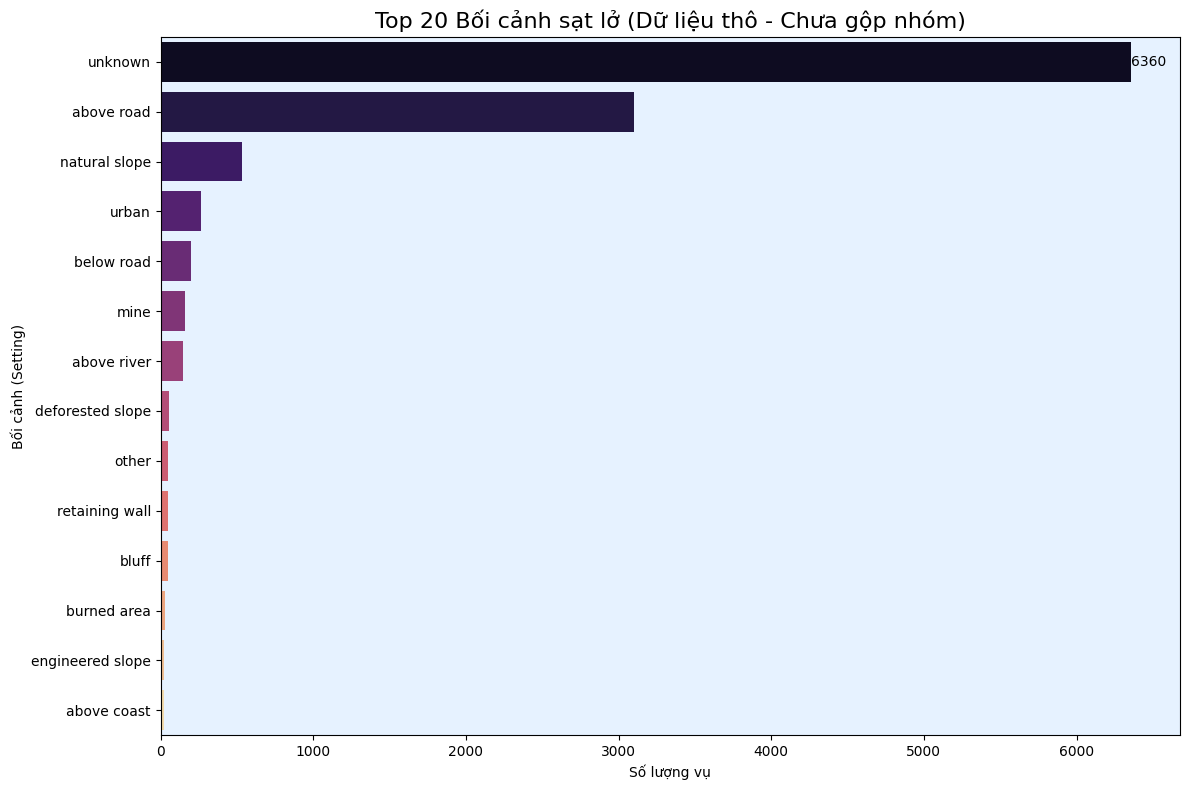

--- Danh sách Top 20 bối cảnh ---
landslide_setting_raw
unknown             6360
above road          3104
natural slope        531
urban                264
below road           199
mine                 157
above river          149
deforested slope      53
other                 50
retaining wall        48
bluff                 48
burned area           28
engineered slope      22
above coast           20
Name: count, dtype: int64


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Chuẩn bị dữ liệu thô
# Chuyển về chữ thường và xóa khoảng trắng thừa để gộp các lỗi chính tả cơ bản (như 'Mine ' và 'mine')
# Nhưng KHÔNG gộp các từ đồng nghĩa (giữ nguyên road, highway, v.v...)
df['landslide_setting_raw'] = df['landslide_setting'].astype(str).str.lower().str.strip()

# Lấy Top 20 địa điểm xảy ra nhiều nhất
top_settings_count = df['landslide_setting_raw'].value_counts().head(20)

# 2. Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    x=top_settings_count.values, 
    y=top_settings_count.index, 
    palette='magma'
)

# Trang trí
ax.set_title('Top 20 Bối cảnh sạt lở (Dữ liệu thô - Chưa gộp nhóm)', fontsize=16)
ax.set_xlabel('Số lượng vụ')
ax.set_ylabel('Bối cảnh (Setting)')
ax.bar_label(ax.containers[0]) # Hiện số trên cột

plt.tight_layout()
plt.show()

# In ra danh sách các giá trị để bạn soi kỹ hơn
print("--- Danh sách Top 20 bối cảnh ---")
print(top_settings_count)

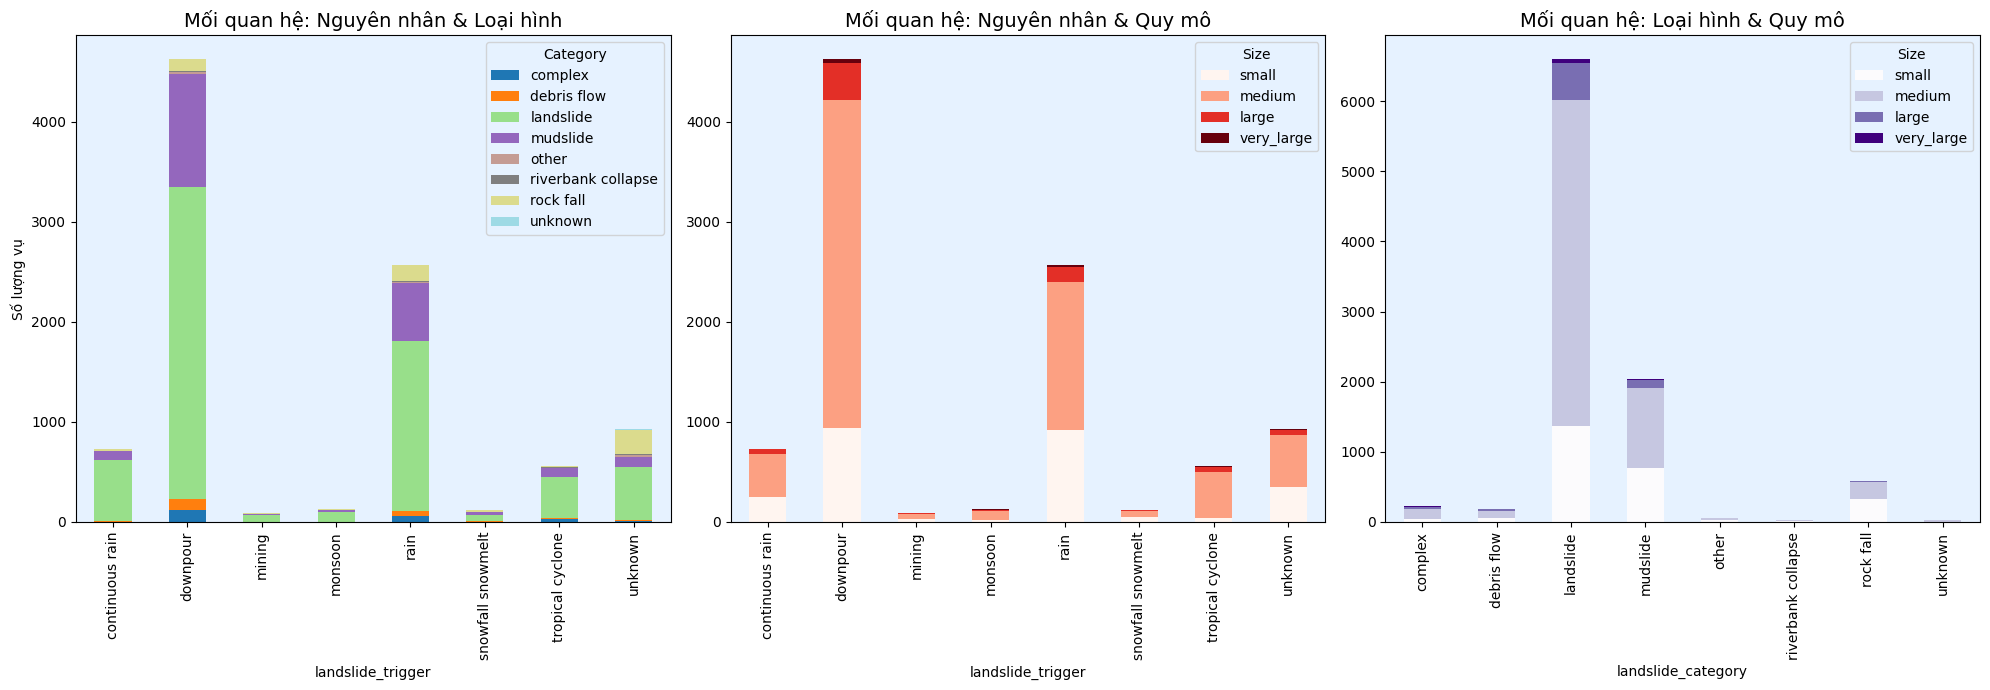

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === BƯỚC 1: CHUẨN BỊ DỮ LIỆU ===
# 1. Định nghĩa thứ tự cho Size (Quan trọng để biểu đồ có logic từ bé -> lớn)
size_order = ['small', 'medium', 'large', 'very_large']

# 2. Lọc lấy các giá trị phổ biến nhất (Top N) để biểu đồ gọn gàng
# Nếu để tất cả các loại trigger/category, biểu đồ sẽ rất rối
top_triggers = df['landslide_trigger'].value_counts().head(8).index
top_categories = df['landslide_category'].value_counts().head(8).index

# Tạo dataframe con chỉ chứa các top này
df_plot = df[
    (df['landslide_trigger'].isin(top_triggers)) & 
    (df['landslide_category'].isin(top_categories)) &
    (df['landslide_size'].isin(size_order))
].copy()

# === BƯỚC 2: VẼ BIỂU ĐỒ ===
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# --- PLOT 1: TRIGGER vs CATEGORY (Mưa gây ra loại gì?) ---
# Tạo bảng chéo
ct1 = pd.crosstab(df_plot['landslide_trigger'], df_plot['landslide_category'])
# Vẽ Stacked Bar
ct1.plot(kind='bar', stacked=True, ax=axes[0], colormap='tab20')
axes[0].set_title('Mối quan hệ: Nguyên nhân & Loại hình', fontsize=14)
axes[0].set_ylabel('Số lượng vụ')
axes[0].legend(title='Category', bbox_to_anchor=(1, 1))

# --- PLOT 2: TRIGGER vs SIZE (Nguyên nhân nào gây sạt lở to?) ---
ct2 = pd.crosstab(df_plot['landslide_trigger'], df_plot['landslide_size'])
# Sắp xếp lại các cột size theo thứ tự bé -> lớn
ct2 = ct2[size_order] 
ct2.plot(kind='bar', stacked=True, ax=axes[1], colormap='Reds')
axes[1].set_title('Mối quan hệ: Nguyên nhân & Quy mô', fontsize=14)
axes[1].legend(title='Size')

# --- PLOT 3: CATEGORY vs SIZE (Loại hình nào thường to?) ---
ct3 = pd.crosstab(df_plot['landslide_category'], df_plot['landslide_size'])
ct3 = ct3[size_order]
ct3.plot(kind='bar', stacked=True, ax=axes[2], colormap='Purples')
axes[2].set_title('Mối quan hệ: Loại hình & Quy mô', fontsize=14)
axes[2].legend(title='Size')

plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\1970268944.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\1970268944.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




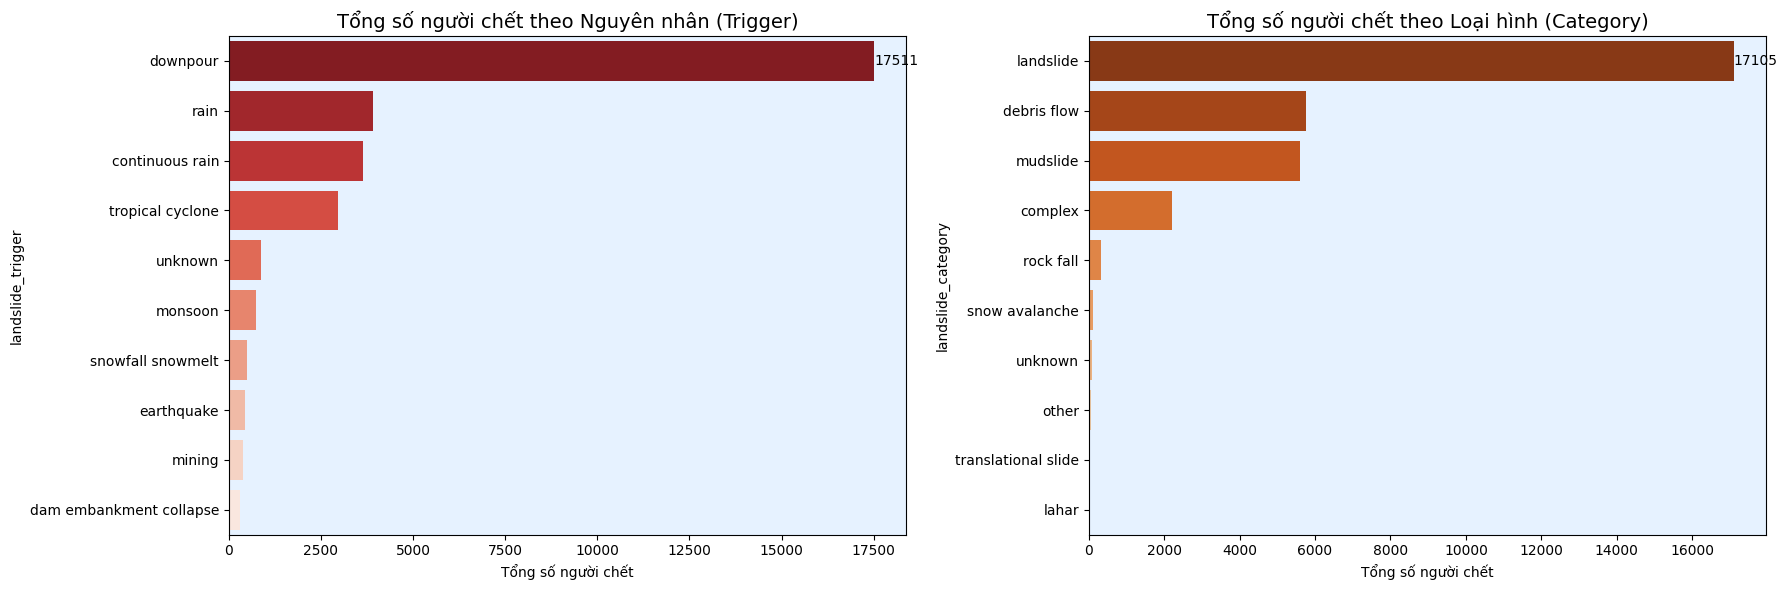

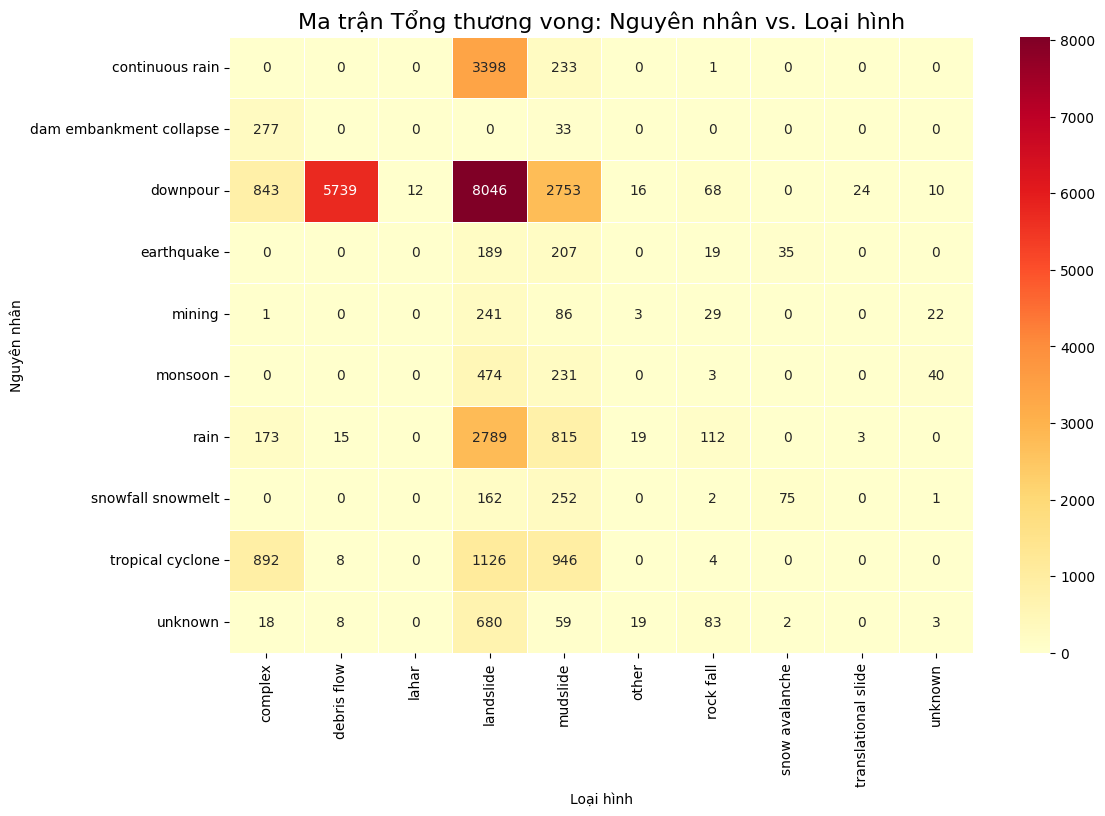

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Chuẩn bị dữ liệu
# Lấy Top 10 nguyên nhân và Top 10 loại hình phổ biến nhất để vẽ cho gọn
top_triggers = df.groupby('landslide_trigger')['fatality_count'].sum().sort_values(ascending=False).head(10).index
top_categories = df.groupby('landslide_category')['fatality_count'].sum().sort_values(ascending=False).head(10).index

# Lọc dữ liệu
df_top = df[
    (df['landslide_trigger'].isin(top_triggers)) & 
    (df['landslide_category'].isin(top_categories))
].copy()

# 2. Vẽ biểu đồ so sánh (Bar Charts)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Biểu đồ 1: Tổng số người chết theo NGUYÊN NHÂN ---
trigger_sum = df_top.groupby('landslide_trigger')['fatality_count'].sum().sort_values(ascending=False)
sns.barplot(x=trigger_sum.values, y=trigger_sum.index, palette='Reds_r', ax=axes[0])
axes[0].set_title('Tổng số người chết theo Nguyên nhân (Trigger)', fontsize=14)
axes[0].set_xlabel('Tổng số người chết')
axes[0].bar_label(axes[0].containers[0], fmt='%.0f') # Hiện số liệu

# --- Biểu đồ 2: Tổng số người chết theo LOẠI HÌNH ---
cat_sum = df_top.groupby('landslide_category')['fatality_count'].sum().sort_values(ascending=False)
sns.barplot(x=cat_sum.values, y=cat_sum.index, palette='Oranges_r', ax=axes[1])
axes[1].set_title('Tổng số người chết theo Loại hình (Category)', fontsize=14)
axes[1].set_xlabel('Tổng số người chết')
axes[1].bar_label(axes[1].containers[0], fmt='%.0f')

plt.tight_layout()
plt.show()

# --- BIỂU ĐỒ 3: MA TRẬN TỬ THẦN (HEATMAP) ---
# Trả lời câu hỏi: Sự kết hợp nào chết nhiều nhất?
pivot_fatal = df_top.pivot_table(
    index='landslide_trigger', 
    columns='landslide_category', 
    values='fatality_count', 
    aggfunc='sum', 
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_fatal, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5)
plt.title('Ma trận Tổng thương vong: Nguyên nhân vs. Loại hình', fontsize=16)
plt.ylabel('Nguyên nhân')
plt.xlabel('Loại hình')
plt.show()

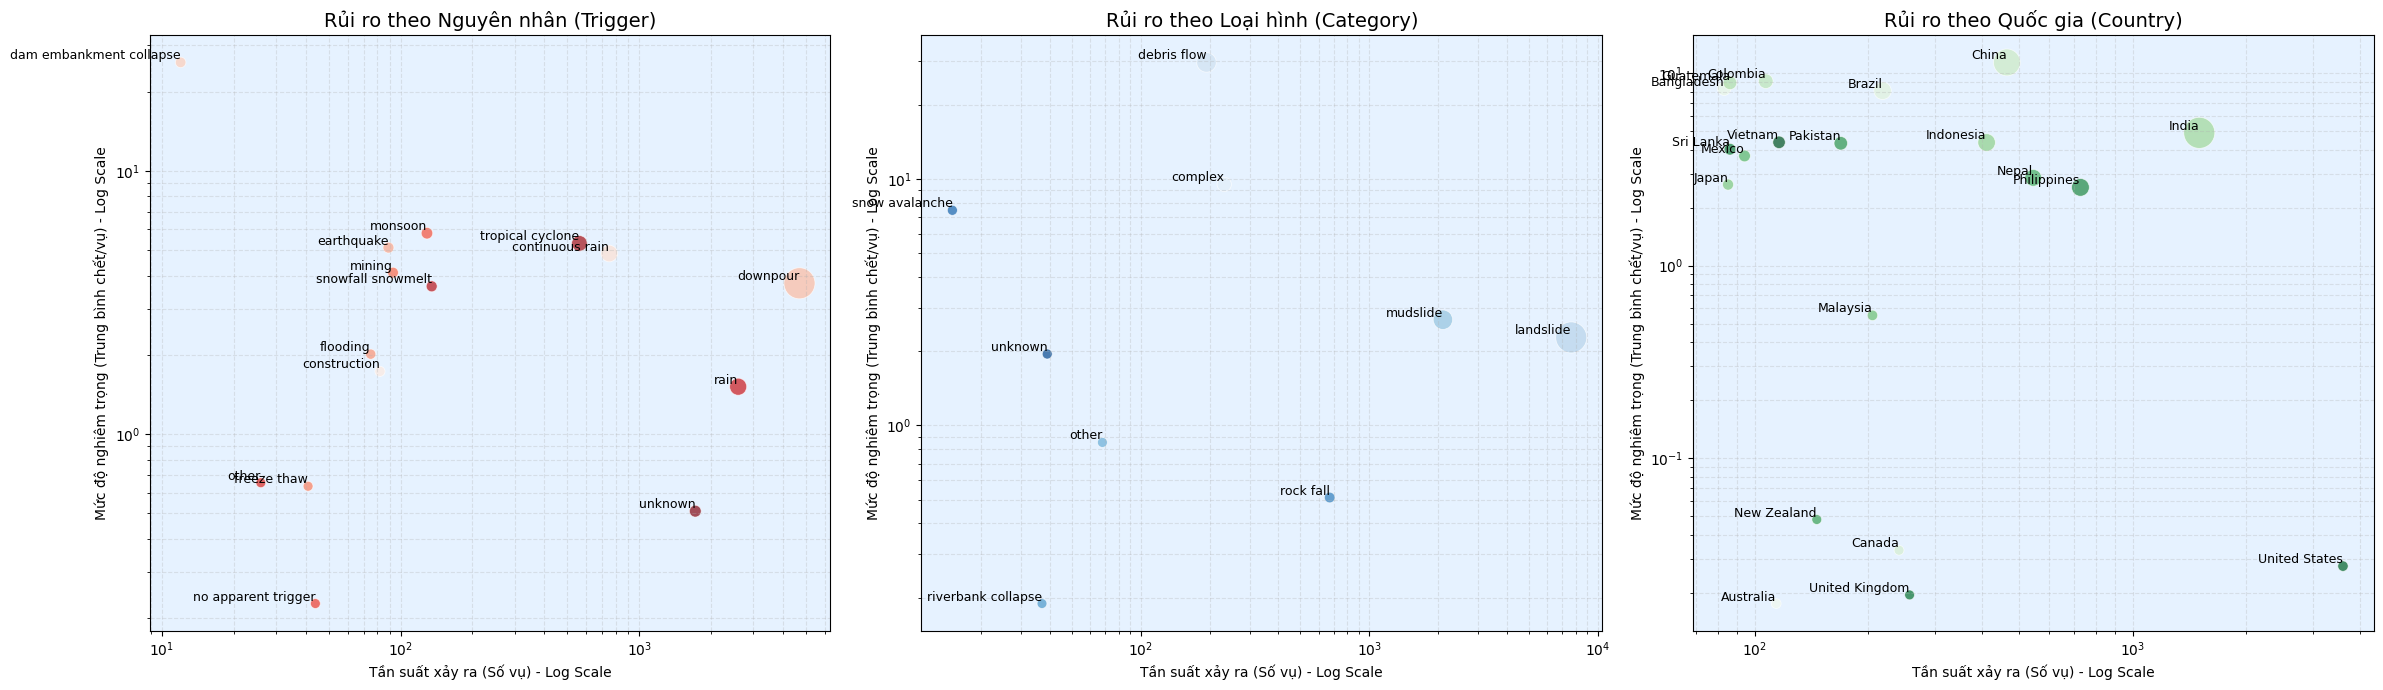

--- TOP 10 QUỐC GIA CÓ TỶ LỆ TỬ VONG TRUNG BÌNH CAO NHẤT (Trong nhóm >50 vụ) ---
              count       mean   sum
country_name                        
China           465  11.367742  5286
Colombia        107   9.074766   971
Guatemala        86   8.906977   766
Bangladesh       83   8.289157   688
Brazil          218   8.096330  1765
Taiwan           68   7.941176   540
India          1502   4.894141  7351
Vietnam         116   4.370690   507
Indonesia       411   4.360097  1792
Pakistan        169   4.319527   730


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Load Data (Giả lập hoặc load lại nếu cần, ở đây dùng biến df có sẵn trong môi trường)
# Đảm bảo fatality_count là số
df['fatality_count'] = pd.to_numeric(df['fatality_count'], errors='coerce').fillna(0)

# 2. Hàm vẽ biểu đồ "Tần suất vs. Mức độ nghiêm trọng" (Frequency vs. Severity)
def plot_risk_matrix(data, group_col, title, ax, color_palette='viridis'):
    # Tính toán thống kê
    stats = data.groupby(group_col)['fatality_count'].agg(['count', 'mean', 'sum']).reset_index()
    
    # Lọc bỏ các nhóm quá nhỏ (ví dụ < 10 vụ) để tránh nhiễu (outliers do mẫu nhỏ)
    stats = stats[stats['count'] >= 10]
    
    # Vẽ Scatter Plot
    sns.scatterplot(
        data=stats, 
        x='count', 
        y='mean', 
        size='sum',            # Kích thước chấm = Tổng số người chết
        sizes=(50, 500),       # Kích thước tối thiểu - tối đa
        hue=group_col,         # Màu sắc phân biệt
        palette=color_palette,
        legend=False,          # Tắt legend màu để đỡ rối, sẽ label trực tiếp
        alpha=0.7,
        ax=ax
    )
    
    # Gắn nhãn tên (Labeling) cho các điểm
    for i in range(stats.shape[0]):
        ax.text(
            stats.iloc[i]['count'], 
            stats.iloc[i]['mean'], 
            stats.iloc[i][group_col], 
            fontsize=9, 
            ha='right', 
            va='bottom'
        )
        
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Tần suất xảy ra (Số vụ) - Log Scale')
    ax.set_ylabel('Mức độ nghiêm trọng (Trung bình chết/vụ) - Log Scale')
    
    # Dùng Log Scale vì dữ liệu chênh lệch rất lớn
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, which="both", ls="--", alpha=0.3)

# 3. Vẽ 3 biểu đồ: Trigger, Category, Country
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# Plot 1: Trigger (Nguyên nhân)
# Lấy các trigger chính
top_triggers = df['landslide_trigger'].value_counts().head(15).index
df_trigger = df[df['landslide_trigger'].isin(top_triggers)]
plot_risk_matrix(df_trigger, 'landslide_trigger', 'Rủi ro theo Nguyên nhân (Trigger)', axes[0], 'Reds')

# Plot 2: Category (Loại hình)
top_cats = df['landslide_category'].value_counts().head(10).index
df_cat = df[df['landslide_category'].isin(top_cats)]
plot_risk_matrix(df_cat, 'landslide_category', 'Rủi ro theo Loại hình (Category)', axes[1], 'Blues')

# Plot 3: Country (Quốc gia - Insight đặc biệt)
# Lấy Top 20 quốc gia nhiều vụ nhất để so sánh
top_countries = df['country_name'].value_counts().head(20).index
df_country = df[df['country_name'].isin(top_countries)]
plot_risk_matrix(df_country, 'country_name', 'Rủi ro theo Quốc gia (Country)', axes[2], 'Greens')

plt.tight_layout()
plt.show()

# 4. In ra bảng số liệu chi tiết cho Quốc gia (Để thấy rõ Rate)
print("--- TOP 10 QUỐC GIA CÓ TỶ LỆ TỬ VONG TRUNG BÌNH CAO NHẤT (Trong nhóm >50 vụ) ---")
country_stats = df.groupby('country_name')['fatality_count'].agg(['count', 'mean', 'sum'])
# Lọc các nước có ít nhất 50 vụ để đảm bảo ý nghĩa thống kê
country_stats = country_stats[country_stats['count'] >= 50].sort_values('mean', ascending=False)
print(country_stats.head(10))

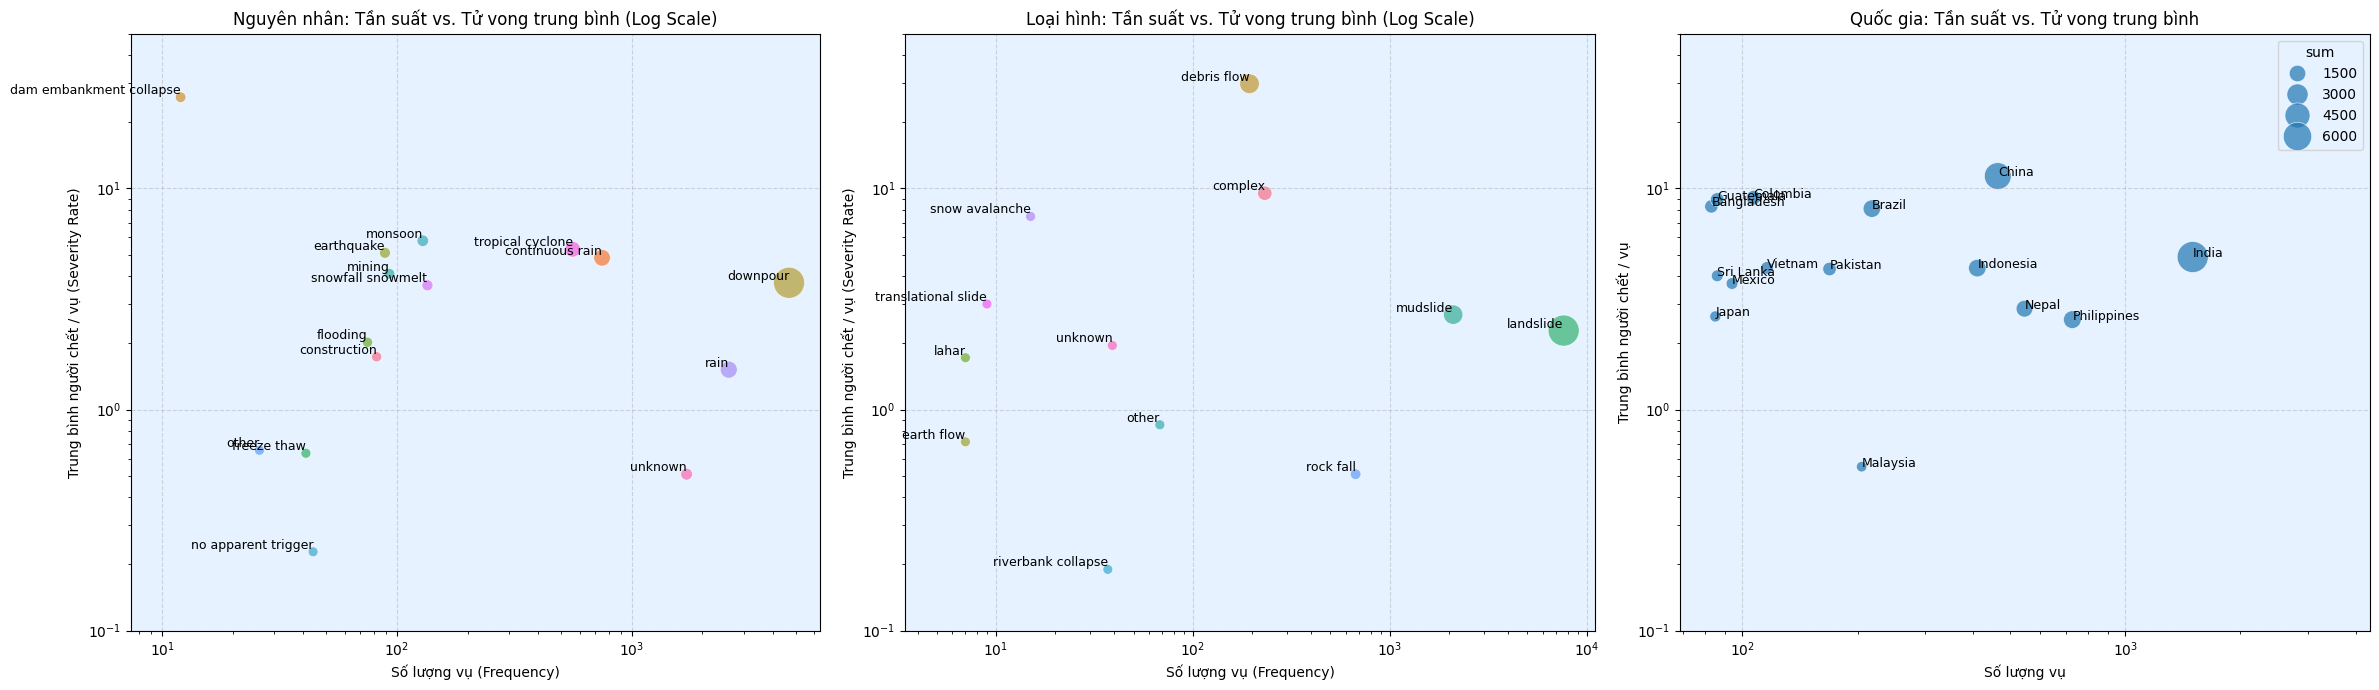

--- TOP 5 NGUYÊN NHÂN CÓ TỶ LỆ TỬ VONG TRUNG BÌNH CAO NHẤT (trên mỗi vụ) ---
          landslide_trigger  count       mean
2   dam embankment collapse     12  25.833333
9                   monsoon    129   5.798450
14         tropical cyclone    561   5.304813
4                earthquake     89   5.112360
1           continuous rain    748   4.855615

--- TOP 5 QUỐC GIA CÓ TỶ LỆ TỬ VONG TRUNG BÌNH CAO NHẤT (Trong nhóm nhiều vụ) ---
  country_name       mean  count
4        China  11.367742    465
5     Colombia   9.074766    107
6    Guatemala   8.906977     86
1   Bangladesh   8.289157     83
2       Brazil   8.096330    218


In [59]:
# === PHÂN TÍCH: TẦN SUẤT vs. MỨC ĐỘ NGHIÊM TRỌNG (FREQUENCY vs. SEVERITY) ===
def analyze_severity(group_col, title_prefix, ax):
    # 1. Tính toán thống kê
    stats = df.groupby(group_col)['fatality_count'].agg(['count', 'mean', 'sum', 'max']).reset_index()
    
    # Lọc bỏ các nhóm quá nhỏ (ít hơn 5 vụ) để tránh nhiễu
    stats = stats[stats['count'] >= 5]
    
    # 2. Vẽ Scatter Plot
    sns.scatterplot(
        data=stats,
        x='count',
        y='mean',
        size='sum',
        sizes=(50, 500),
        alpha=0.7,
        hue=group_col,
        legend=False,
        ax=ax
    )
    
    # Thêm nhãn cho các điểm
    # Chỉ thêm nhãn cho các điểm nằm trong giới hạn trục Y mới
    y_min, y_max = 0.1, 50 
    for i in range(stats.shape[0]):
        # Chỉ vẽ nhãn nếu điểm nằm trong khung hình (trục Y)
        if stats.iloc[i]['mean'] <= y_max and stats.iloc[i]['mean'] >= y_min:
            ax.text(
                stats.iloc[i]['count'], 
                stats.iloc[i]['mean'], 
                stats.iloc[i][group_col], 
                fontsize=9, 
                ha='right', 
                va='bottom'
            )
        
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f'{title_prefix}: Tần suất vs. Tử vong trung bình (Log Scale)', fontsize=12)
    ax.set_xlabel('Số lượng vụ (Frequency)')
    ax.set_ylabel('Trung bình người chết / vụ (Severity Rate)')
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # ÁP DỤNG FIX: Giới hạn trục Y ở mức 0.1 đến 50 người chết trung bình/vụ
    ax.set_ylim(y_min, y_max)

# Vẽ 3 biểu đồ: Trigger, Category, Country
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

analyze_severity('landslide_trigger', 'Nguyên nhân', axes[0])
analyze_severity('landslide_category', 'Loại hình', axes[1])

# Với Country, chỉ lấy Top 20 nước có nhiều vụ nhất để biểu đồ đỡ rối
top_countries = df['country_name'].value_counts().head(20).index
df_country_top = df[df['country_name'].isin(top_countries)]

# Tính toán stats_country và vẽ biểu đồ
stats_country = df_country_top.groupby('country_name')['fatality_count'].agg(['count', 'mean', 'sum']).reset_index()
sns.scatterplot(data=stats_country, x='count', y='mean', size='sum', sizes=(50, 500), alpha=0.7, ax=axes[2])

# Giới hạn trục Y cho Country
y_min_c, y_max_c = 0.1, 50 
for i in range(stats_country.shape[0]):
    if stats_country.iloc[i]['mean'] <= y_max_c and stats_country.iloc[i]['mean'] >= y_min_c:
        axes[2].text(stats_country.iloc[i]['count'], stats_country.iloc[i]['mean'], stats_country.iloc[i]['country_name'], fontsize=9)

axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].set_title('Quốc gia: Tần suất vs. Tử vong trung bình', fontsize=12)
axes[2].set_xlabel('Số lượng vụ')
axes[2].set_ylabel('Trung bình người chết / vụ')
axes[2].grid(True, linestyle='--', alpha=0.5)
axes[2].set_ylim(y_min_c, y_max_c) # ÁP DỤNG FIX cho country

plt.tight_layout()
plt.savefig('fatality_rate_analysis_fixed.png') # Đổi tên file để tránh nhầm lẫn
plt.show()

# In bảng thống kê "Top Deadliest Rates" (Top tỷ lệ tử vong cao nhất)
print("--- TOP 5 NGUYÊN NHÂN CÓ TỶ LỆ TỬ VONG TRUNG BÌNH CAO NHẤT (trên mỗi vụ) ---")
# Lọc bỏ các nhóm nhỏ (<5 vụ) khỏi bảng này để thống kê có ý nghĩa
stats_trigger_all = df.groupby('landslide_trigger')['fatality_count'].agg(['count', 'mean']).reset_index()
stats_trigger_filtered = stats_trigger_all[stats_trigger_all['count'] >= 5]
print(stats_trigger_filtered.sort_values('mean', ascending=False).head(5))

print("\n--- TOP 5 QUỐC GIA CÓ TỶ LỆ TỬ VONG TRUNG BÌNH CAO NHẤT (Trong nhóm nhiều vụ) ---")
print(stats_country.sort_values('mean', ascending=False)[['country_name', 'mean', 'count']].head(5))

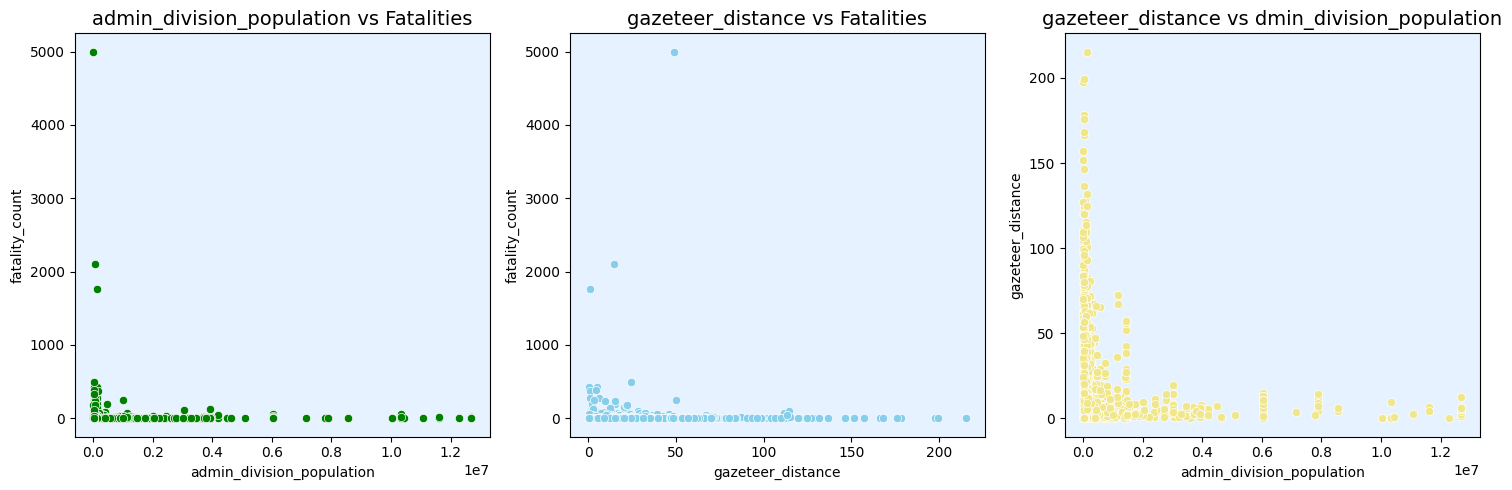

In [60]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(y='fatality_count', x='admin_division_population', data=df, color='green')
plt.title("admin_division_population vs Fatalities", fontdict={"fontsize":14})


plt.subplot(1,3,2)
sns.scatterplot(x='gazeteer_distance', y='fatality_count', data=df, color='skyblue')
plt.title("gazeteer_distance vs Fatalities", fontdict={"fontsize":14})


plt.subplot(1,3,3)
sns.scatterplot(y='gazeteer_distance', x='admin_division_population', data=df, color='khaki')
plt.title("gazeteer_distance vs dmin_division_population", fontdict={"fontsize":14})

plt.tight_layout()
plt.show()

## Question Formation

### 1. Có tồn tại sự khác biệt địa lý giữa những nơi xảy ra sạt lở thường xuyên (High Frequency) và những nơi có sạt lở gây chết người nhiều nhất (High Fatality Rate) hay không? Các yếu tố như mật độ dân số (admin_division_population) và loại hình sạt lở (category) đóng vai trò như thế nào trong nghịch lý này?

- Tại sao phải nghiên cứu: Dữ liệu sơ bộ cho thấy Mỹ có rất nhiều vụ sạt lở nhưng ít người chết, trong khi Philippines/Nepal ít vụ hơn nhưng thương vong rất cao. Cần lượng hóa điều này thay vì chỉ cảm nhận.
- Lợi ích: Giúp xác định đâu là "Điểm nóng rủi ro thực sự" (Real Risk Hotspots). Một nơi hay bị sạt lở nhỏ không đáng sợ bằng nơi hiếm khi bị nhưng bị là thảm họa. Nơi nào có khả năng xảy ra thảm họa cao hơn mới cần ưu tiên cảnh báo và cứu trợ.
- Đối tượng quan tâm: Các tổ chức viện trợ nhân đạo (UN, Red Cross) để phân bổ ngân sách: đầu tư vào cảnh báo sớm cho vùng tần suất cao hay cứu hộ thảm họa cho vùng thương vong cao.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\384331152.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\384331152.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




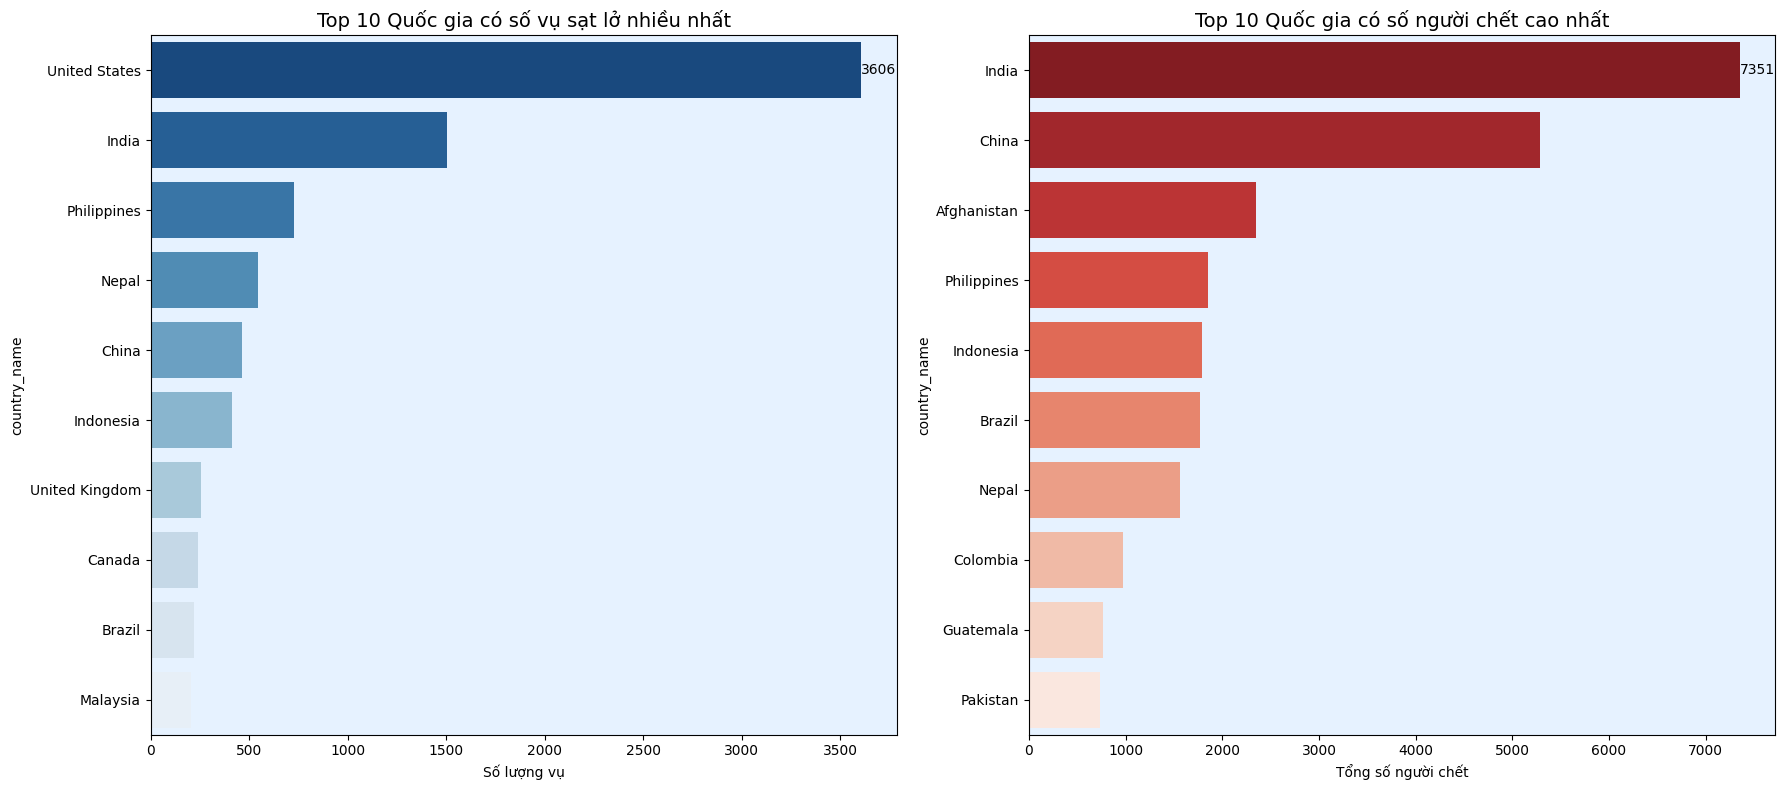

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Chuẩn bị dữ liệu
# Chuẩn hóa tên quốc gia (đề phòng viết hoa/thường lộn xộn)
df['country_name'] = df['country_name'].astype(str).str.lower().str.strip().str.title()

# Loại bỏ 'Unknown' nếu có
df_country = df[df['country_name'] != 'Unknown'].copy()

# 2. Tính toán thống kê
# Top 10 nước nhiều vụ nhất
top_freq = df_country['country_name'].value_counts().head(10)

# Top 10 nước nhiều người chết nhất
top_fatal = df_country.groupby('country_name')['fatality_count'].sum().sort_values(ascending=False).head(10)

# 3. Vẽ biểu đồ so sánh (Side-by-Side)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# --- Biểu đồ 1: Tần suất (Số lượng vụ) ---
sns.barplot(x=top_freq.values, y=top_freq.index, palette='Blues_r', ax=axes[0])
axes[0].set_title('Top 10 Quốc gia có số vụ sạt lở nhiều nhất', fontsize=14)
axes[0].set_xlabel('Số lượng vụ')
axes[0].bar_label(axes[0].containers[0])

# --- Biểu đồ 2: Hậu quả (Số người chết) ---
sns.barplot(x=top_fatal.values, y=top_fatal.index, palette='Reds_r', ax=axes[1])
axes[1].set_title('Top 10 Quốc gia có số người chết cao nhất', fontsize=14)
axes[1].set_xlabel('Tổng số người chết')
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

In [130]:
import plotly.express as px

# === BƯỚC 2: TÁC ĐỘNG CỦA MẬT ĐỘ DÂN SỐ ===

# 1. Lọc dữ liệu: Chỉ lấy vụ có người chết và có thông tin dân số
df_pop = df[
    (df['fatality_count'] > 0) & 
    (df['admin_division_population'] > 0)
].copy()

# 2. Vẽ biểu đồ Scatter tương tác
fig = px.scatter(
    df_pop,
    x="admin_division_population",
    y="fatality_count",
    color="landslide_size",       # Tô màu theo quy mô để thấy thêm góc nhìn
    log_x=True,                   # Dùng Log scale cho dân số
    log_y=True,                   # Dùng Log scale cho người chết
    trendline="ols",              # Vẽ đường xu hướng (Ordinary Least Squares)
    hover_name="event_title",
    hover_data=["country_name", "landslide_category"],
    title="Tương quan: Dân số khu vực vs. Số người chết (Log Scale)",
    labels={
        "admin_division_population": "Dân số (Log)",
        "fatality_count": "Số người chết (Log)"
    }
)
fig.show()

(admin_division_population) không phải là yếu tố tiên quyết dẫn đến thương vong cao. Thực tế cho thấy, các thảm họa lớn thường tập trung ở các vùng nông thôn/miền núi (dân số thấp nhưng dễ bị tổn thương) hơn là các đô thị lớn (dân số cao nhưng hạ tầng tốt). Điều này gợi ý rằng công tác cứu trợ nên tập trung vào khả năng chống chịu (resilience) của cộng đồng hơn là chỉ nhìn vào mật độ dân số."

--- BIỂU ĐỒ 1: RỦI RO CÁC NGUYÊN NHÂN PHỔ BIẾN ---


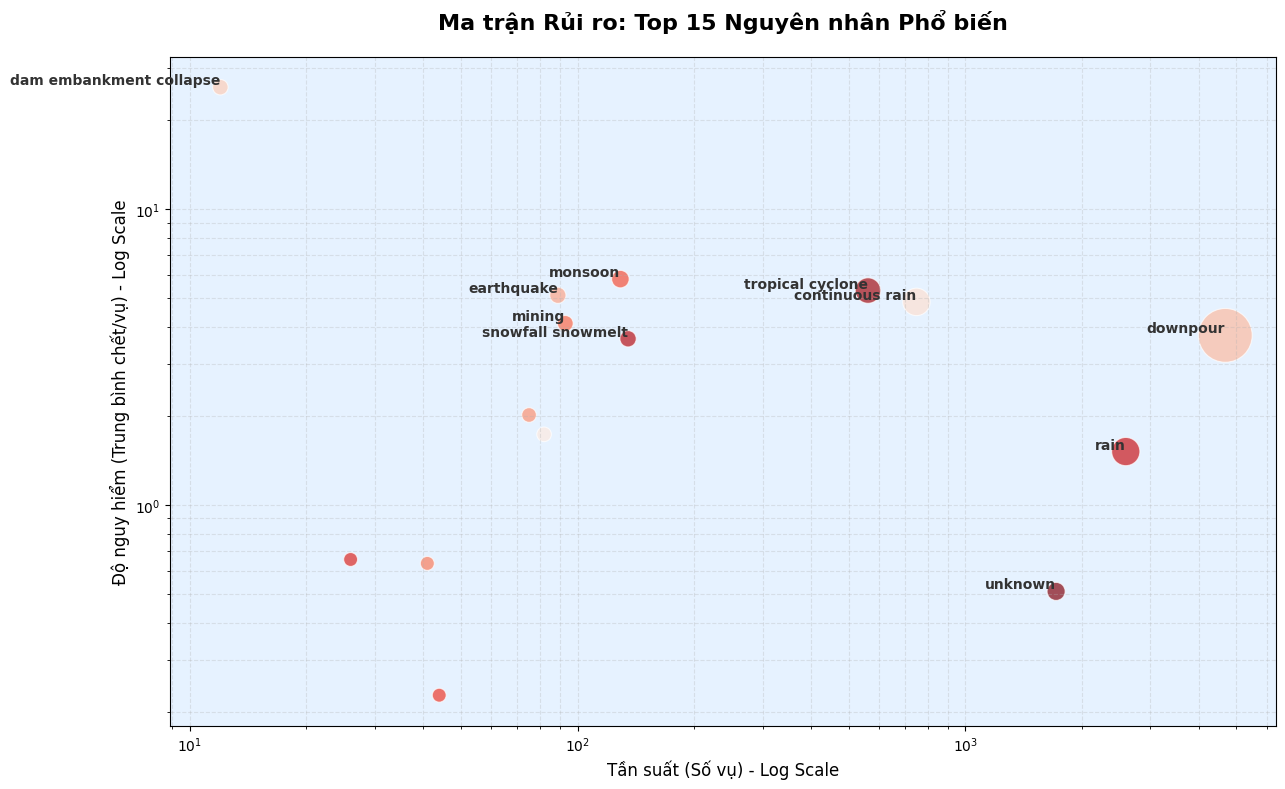


--- BIỂU ĐỒ 2: RỦI RO CÁC LOẠI HÌNH PHỔ BIẾN ---


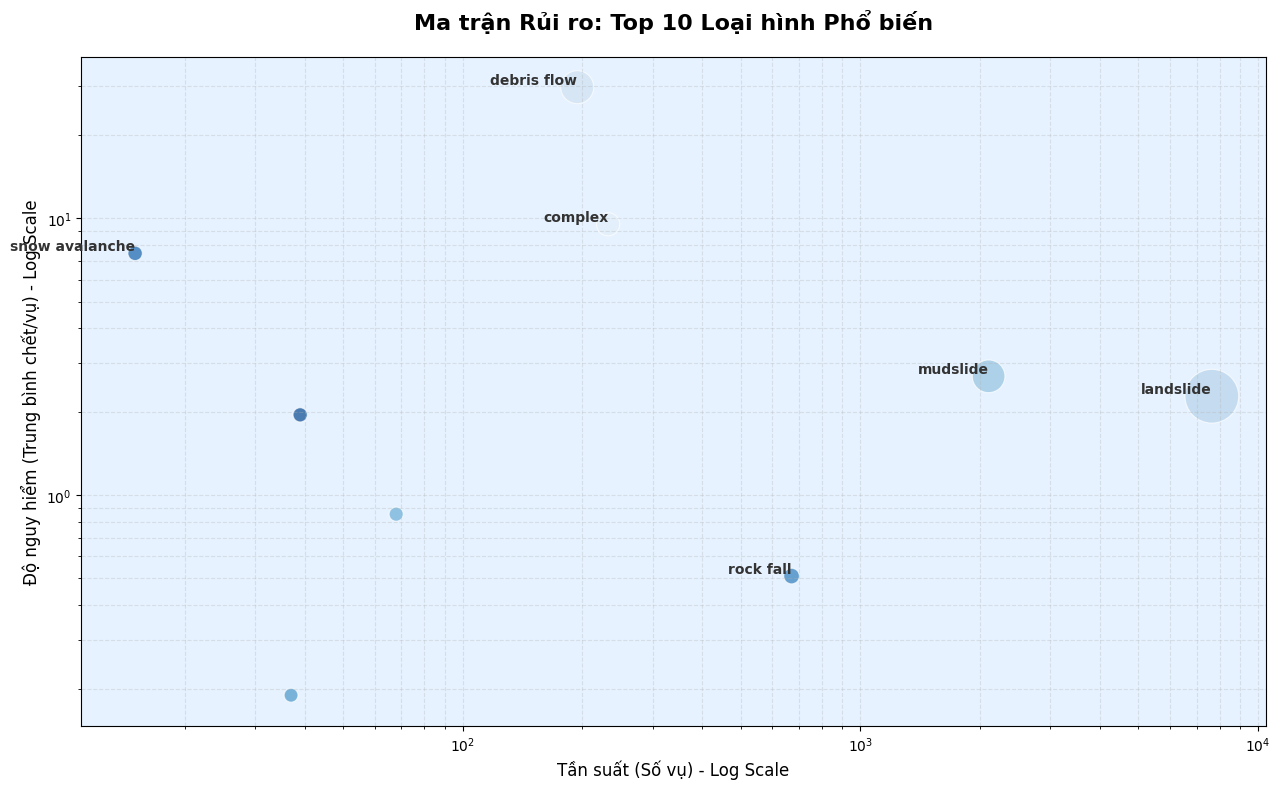


--- BIỂU ĐỒ 3: RỦI RO CÁC QUỐC GIA NHIỀU SẠT LỞ NHẤT ---


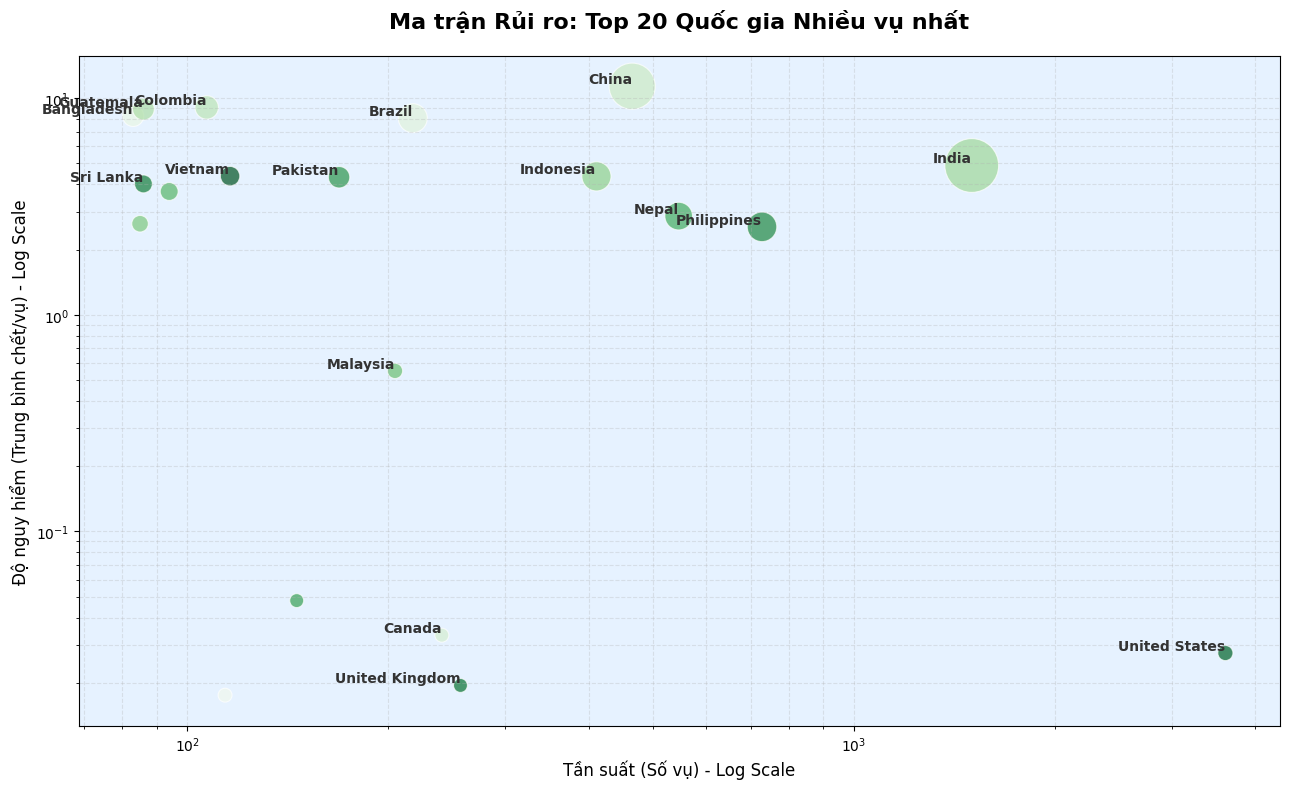


TOP 10 QUỐC GIA CÓ TỶ LỆ TỬ VONG TRUNG BÌNH CAO NHẤT (Trong nhóm >50 vụ)
              Số lượng vụ  Trung bình chết/vụ  Tổng số chết
country_name                                               
China                 465           11.367742          5286
Colombia              107            9.074766           971
Guatemala              86            8.906977           766
Bangladesh             83            8.289157           688
Brazil                218            8.096330          1765
Taiwan                 68            7.941176           540
India                1502            4.894141          7351
Vietnam               116            4.370690           507
Indonesia             411            4.360097          1792
Pakistan              169            4.319527           730


In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. CHUẨN BỊ DỮ LIỆU
# Chuyển đổi cột số người chết, đảm bảo không lỗi
if 'fatality_count' in df.columns:
    df['fatality_count'] = pd.to_numeric(df['fatality_count'], errors='coerce').fillna(0)

# 2. HÀM VẼ BIỂU ĐỒ SCATTER (RISK MATRIX)
def plot_risk_matrix(data, group_col, title, color_palette='viridis'):
    # Tạo Figure riêng cho mỗi biểu đồ
    plt.figure(figsize=(13, 8)) 
    ax = plt.gca()
    
    # Tính toán thống kê: Tần suất (count), Trung bình chết/vụ (mean), Tổng chết (sum)
    stats = data.groupby(group_col)['fatality_count'].agg(['count', 'mean', 'sum']).reset_index()
    
    # LỌC QUAN TRỌNG: Chỉ giữ lại các nhóm có ít nhất 10 vụ để đảm bảo ý nghĩa thống kê
    # (Tránh trường hợp 1 vụ chết 1 người -> Tỷ lệ cao ảo)
    stats = stats[stats['count'] >= 10]
    
    # Vẽ Scatter Plot
    sns.scatterplot(
        data=stats, 
        x='count', 
        y='mean', 
        size='sum',            # Kích thước bóng = Tổng thương vong
        sizes=(100, 1500),     # Bóng to rõ ràng
        hue=group_col,         
        palette=color_palette,
        legend=False,          # Tắt legend màu
        alpha=0.7,             # Độ trong suốt
        ax=ax
    )
    
    # Gắn nhãn (Labeling) thông minh
    for i in range(stats.shape[0]):
        # Chỉ gắn nhãn nếu nhóm đó nổi bật (Nhiều vụ HOẶC Chết nhiều)
        # để biểu đồ không bị rối mắt
        if (stats.iloc[i]['count'] > stats['count'].median()) or (stats.iloc[i]['mean'] > stats['mean'].median()):
            ax.text(
                stats.iloc[i]['count'], 
                stats.iloc[i]['mean'], 
                stats.iloc[i][group_col], 
                fontsize=10, 
                ha='right', 
                va='bottom',
                fontweight='bold',
                color='#333333'
            )
        
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Tần suất (Số vụ) - Log Scale', fontsize=12)
    ax.set_ylabel('Độ nguy hiểm (Trung bình chết/vụ) - Log Scale', fontsize=12)
    
    # Dùng Log Scale cho cả 2 trục vì dữ liệu chênh lệch rất lớn
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, which="both", ls="--", alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 3. THỰC HIỆN VẼ 3 BIỂU ĐỒ (Lọc lấy Top Phổ biến nhất)

# --- Biểu đồ 1: Trigger (Top 15 Nguyên nhân phổ biến nhất) ---
print("--- BIỂU ĐỒ 1: RỦI RO CÁC NGUYÊN NHÂN PHỔ BIẾN ---")
top_triggers = df['landslide_trigger'].value_counts().head(15).index
df_trigger = df[df['landslide_trigger'].isin(top_triggers)]
plot_risk_matrix(df_trigger, 'landslide_trigger', 'Ma trận Rủi ro: Top 15 Nguyên nhân Phổ biến', 'Reds')

# --- Biểu đồ 2: Category (Top 10 Loại hình phổ biến nhất) ---
print("\n--- BIỂU ĐỒ 2: RỦI RO CÁC LOẠI HÌNH PHỔ BIẾN ---")
top_cats = df['landslide_category'].value_counts().head(10).index
df_cat = df[df['landslide_category'].isin(top_cats)]
plot_risk_matrix(df_cat, 'landslide_category', 'Ma trận Rủi ro: Top 10 Loại hình Phổ biến', 'Blues')

# --- Biểu đồ 3: Country (Top 20 Quốc gia nhiều vụ nhất) ---
print("\n--- BIỂU ĐỒ 3: RỦI RO CÁC QUỐC GIA NHIỀU SẠT LỞ NHẤT ---")
# Lưu ý: Ở đây ta lấy Top theo SỐ LƯỢNG VỤ (Frequency), không phải số người chết
top_countries = df['country_name'].value_counts().head(20).index
df_country = df[df['country_name'].isin(top_countries)]
plot_risk_matrix(df_country, 'country_name', 'Ma trận Rủi ro: Top 20 Quốc gia Nhiều vụ nhất', 'Greens')

# 4. IN BẢNG THỐNG KÊ "TOP TỬ THẦN"
# (Chỉ xét các nước đã xảy ra >= 50 vụ để đảm bảo độ tin cậy)
print("\n" + "="*80)
print("TOP 10 QUỐC GIA CÓ TỶ LỆ TỬ VONG TRUNG BÌNH CAO NHẤT (Trong nhóm >50 vụ)")
print("="*80)

country_stats = df.groupby('country_name')['fatality_count'].agg(['count', 'mean', 'sum'])
deadliest_reliable = country_stats[country_stats['count'] >= 50].sort_values('mean', ascending=False)

# In và đổi tên cột cho đẹp
print(deadliest_reliable.head(10).rename(columns={
    'count': 'Số lượng vụ', 
    'mean': 'Trung bình chết/vụ', 
    'sum': 'Tổng số chết'
}))

-  RẤT HIẾM NHƯNG RẤT NGUY HIỂM: debris flow. Là kẻ giết người số 1 trong các loại sạt lở. Tốc độ cực nhanh (có thể lên tới 60 km/h), mang theo đá, bùn, cây cối, phá hủy mọi thứ trên đường đi. Khó tránh, khó sống sót. Một vụ có thể giết hàng chục đến hàng trăm người.
-  complex (sạt lở phức hợp): ết hợp nhiều loại sạt lở (ví dụ: rock fall chuyển thành debris flow). Quy mô lớn, diễn biến phức tạp, khó dự báo. Thường xảy ra sau động đất mạnh hoặc mưa cực lớn kéo dài.
- landslide PHỔ BIẾN NHẤT NHƯNG ÍT CHẾT NHẤT: Chiếm đa số các vụ sạt lở. Thường là khối đất/đá trượt trên bề mặt nghiêng, tốc độ chậm, có thể quan sát được dấu hiệu trước (nứt đất, nghiêng cây). Tỷ lệ sống sót cao nếu phát hiện sớm.

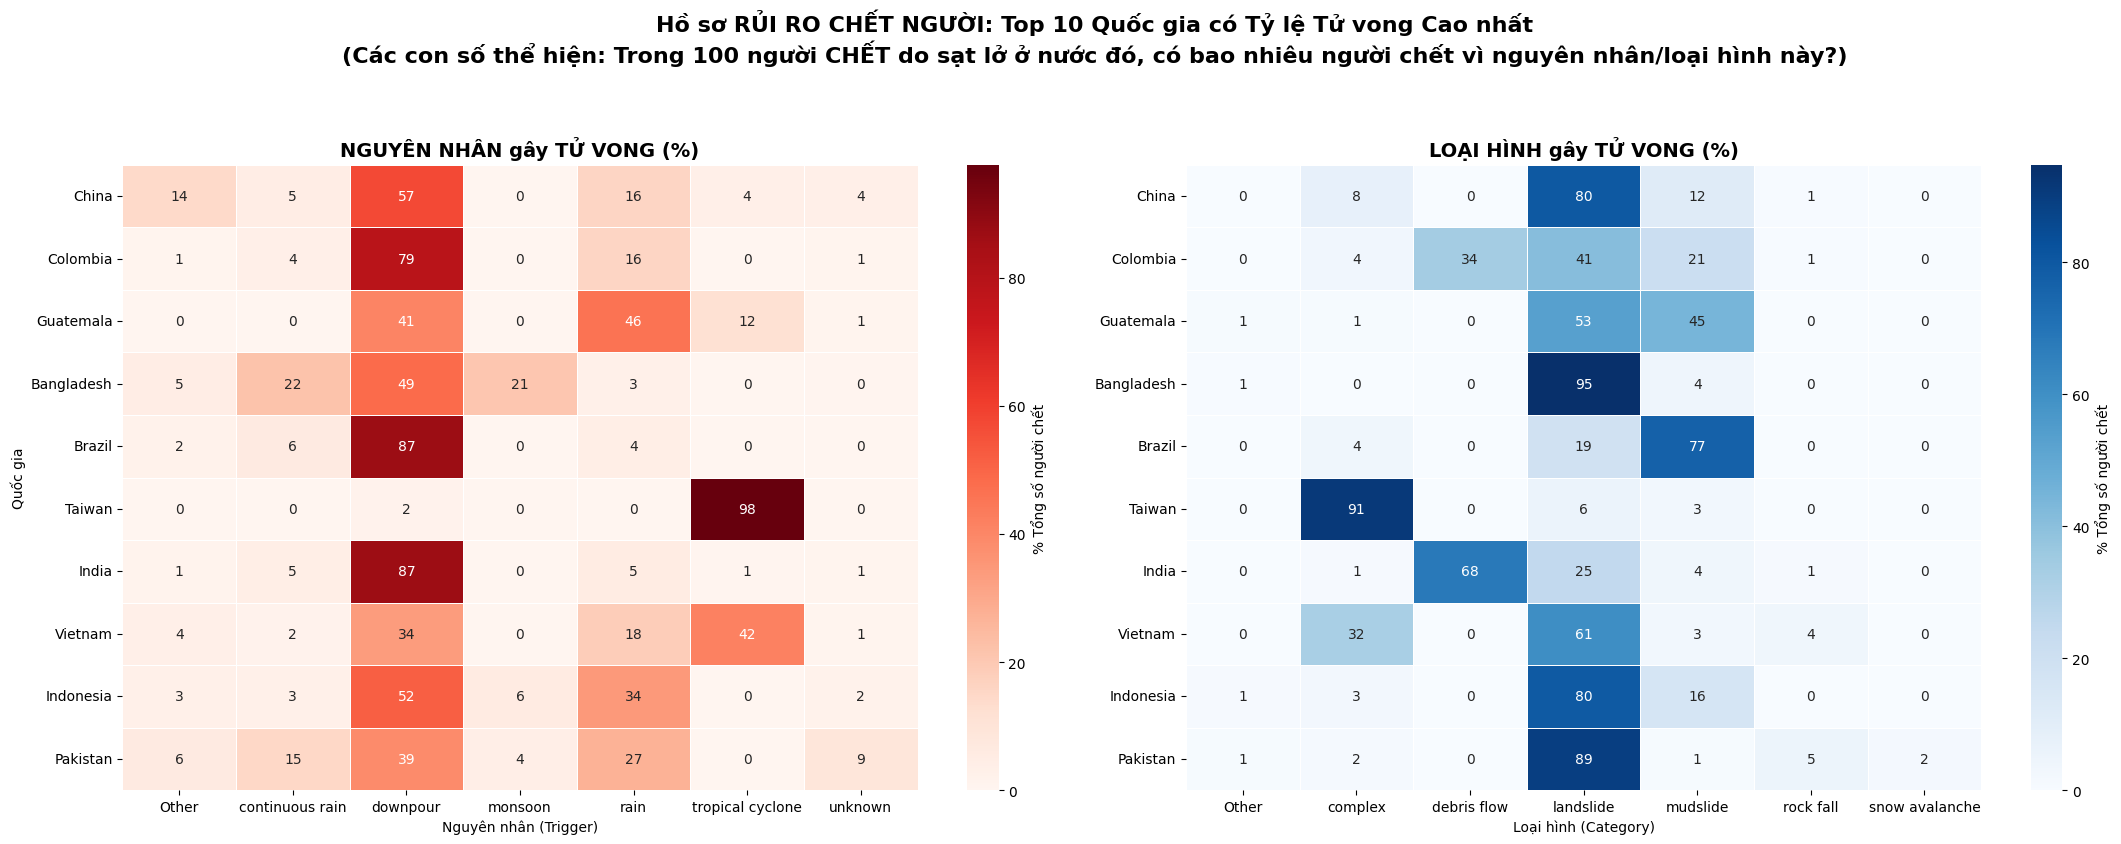

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. TÁI TẠO DANH SÁCH TOP 10 QUỐC GIA "TỬ THẦN"
# (Lấy những nước có > 50 vụ và tỷ lệ chết TB cao nhất)
stats = df.groupby('country_name')['fatality_count'].agg(['count', 'mean'])
deadliest_list = stats[stats['count'] >= 50].sort_values('mean', ascending=False).head(10).index.tolist()

# Lọc dữ liệu chỉ lấy 10 nước này
df_top = df[df['country_name'].isin(deadliest_list)].copy()

# 2. HÀM CHUẨN BỊ DỮ LIỆU CHO HEATMAP
def get_fatality_proportion(data, col_name, top_n=6):
    """
    Tính % tổng số người chết (fatality) theo từng loại, cho mỗi quốc gia
    (Thay vì % số vụ)
    """
    # Tạo bản sao để không ảnh hưởng data gốc
    data_copy = data.copy()
    
    # 1. TÍNH TỔNG SỐ CHẾT THEO TỪNG LOẠI TRONG MỖI QUỐC GIA
    fatality_by_type = data_copy.groupby(['country_name', col_name])['fatality_count'].sum().reset_index()
    
    # 2. TÍNH TỔNG SỐ CHẾT CỦA MỖI QUỐC GIA
    total_by_country = fatality_by_type.groupby('country_name')['fatality_count'].sum().reset_index()
    total_by_country = total_by_country.rename(columns={'fatality_count': 'total_fatalities'})
    
    # 3. GỘP DỮ LIỆU & TÍNH TỶ LỆ %
    merged = pd.merge(fatality_by_type, total_by_country, on='country_name')
    merged['percentage'] = (merged['fatality_count'] / merged['total_fatalities']) * 100
    
    # 4. CHỌN TOP N LOẠI GÂY CHẾT NHIỀU NHẤT (toàn cầu)
    # (Để đảm bảo debris flow được giữ lại)
    top_items_global = data_copy.groupby(col_name)['fatality_count'].sum().nlargest(top_n).index.tolist()
    
    # 5. GỘP CÁC LOẠI KHÁC THÀNH "Other"
    merged[col_name] = merged[col_name].apply(lambda x: x if x in top_items_global else 'Other')
    
    # 6. TỔNG HỢP LẠI SAU KHI GỘP "Other"
    final = merged.groupby(['country_name', col_name])['percentage'].sum().reset_index()
    
    # 7. CHUYỂN THÀNH MA TRẬN HEATMAP
    heatmap_data = final.pivot(index='country_name', columns=col_name, values='percentage').fillna(0)
    
    # Sắp xếp theo tỷ lệ tử vong trung bình (như cũ)
    heatmap_data = heatmap_data.reindex(deadliest_list)
    
    return heatmap_data
# Sử dụng hàm MỚI - tính theo TỬ VONG
heatmap_trigger_fatal = get_fatality_proportion(df_top, 'landslide_trigger', top_n=6)
heatmap_category_fatal = get_fatality_proportion(df_top, 'landslide_category', top_n=6)  # Tăng lên 6 để chắc có debris flow

# Vẽ HEATMAP MỚI
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

# --- Heatmap 1: Nguyên nhân GÂY CHẾT (%) ---
sns.heatmap(
    heatmap_trigger_fatal, 
    annot=True,         
    fmt='.0f',          
    cmap='Reds',        
    linewidths=0.5,     
    linecolor='white',
    cbar_kws={'label': '% Tổng số người chết'},
    ax=axes[0]
)
axes[0].set_title('NGUYÊN NHÂN gây TỬ VONG (%)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Nguyên nhân (Trigger)')
axes[0].set_ylabel('Quốc gia')

# --- Heatmap 2: Loại hình GÂY CHẾT (%) ---
sns.heatmap(
    heatmap_category_fatal, 
    annot=True, 
    fmt='.0f',
    cmap='Blues',       
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': '% Tổng số người chết'},
    ax=axes[1]
)
axes[1].set_title('LOẠI HÌNH gây TỬ VONG (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Loại hình (Category)')
axes[1].set_ylabel('')

plt.suptitle('Hồ sơ RỦI RO CHẾT NGƯỜI: Top 10 Quốc gia có Tỷ lệ Tử vong Cao nhất\n(Các con số thể hiện: Trong 100 người CHẾT do sạt lở ở nước đó, có bao nhiêu người chết vì nguyên nhân/loại hình này?)', 
             fontsize=16, y=1.05, fontweight='bold')
plt.tight_layout()
plt.show()

In [142]:
# PHÂN TÍCH RIÊNG VỀ DEBRIS FLOW
print("="*80)
print("PHÂN TÍCH CHI TIẾT: DEBRIS FLOW - 'KẺ GIẾT NGƯỜI' THỰC SỰ")
print("="*80)

# Tìm tất cả debris flow (không phân biệt chữ hoa/thường)
debris_mask = df['landslide_category'].str.contains('debris', case=False, na=False)
df_debris = df[debris_mask]

if len(df_debris) > 0:
    print(f"Tổng số vụ debris flow: {len(df_debris)}")
    print(f"Tổng số người chết từ debris flow: {df_debris['fatality_count'].sum():,.0f}")
    print(f"Trung bình chết/vụ debris flow: {df_debris['fatality_count'].mean():.1f}")
    
    # So sánh với các loại khác
    print("\nSO SÁNH VỚI CÁC LOẠI KHÁC:")
    category_stats = df.groupby('landslide_category')['fatality_count'].agg(['count', 'mean', 'sum'])
    print(category_stats.sort_values('mean', ascending=False).head(10))
    
    # Top quốc gia bị debris flow
    print("\nTOP 10 QUỐC GIA CHẾT NHIỀU NHẤT TỪ DEBRIS FLOW:")
    debris_by_country = df_debris.groupby('country_name')['fatality_count'].agg(['count', 'sum', 'mean'])
    print(debris_by_country.sort_values('sum', ascending=False).head(10))
    
else:
    print("KHÔNG TÌM THẤY DỮ LIỆU DEBRIS FLOW!")
    print("Kiểm tra tên cột và giá trị trong 'landslide_category':")
    print(df['landslide_category'].unique()[:20])  # In 20 giá trị đầu tiên

PHÂN TÍCH CHI TIẾT: DEBRIS FLOW - 'KẺ GIẾT NGƯỜI' THỰC SỰ
Tổng số vụ debris flow: 194
Tổng số người chết từ debris flow: 5,770
Trung bình chết/vụ debris flow: 29.7

SO SÁNH VỚI CÁC LOẠI KHÁC:
                     count       mean    sum
landslide_category                          
debris flow            194  29.742268   5770
complex                232   9.508621   2206
snow avalanche          15   7.466667    112
translational slide      9   3.000000     27
mudslide              2100   2.685238   5639
landslide             7648   2.275235  17401
unknown                 39   1.948718     76
lahar                    7   1.714286     12
other                   68   0.852941     58
earth flow               7   0.714286      5

TOP 10 QUỐC GIA CHẾT NHIỀU NHẤT TỪ DEBRIS FLOW:
               count   sum        mean
country_name                          
India             11  5019  456.272727
Colombia           1   329  329.000000
Sierra Leone       1   312  312.000000
Japan              3    

### 2. Khí hậu ảnh hưởng thế nào đến tần suất và mức độ nghiêm trọng của sạt lở đất?

<info>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- BƯỚC 1: TẠO CỘT KHÍ HẬU (CLIMATE ZONES) ---
def get_climate_zone(lat):
    if pd.isna(lat): return 'Unknown'
    abs_lat = abs(lat)
    if abs_lat <= 23.5:
        return 'tropical'
    elif abs_lat <= 66.5:
        return 'temperate'
    else:
        return 'polar'

df['climate_zone'] = df['latitude'].apply(get_climate_zone)

# Lọc bỏ dữ liệu Unknown hoặc toạ độ 0,0 (nếu có nghi ngờ sai số)
df_climate = df[df['climate_zone'] != 'Unknown'].copy()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\3241023436.py:20: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\3241023436.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\3241023436.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19320\3241023436.py:62: FutureWarning:





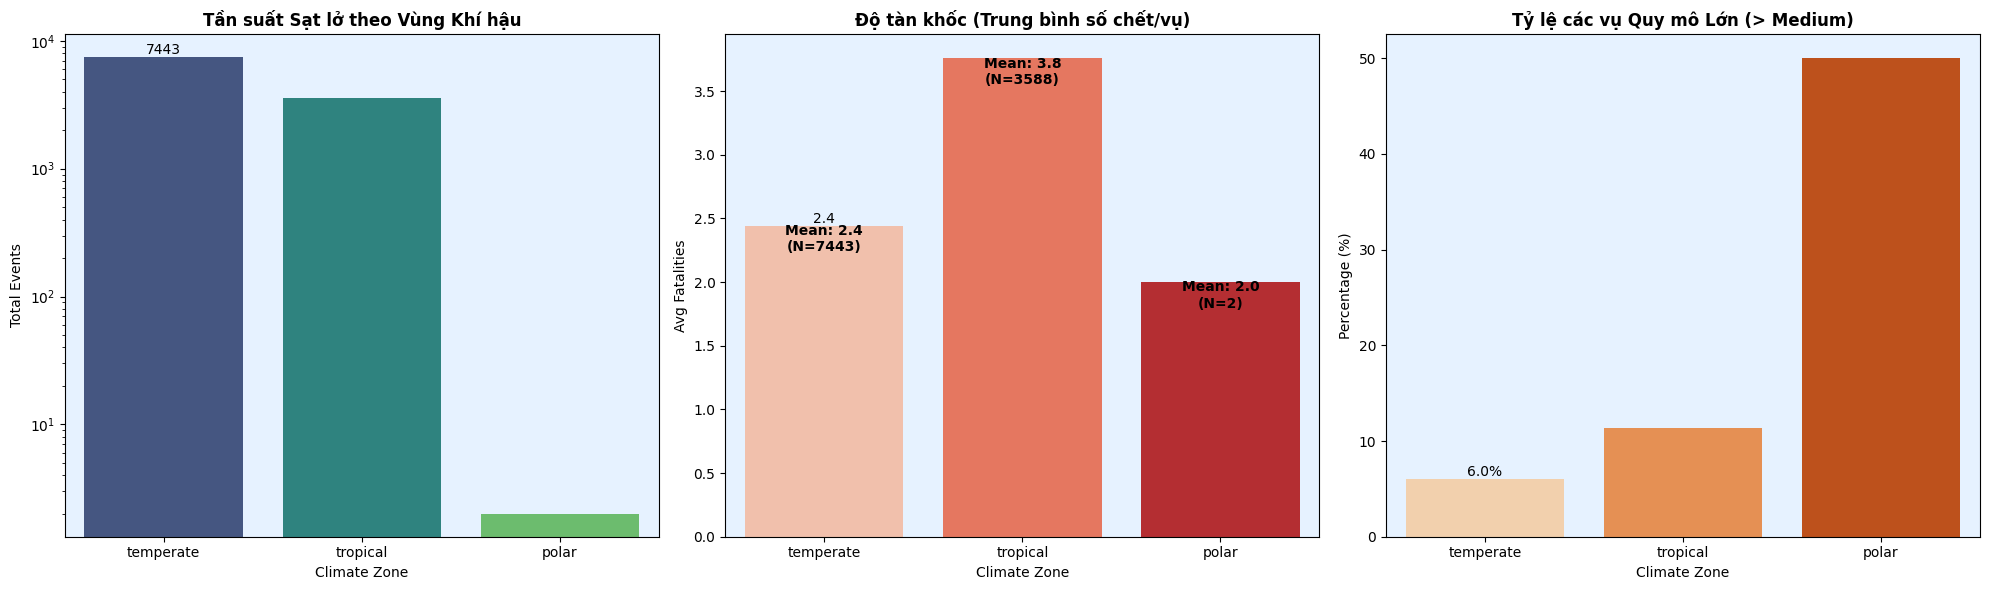

--- BẢNG THỐNG KÊ CHI TIẾT ---
  Climate Zone  Total Events  Total Fatalities  Avg Fatality/Event  \
0    temperate          7443             18169            2.441086   
1     tropical          3588             13482            3.757525   
2        polar             2                 4            2.000000   

   Median Fatality  Large_Event_Percentage  
0              0.0                6.005643  
1              0.0               11.343367  
2              2.0               50.000000  


In [151]:

# --- BƯỚC 2: TÍNH TOÁN THỐNG KÊ ---
# Tạo bảng tổng hợp
zone_stats = df_climate.groupby('climate_zone').agg({
    'landslide_category': 'count',                 # Đếm số vụ
    'fatality_count': ['sum', 'mean', 'median']    # Thống kê thiệt hại
}).reset_index()

# Làm phẳng tên cột
zone_stats.columns = ['Climate Zone', 'Total Events', 'Total Fatalities', 'Avg Fatality/Event', 'Median Fatality']
zone_stats = zone_stats.sort_values('Total Events', ascending=False)

# Tính tỷ lệ vụ lớn
def calculate_large_ratio(sub_df):
    total = len(sub_df)
    if total == 0: return 0
    # Đếm các vụ Medium trở lên (tùy bạn định nghĩa 'lớn')
    large_events = sub_df['landslide_size'].isin(['large', 'very_large']).sum()
    return (large_events / total) * 100

large_ratios = df_climate.groupby('climate_zone').apply(calculate_large_ratio).reset_index(name='Large_Event_Percentage')

# --- SỬA LỖI TẠI ĐÂY: Đổi tên cột cho khớp trước khi merge ---
large_ratios = large_ratios.rename(columns={'climate_zone': 'Climate Zone'}) 

# Bây giờ mới merge được vì cả 2 đều có cột 'Climate Zone'
zone_stats = pd.merge(zone_stats, large_ratios, on='Climate Zone')

# --- BƯỚC 3: TRỰC QUAN HÓA ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Biểu đồ 1: Tần suất
sns.barplot(data=zone_stats, x='Climate Zone', y='Total Events', ax=axes[0], palette='viridis')
axes[0].set_title('Tần suất Sạt lở theo Vùng Khí hậu', fontweight='bold')
axes[0].bar_label(axes[0].containers[0])
axes[0].set_yscale('log')

# Biểu đồ 2: Độ tàn khốc
sns.barplot(data=zone_stats, x='Climate Zone', y='Avg Fatality/Event', ax=axes[1], palette='Reds')
axes[1].set_title('Độ tàn khốc (Trung bình số chết/vụ)', fontweight='bold')
axes[1].set_ylabel('Avg Fatalities')
axes[1].bar_label(axes[1].containers[0], fmt='%.1f')

# --- KỸ THUẬT QUAN TRỌNG: Ghi chú số lượng mẫu (N) lên đầu cột ---
# Để cảnh báo người xem rằng cột Polar chỉ có 4 vụ
for i, p in enumerate(axes[1].patches):
    # Lấy giá trị cột hiện tại
    height = p.get_height()
    # Lấy số lượng vụ tương ứng từ dataframe
    n_events = zone_stats.iloc[i]['Total Events']
    # Viết chữ lên cột
    axes[1].text(
        p.get_x() + p.get_width() / 2., # Vị trí X giữa cột
        height - 0.2,                   # Vị trí Y trên đầu cột chút xíu
        f'Mean: {height:.1f}\n(N={n_events})', # Nội dung: Giá trị + Số mẫu
        ha="center", 
        color='black', 
        fontweight='bold',
        fontsize=10
    )

# Biểu đồ 3: Tỷ lệ vụ Lớn
sns.barplot(data=zone_stats, x='Climate Zone', y='Large_Event_Percentage', ax=axes[2], palette='Oranges')
axes[2].set_title('Tỷ lệ các vụ Quy mô Lớn (> Medium)', fontweight='bold')
axes[2].set_ylabel('Percentage (%)')
axes[2].bar_label(axes[2].containers[0], fmt='%.1f%%')

plt.tight_layout()
plt.show()

# --- BƯỚC 4: IN KẾT QUẢ ---
print("--- BẢNG THỐNG KÊ CHI TIẾT ---")
print(zone_stats)

Kiểm tra số lượng các vùng khí hậu:
climate_zone
temperate    7443
tropical     3588
polar           2
Name: count, dtype: int64


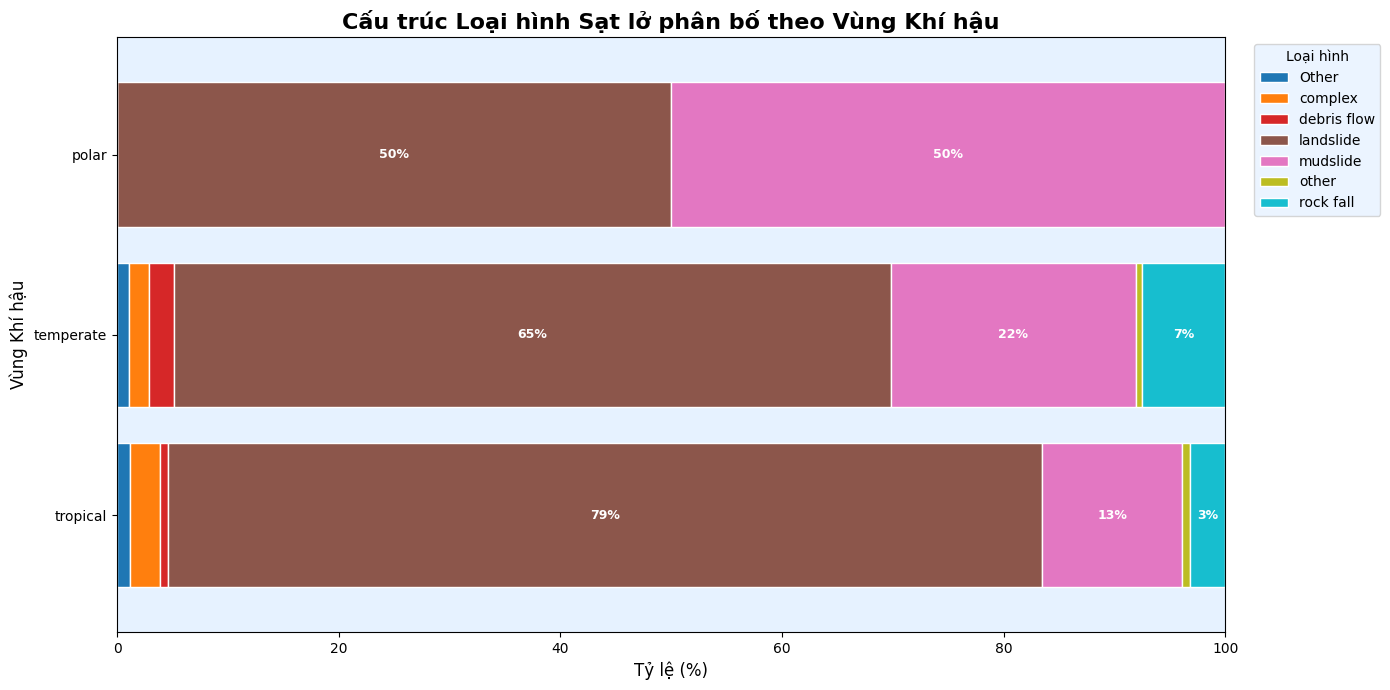


--- BẢNG SỐ LIỆU CHI TIẾT (%) ---
category_group  Other  complex  debris flow  landslide  mudslide  other  \
climate_zone                                                              
tropical         1.14     2.73         0.75      78.87     12.63   0.67   
temperate        1.06     1.80         2.24      64.72     22.11   0.59   
polar            0.00     0.00         0.00      50.00     50.00   0.00   

category_group  rock fall  
climate_zone               
tropical             3.21  
temperate            7.47  
polar                0.00  


In [155]:
# 2. KIỂM TRA DỮ LIỆU
print("Kiểm tra số lượng các vùng khí hậu:")
print(df['climate_zone'].value_counts())

# Lọc dữ liệu sạch
df_clean = df[df['climate_zone'] != 'Unknown'].copy()

# Nếu df_clean rỗng thì dừng lại báo lỗi
if df_clean.empty:
    print("❌ LỖI: Không có dữ liệu nào có tọa độ hợp lệ! Kiểm tra lại cột 'latitude'.")
else:
    # 3. XỬ LÝ LOẠI HÌNH
    # Lấy Top 6 loại phổ biến
    top_categories = df_clean['landslide_category'].value_counts().head(6).index.tolist()
    
    # Hàm lambda nhanh để gom nhóm
    df_clean['category_group'] = df_clean['landslide_category'].apply(
        lambda x: x if x in top_categories else 'Other'
    )

    # 4. TẠO CROSSTAB
    ct_climate = pd.crosstab(
        df_clean['climate_zone'], 
        df_clean['category_group'], 
        normalize='index'
    ) * 100

    # Sắp xếp index (Chỉ sắp xếp nếu index đó có tồn tại)
    desired_order = ['tropical', 'temperate', 'polar']
    # Lọc lấy những vùng thực sự có trong ct_climate
    valid_order = [z for z in desired_order if z in ct_climate.index]
    
    if not valid_order:
        print("❌ LỖI: Bảng dữ liệu rỗng sau khi lọc! Không thể vẽ.")
    else:
        ct_climate = ct_climate.reindex(valid_order)

        # 5. VẼ BIỂU ĐỒ
        ax = ct_climate.plot(
            kind='barh', 
            stacked=True, 
            figsize=(14, 7), 
            colormap='tab10', 
            width=0.8,
            edgecolor='white'
        )

        plt.title('Cấu trúc Loại hình Sạt lở phân bố theo Vùng Khí hậu', fontsize=16, fontweight='bold')
        plt.xlabel('Tỷ lệ (%)', fontsize=12)
        plt.ylabel('Vùng Khí hậu', fontsize=12)
        plt.legend(title='Loại hình', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.xlim(0, 100)

        # Hiện số liệu
        for c in ax.containers:
            labels = [f'{v.get_width():.0f}%' if v.get_width() > 3 else '' for v in c]
            ax.bar_label(c, labels=labels, label_type='center', fontsize=9, color='white', fontweight='bold')

        plt.tight_layout()
        plt.show()

        print("\n--- BẢNG SỐ LIỆU CHI TIẾT (%) ---")
        print(ct_climate.round(2))

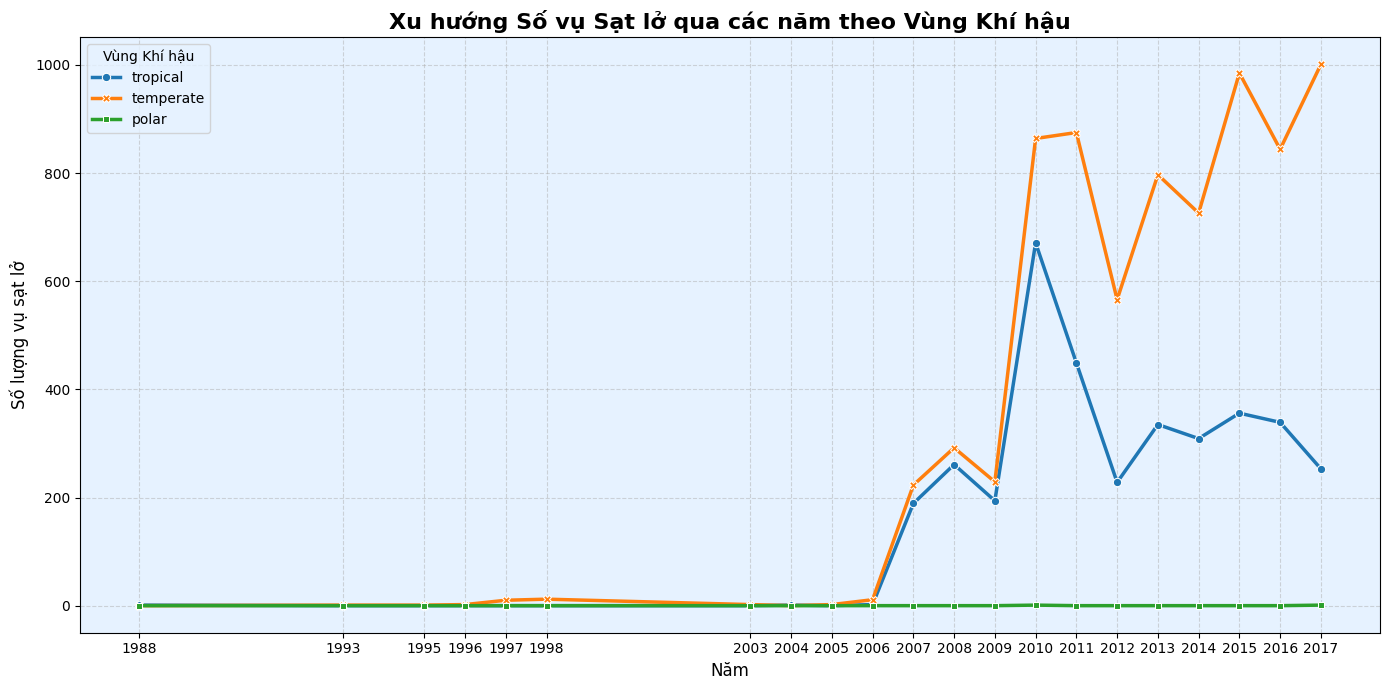


--- BẢNG THỐNG KÊ SỐ VỤ QUA CÁC NĂM ---
climate_zone  tropical  temperate  polar
year                                    
1988                 1          0      0
1993                 0          1      0
1995                 0          1      0
1996                 0          2      0
1997                 0         10      0
1998                 0         12      0
2003                 0          2      0
2004                 1          0      0
2005                 0          2      0
2006                 2         11      0
2007               189        223      0
2008               261        292      0
2009               194        229      0
2010               671        864      1
2011               449        875      0
2012               228        566      0
2013               335        797      0
2014               309        726      0
2015               356        985      0
2016               339        844      0
2017               253       1001      1


In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd





# 2. TỔNG HỢP DỮ LIỆU (AGGREGATION)
# Lọc bỏ dữ liệu lỗi (Năm rỗng hoặc Khí hậu Unknown)
df_trend = df[
    (df['climate_zone'] != 'Unknown') & 
    (df['year'].notna())
].copy()

# Chuyển năm về dạng số nguyên (int) cho đẹp
df_trend['year'] = df_trend['year'].astype(int)

# Đếm số vụ theo Năm và Vùng
# Dùng crosstab: Hàng = Năm, Cột = Vùng
trend_data = pd.crosstab(df_trend['year'], df_trend['climate_zone'])

# Sắp xếp lại cột cho đúng thứ tự
desired_cols = ['tropical', 'temperate', 'polar']
valid_cols = [c for c in desired_cols if c in trend_data.columns]
trend_data = trend_data[valid_cols]

# 3. VẼ BIỂU ĐỒ (LINE CHART)
plt.figure(figsize=(14, 7))

# Vẽ biểu đồ đường với các điểm đánh dấu (marker)
sns.lineplot(data=trend_data, markers=True, dashes=False, linewidth=2.5, palette='tab10')

# Trang trí
plt.title('Xu hướng Số vụ Sạt lở qua các năm theo Vùng Khí hậu', fontsize=16, fontweight='bold')
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Số lượng vụ sạt lở', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Vùng Khí hậu')

# Đảm bảo trục X hiện đủ các năm (số nguyên)
plt.xticks(trend_data.index)

plt.tight_layout()
plt.show()

# 4. IN BẢNG SỐ LIỆU
print("\n--- BẢNG THỐNG KÊ SỐ VỤ QUA CÁC NĂM ---")
print(trend_data)

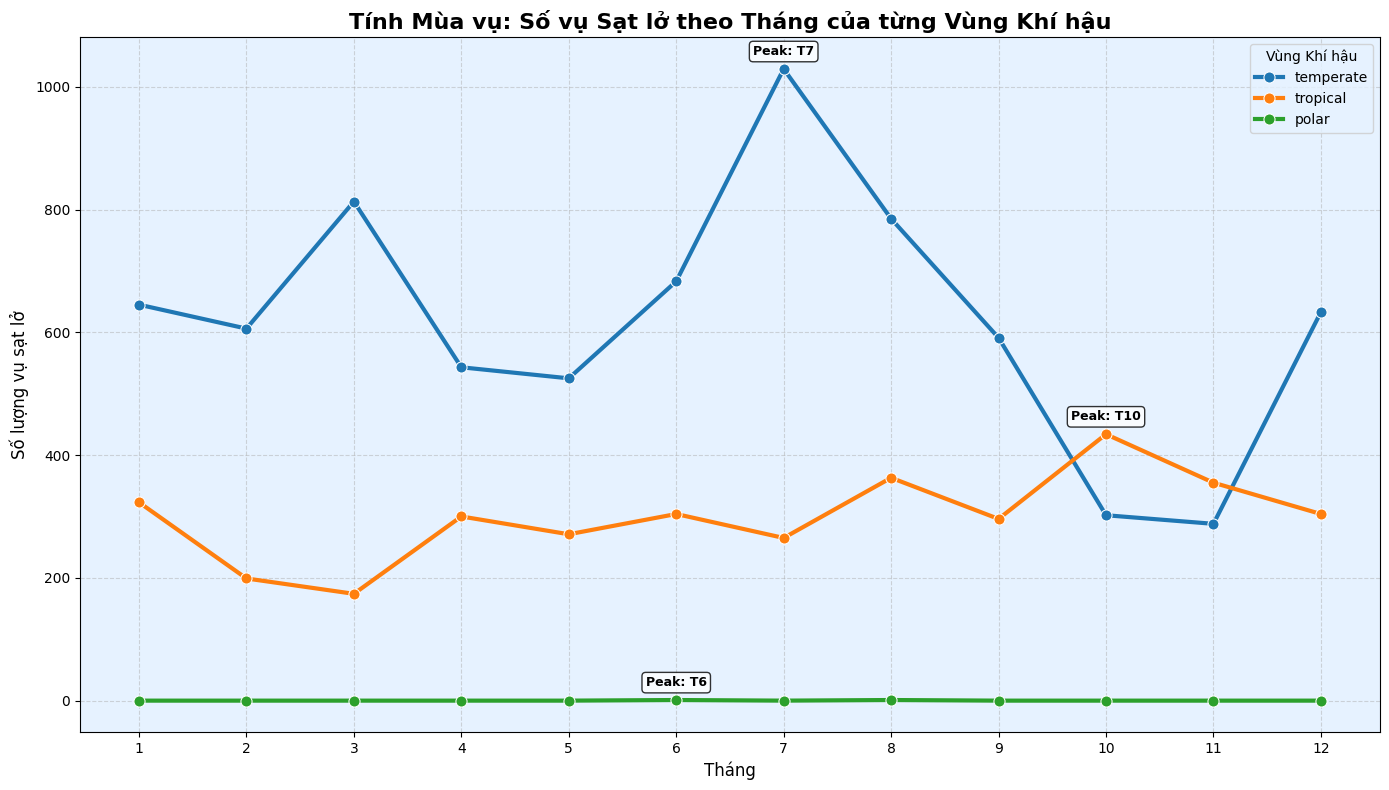

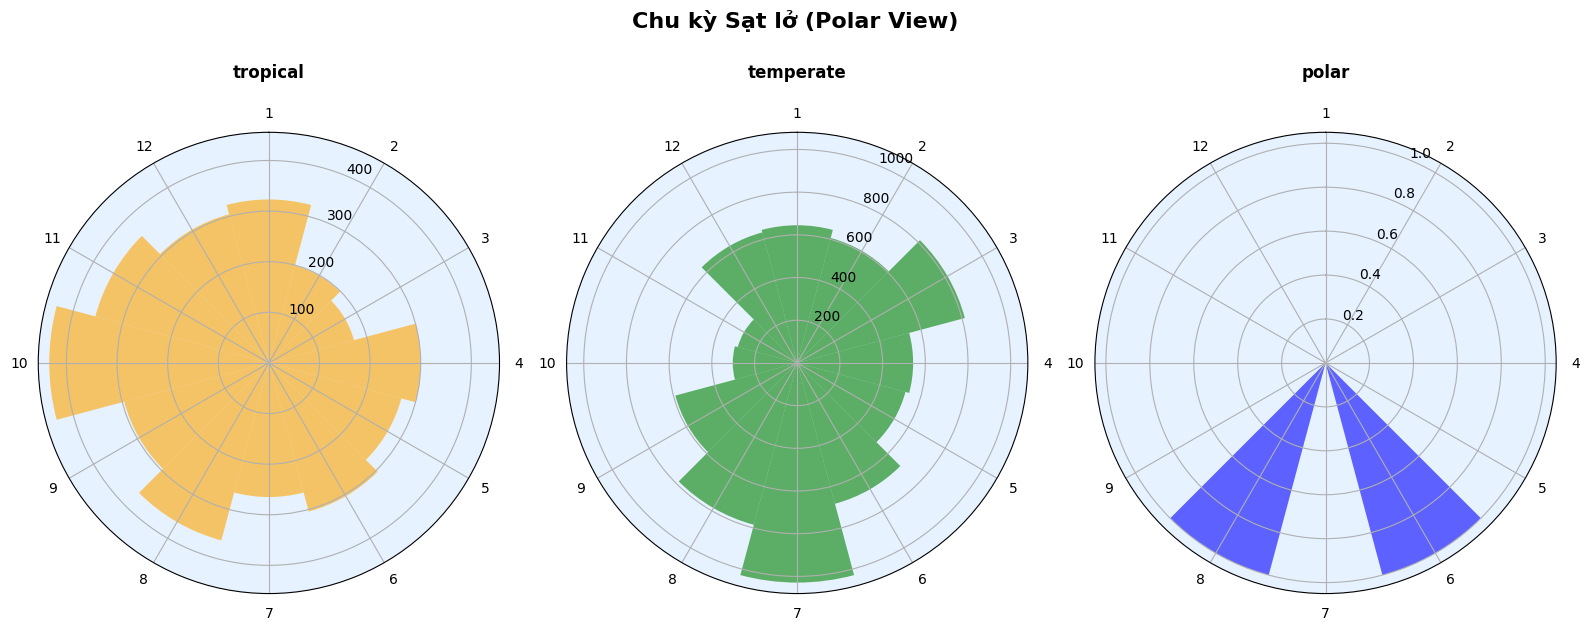

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# ===============================
# 1. TẠO CLIMATE ZONE (NẾU CHƯA CÓ)
# ===============================
if 'climate_zone' not in df.columns:
    df['climate_zone'] = df['latitude'].apply(get_climate_zone)

# ===============================
# 2. LỌC DỮ LIỆU SẠCH
# ===============================
df_month = df[
    (df['climate_zone'] != 'Unknown') & 
    (df['month'].notna())
].copy()

# ===============================
# 3. TỔNG HỢP DỮ LIỆU THEO THÁNG × VÙNG
# ===============================
monthly_stats = (
    df_month
    .groupby(['month', 'climate_zone'])
    .size()
    .reset_index(name='count')
)

# ===============================
# 4. ÉP ĐỦ 12 THÁNG CHO MỖI VÙNG (FIX LỖI 8 THÁNG)
# ===============================
full_index = pd.MultiIndex.from_product(
    [range(1, 13), monthly_stats['climate_zone'].unique()],
    names=['month', 'climate_zone']
)

monthly_stats = (
    monthly_stats
    .set_index(['month', 'climate_zone'])
    .reindex(full_index, fill_value=0)
    .reset_index()
)

monthly_stats = monthly_stats.sort_values('month')

# ===============================
# 5. VẼ BIỂU ĐỒ LINE CHART
# ===============================
plt.figure(figsize=(14, 8))

sns.lineplot(
    data=monthly_stats, 
    x='month', 
    y='count', 
    hue='climate_zone', 
    palette='tab10', 
    linewidth=3,
    marker='o',
    markersize=8
)

plt.title(
    'Tính Mùa vụ: Số vụ Sạt lở theo Tháng của từng Vùng Khí hậu',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Số lượng vụ sạt lở', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Vùng Khí hậu')

# ===============================
# 6. ĐÁNH DẤU THÁNG CAO ĐIỂM (PEAK)
# ===============================
for zone in monthly_stats['climate_zone'].unique():
    subset = monthly_stats[monthly_stats['climate_zone'] == zone]
    max_row = subset.loc[subset['count'].idxmax()]
    
    plt.annotate(
        f"Peak: T{int(max_row['month'])}",
        xy=(max_row['month'], max_row['count']),
        xytext=(0, 10),
        textcoords='offset points',
        ha='center',
        fontsize=9,
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
    )

plt.tight_layout()
plt.show()

# ===============================
# 7. BIỂU ĐỒ POLAR (HOA HỒNG)
# ===============================
fig = plt.figure(figsize=(16, 6))
colors = {'tropical': 'orange', 'temperate': 'green', 'polar': 'blue'}

for i, zone in enumerate(['tropical', 'temperate', 'polar'], 1):
    subset = (
        monthly_stats[monthly_stats['climate_zone'] == zone]
        .set_index('month')
        .reindex(range(1, 13), fill_value=0)
    )
    
    ax = fig.add_subplot(1, 3, i, projection='polar')
    
    theta = np.linspace(0.0, 2 * np.pi, 12, endpoint=False)
    radii = subset['count'].values
    width = 2 * np.pi / 12
    
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    
    ax.bar(
        theta,
        radii,
        width=width,
        bottom=0.0,
        color=colors.get(zone, 'gray'),
        alpha=0.6
    )
    
    ax.set_title(zone, y=1.1, fontweight='bold')
    ax.set_xticks(theta)
    ax.set_xticklabels([str(i) for i in range(1, 13)])

plt.suptitle(
    "Chu kỳ Sạt lở (Polar View)",
    y=1.05,
    fontsize=16,
    fontweight='bold'
)
plt.tight_layout()
plt.show()
